# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
                                    '%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
            


# Show the first five columns
select.head()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,4.8122,1.7630,-0.3147,-0.1590,-2.4418,1.9125,0.85,12.233545,19.097736,243,2961.898193
1,5.7589,2.4570,-0.2485,0.3429,-0.1997,2.6319,1.00,14.964220,17.704655,248,2218.239746
2,5.8464,2.5153,-0.1054,0.5493,-0.2144,2.7020,1.00,15.329449,17.559893,240,2220.297119
3,5.7526,2.6304,-0.0834,0.3900,-0.3510,2.7763,0.97,15.392742,20.676994,244,3033.770752
4,5.9480,2.6748,0.0000,0.5715,-0.3711,2.8314,1.00,17.944009,21.851387,243,3003.818848


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ln_Gs_cub_m           103 non-null    float64
 1   ln_M_stem_kg_m2       103 non-null    float64
 2   ln_M_stem_bark_kg_m2  103 non-null    float64
 3   ln_M_crown_kg_m2      103 non-null    float64
 4   ln_M_foliage_kg_m2    103 non-null    float64
 5   ln_M_AG_kg_m2         103 non-null    float64
 6   %_cover               103 non-null    float64
 7   mf_chm_MEAN           103 non-null    float64
 8   mf_chm_MAX            103 non-null    float64
 9   g_MAX                 103 non-null    int64  
 10  contr_g_MAX           103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB


In [6]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Dominant_specias"])["M_stem_kg_m2", "M_AG_kg_m2"].describe()

/tmp/ipykernel_168150/2044788461.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Dominant_specias"])["M_stem_kg_m2", "M_AG_kg_m2"].describe()


M_stem_kg_m2                                              \
                        count       mean       std    min      25%    50%   
Dominant_specias                                                            
Alder                     4.0  16.170000  5.186990   9.90  12.9225  17.03   
Aspen                     1.0   6.650000       NaN   6.65   6.6500   6.65   
Birch                    23.0   6.809130  3.677786   0.84   4.7650   6.19   
Oak                       3.0  13.513333  4.888725   9.59  10.7750  11.96   
Pine                     71.0  10.550000  7.252887   0.05   3.4400  11.34   
Spruce                    1.0  23.830000       NaN  23.83  23.8300  23.83   

                                 M_AG_kg_m2                              \
                      75%    max      count       mean       std    min   
Dominant_specias                                                          
Alder             20.2775  20.72        4.0  17.542500  5.837530  10.51   
Aspen              6.6500   6.65        1.0   7.990000       NaN   7.99   
Birch              9.7400  15.47       23.0   8.037826  4.112894   1.20   
Oak               15.4750  18.99        3.0  15.896667  6.100798  11.35   
Pine              16.2250  25.04       71.0  12.391408  7.988880   0.45   
Spruce            23.8300  23.83        1.0  28.980000       NaN  28.98   

                                                 
                     25%    50%      75%    max  
Dominant_specias                                 
Alder             13.885  18.39  22.0475  22.88  
Aspen              7.990   7.99   7.9900   7.99  
Birch              5.725   7.40  11.1650  17.55  
Oak               12.430  13.51  18.1700  22.83  
Pine               4.675  13.24  18.7700  28.43  
Spruce            28.980  28.98  28.9800  28.98

In [7]:
# Descriptive statistics of main parameters
select.describe()

,ln_Gs_cub_m,ln_M_stem_kg_m2,ln_M_stem_bark_kg_m2,ln_M_crown_kg_m2,ln_M_foliage_kg_m2,ln_M_AG_kg_m2,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
count,103.000000,103.000000,103.000000,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,4.969534,1.827923,-0.239481,0.05436,-1.021247,2.095454,0.808738,13.045021,17.907784,240.572816,3008.938899
std,1.323782,1.325853,0.893398,0.66008,0.803748,1.079203,0.276653,6.609366,7.523377,9.358442,876.023529
min,0.693100,-2.995700,-3.912000,-1.55590,-2.918800,-0.798500,0.090000,1.293138,2.733019,194.000000,815.342712
25%,4.672800,1.588100,-0.335500,-0.20955,-1.629700,1.801400,0.745000,8.206727,11.615798,236.500000,2464.687256
50%,5.337500,2.286500,-0.040800,0.24450,-0.719500,2.458700,0.960000,13.072916,18.269344,243.000000,2994.793701
75%,5.908100,2.730800,0.190600,0.49195,-0.358800,2.862800,1.000000,17.432255,22.751595,247.000000,3464.970947
max,6.508800,3.220500,1.654400,1.41220,0.114200,3.366600,1.000000,28.916548,36.355442,253.000000,6230.940918


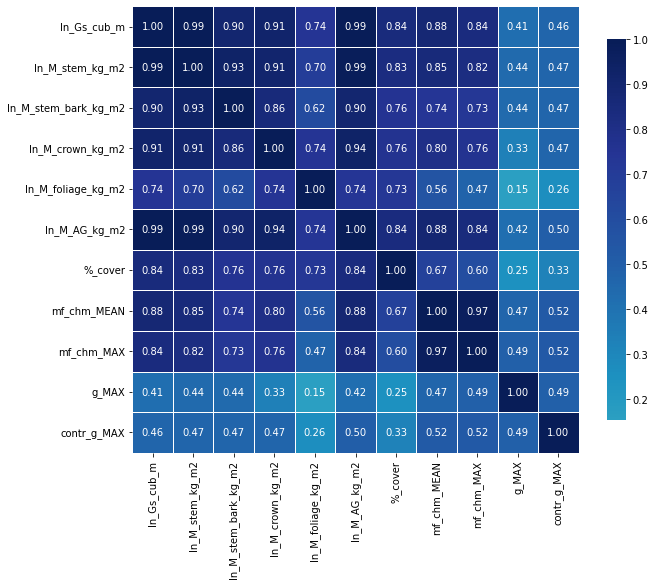

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [13]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['%_cover', 'mf_chm_MEAN', 'mf_chm_MAX', 'g_MAX', 'contr_g_MAX'])
y = pd.DataFrame(select, columns= ['ln_M_AG_kg_m2'])

In [14]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): No


Selected "No"!!! A new column with random values was not created.


In [15]:
# Columns in "X" data collections
X.head()

,%_cover,mf_chm_MEAN,mf_chm_MAX,g_MAX,contr_g_MAX
0,0.85,12.233545,19.097736,243,2961.898193
1,1.00,14.964220,17.704655,248,2218.239746
2,1.00,15.329449,17.559893,240,2220.297119
3,0.97,15.392742,20.676994,244,3033.770752
4,1.00,17.944009,21.851387,243,3003.818848


In [16]:
# Columns in "y" data collections
y.head()

,ln_M_AG_kg_m2
0,1.9125
1,2.6319
2,2.7020
3,2.7763
4,2.8314


# Create first XGBoost model for estimate varibiality of output stats

In [17]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [18]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [19]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [20]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8598908714004139, 0.8638708286260315, 0.8236281529051455]
    Mean: 0.849
    Std: 0.018

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.4396294  0.29782815 0.33027584]
    Mean: 0.356
    Std: 0.061

 --------------------
Mean absolute error (MAE): 

    Scores: [0.29678049595458167, 0.20657878178358077, 0.24391954629280987]
    Mean: 0.249
    Std: 0.037

 --------------------


# Find optimal hyperparameters for XGBoost model

In [21]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [22]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=3000, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 3000 candidates, totalling 15000 fits
Model with rank: 1
Mean validation score: 0.912 (std: 0.045)
Parameters: {'colsample_bytree': 0.9312253577535015, 'gamma': 0.10732778594492726, 'learning_rate': 0.06328753912936169, 'max_depth': 3, 'n_estimators': 164, 'subsample': 0.9595550746273007}



In [23]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.38596187, 0.4628087 , 0.25758371, ..., 0.51692386, 0.54919457,
       0.28639684]), 'std_fit_time': array([0.37882277, 0.01178559, 0.0095055 , ..., 0.02711753, 0.07326905,
       0.0258424 ]), 'mean_score_time': array([0.00616083, 0.00616126, 0.00597339, ..., 0.00824108, 0.00666556,
       0.00658932]), 'std_score_time': array([1.48866132e-04, 1.65338112e-04, 7.11047828e-05, ...,
       3.05925533e-03, 2.39932973e-05, 3.00341554e-05]), 'param_colsample_bytree': masked_array(data=[0.5090817665922714, 0.3229408701647361,
                   0.7836943620001722, ..., 0.3415082067969619,
                   0.11452050536300137, 0.09022347941643957],
             mask=[False, False, False, ..., False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.1846092882799702, 0.3253704207719312,
                   0.4942064025368096, ..., 0.32160174632508015,
                   0.21473939447971546, 0.4387609506408609],
     

In [24]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.9312253577535015
Gamma: 0.10732778594492726
Learning_rate: 0.06328753912936169
Max_depth: 3
N_estimators: 164
Subsample: 0.9595550746273007


# Estimation of a basic XGBoost model using Loops

In [25]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [26]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:1.76504	validation_1-rmse:1.98588
[1]	validation_0-rmse:1.66110	validation_1-rmse:1.87766


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:1.56341	validation_1-rmse:1.77617
[3]	validation_0-rmse:1.47149	validation_1-rmse:1.67396
[4]	validation_0-rmse:1.38468	validation_1-rmse:1.57825
[5]	validation_0-rmse:1.30479	validation_1-rmse:1.49422
[6]	validation_0-rmse:1.22846	validation_1-rmse:1.40958
[7]	validation_0-rmse:1.15679	validation_1-rmse:1.33155
[8]	validation_0-rmse:1.08991	validation_1-rmse:1.25720
[9]	validation_0-rmse:1.02783	validation_1-rmse:1.19006
[10]	validation_0-rmse:0.96897	validation_1-rmse:1.12609
[11]	validation_0-rmse:0.91512	validation_1-rmse:1.06682
[12]	validation_0-rmse:0.86341	validation_1-rmse:1.01049
[13]	validation_0-rmse:0.81554	validation_1-rmse:0.95850
[14]	validation_0-rmse:0.77009	validation_1-rmse:0.90989
[15]	validation_0-rmse:0.72713	validation_1-rmse:0.86338
[16]	validation_0-rmse:0.68745	validation_1-rmse:0.81980
[17]	validation_0-rmse:0.65063	validation_1-rmse:0.78133
[18]	validation_0-rmse:0.61616	validation_1-rmse:0.74674
[19]	validation_0-rmse:0.58283	validati

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.33441	validation_1-rmse:1.34523
[6]	validation_0-rmse:1.25562	validation_1-rmse:1.26697
[7]	validation_0-rmse:1.18200	validation_1-rmse:1.19338
[8]	validation_0-rmse:1.11261	validation_1-rmse:1.12333
[9]	validation_0-rmse:1.04904	validation_1-rmse:1.06235
[10]	validation_0-rmse:0.98867	validation_1-rmse:1.00355
[11]	validation_0-rmse:0.93148	validation_1-rmse:0.95051
[12]	validation_0-rmse:0.87788	validation_1-rmse:0.90007
[13]	validation_0-rmse:0.82856	validation_1-rmse:0.85323
[14]	validation_0-rmse:0.78156	validation_1-rmse:0.80782
[15]	validation_0-rmse:0.73699	validation_1-rmse:0.76743
[16]	validation_0-rmse:0.69540	validation_1-rmse:0.72920
[17]	validation_0-rmse:0.65703	validation_1-rmse:0.69933
[18]	validation_0-rmse:0.62113	validation_1-rmse:0.66974
[19]	validation_0-rmse:0.58684	validation_1-rmse:0.64196
[20]	validation_0-rmse:0.55556	validation_1-rmse:0.61293
[21]	validation_0-rmse:0.52529	validation_1-rmse:0.58618
[22]	validation_0-rmse:0.49733	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.44428	validation_1-rmse:1.30919
[5]	validation_0-rmse:1.35986	validation_1-rmse:1.23013
[6]	validation_0-rmse:1.27969	validation_1-rmse:1.15523
[7]	validation_0-rmse:1.20367	validation_1-rmse:1.08330
[8]	validation_0-rmse:1.13374	validation_1-rmse:1.01885
[9]	validation_0-rmse:1.06759	validation_1-rmse:0.96073
[10]	validation_0-rmse:1.00603	validation_1-rmse:0.90874
[11]	validation_0-rmse:0.94830	validation_1-rmse:0.86120
[12]	validation_0-rmse:0.89389	validation_1-rmse:0.81687
[13]	validation_0-rmse:0.84387	validation_1-rmse:0.77378
[14]	validation_0-rmse:0.79629	validation_1-rmse:0.73313
[15]	validation_0-rmse:0.75019	validation_1-rmse:0.69372
[16]	validation_0-rmse:0.70856	validation_1-rmse:0.66364
[17]	validation_0-rmse:0.66877	validation_1-rmse:0.63241
[18]	validation_0-rmse:0.63259	validation_1-rmse:0.60479
[19]	validation_0-rmse:0.59824	validation_1-rmse:0.57928
[20]	validation_0-rmse:0.56592	validation_1-rmse:0.55601
[21]	validation_0-rmse:0.53578	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69905	validation_1-rmse:0.75181
[17]	validation_0-rmse:0.66108	validation_1-rmse:0.71564
[18]	validation_0-rmse:0.62548	validation_1-rmse:0.67980
[19]	validation_0-rmse:0.59194	validation_1-rmse:0.64726
[20]	validation_0-rmse:0.56123	validation_1-rmse:0.61587
[21]	validation_0-rmse:0.53170	validation_1-rmse:0.58547
[22]	validation_0-rmse:0.50477	validation_1-rmse:0.56010
[23]	validation_0-rmse:0.48005	validation_1-rmse:0.53592
[24]	validation_0-rmse:0.45611	validation_1-rmse:0.51036
[25]	validation_0-rmse:0.43313	validation_1-rmse:0.48590
[26]	validation_0-rmse:0.41227	validation_1-rmse:0.46210
[27]	validation_0-rmse:0.39274	validation_1-rmse:0.43969
[28]	validation_0-rmse:0.37413	validation_1-rmse:0.42074
[29]	validation_0-rmse:0.35811	validation_1-rmse:0.40553
[30]	validation_0-rmse:0.34321	validation_1-rmse:0.39011
[31]	validation_0-rmse:0.32854	validation_1-rmse:0.37547
[32]	validation_0-rmse:0.31498	validation_1-rmse:0.36187
[33]	validation_0-rmse:0.30224	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.59614	validation_1-rmse:0.62406
[20]	validation_0-rmse:0.56389	validation_1-rmse:0.60270
[21]	validation_0-rmse:0.53312	validation_1-rmse:0.58203
[22]	validation_0-rmse:0.50519	validation_1-rmse:0.56274
[23]	validation_0-rmse:0.47885	validation_1-rmse:0.54695
[24]	validation_0-rmse:0.45343	validation_1-rmse:0.52884
[25]	validation_0-rmse:0.43026	validation_1-rmse:0.51779
[26]	validation_0-rmse:0.40927	validation_1-rmse:0.50714
[27]	validation_0-rmse:0.38883	validation_1-rmse:0.49254
[28]	validation_0-rmse:0.37077	validation_1-rmse:0.48433
[29]	validation_0-rmse:0.35339	validation_1-rmse:0.47751
[30]	validation_0-rmse:0.33691	validation_1-rmse:0.47266
[31]	validation_0-rmse:0.32242	validation_1-rmse:0.46632
[32]	validation_0-rmse:0.30872	validation_1-rmse:0.46126
[33]	validation_0-rmse:0.29602	validation_1-rmse:0.45704
[34]	validation_0-rmse:0.28392	validation_1-rmse:0.44941
[35]	validation_0-rmse:0.27358	validation_1-rmse:0.44526
[36]	validation_0-rmse:0.26341	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74596	validation_1-rmse:0.72420
[16]	validation_0-rmse:0.70409	validation_1-rmse:0.68411
[17]	validation_0-rmse:0.66617	validation_1-rmse:0.65168
[18]	validation_0-rmse:0.63031	validation_1-rmse:0.61936
[19]	validation_0-rmse:0.59673	validation_1-rmse:0.59247
[20]	validation_0-rmse:0.56500	validation_1-rmse:0.56757
[21]	validation_0-rmse:0.53469	validation_1-rmse:0.54238
[22]	validation_0-rmse:0.50645	validation_1-rmse:0.51955
[23]	validation_0-rmse:0.47987	validation_1-rmse:0.49964
[24]	validation_0-rmse:0.45530	validation_1-rmse:0.47930
[25]	validation_0-rmse:0.43217	validation_1-rmse:0.45880
[26]	validation_0-rmse:0.41109	validation_1-rmse:0.44161
[27]	validation_0-rmse:0.39109	validation_1-rmse:0.42728
[28]	validation_0-rmse:0.37213	validation_1-rmse:0.41556
[29]	validation_0-rmse:0.35516	validation_1-rmse:0.40395
[30]	validation_0-rmse:0.33838	validation_1-rmse:0.39636
[31]	validation_0-rmse:0.32311	validation_1-rmse:0.38360
[32]	validation_0-rmse:0.30906	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.59726	validation_1-rmse:0.59954
[20]	validation_0-rmse:0.56531	validation_1-rmse:0.56902
[21]	validation_0-rmse:0.53491	validation_1-rmse:0.54019
[22]	validation_0-rmse:0.50630	validation_1-rmse:0.51485
[23]	validation_0-rmse:0.47915	validation_1-rmse:0.49057
[24]	validation_0-rmse:0.45461	validation_1-rmse:0.47103
[25]	validation_0-rmse:0.43122	validation_1-rmse:0.44949
[26]	validation_0-rmse:0.40906	validation_1-rmse:0.43051
[27]	validation_0-rmse:0.38822	validation_1-rmse:0.41272
[28]	validation_0-rmse:0.36897	validation_1-rmse:0.39601
[29]	validation_0-rmse:0.35123	validation_1-rmse:0.38321
[30]	validation_0-rmse:0.33478	validation_1-rmse:0.37060
[31]	validation_0-rmse:0.31952	validation_1-rmse:0.35831
[32]	validation_0-rmse:0.30573	validation_1-rmse:0.34871
[33]	validation_0-rmse:0.29257	validation_1-rmse:0.34029
[34]	validation_0-rmse:0.27918	validation_1-rmse:0.33149
[35]	validation_0-rmse:0.26745	validation_1-rmse:0.32210
[36]	validation_0-rmse:0.25673	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74935	validation_1-rmse:0.67532
[16]	validation_0-rmse:0.70842	validation_1-rmse:0.63694
[17]	validation_0-rmse:0.67015	validation_1-rmse:0.60166
[18]	validation_0-rmse:0.63470	validation_1-rmse:0.56671
[19]	validation_0-rmse:0.60102	validation_1-rmse:0.53437
[20]	validation_0-rmse:0.56896	validation_1-rmse:0.50609
[21]	validation_0-rmse:0.53954	validation_1-rmse:0.47836
[22]	validation_0-rmse:0.51234	validation_1-rmse:0.45287
[23]	validation_0-rmse:0.48611	validation_1-rmse:0.43015
[24]	validation_0-rmse:0.46259	validation_1-rmse:0.41216
[25]	validation_0-rmse:0.44000	validation_1-rmse:0.39136
[26]	validation_0-rmse:0.41922	validation_1-rmse:0.37165
[27]	validation_0-rmse:0.39954	validation_1-rmse:0.35353
[28]	validation_0-rmse:0.38126	validation_1-rmse:0.34137
[29]	validation_0-rmse:0.36419	validation_1-rmse:0.32649
[30]	validation_0-rmse:0.34798	validation_1-rmse:0.31341
[31]	validation_0-rmse:0.33285	validation_1-rmse:0.30251
[32]	validation_0-rmse:0.31942	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.55828	validation_1-rmse:0.59034
[21]	validation_0-rmse:0.52943	validation_1-rmse:0.56051
[22]	validation_0-rmse:0.50171	validation_1-rmse:0.53320
[23]	validation_0-rmse:0.47583	validation_1-rmse:0.50889
[24]	validation_0-rmse:0.45158	validation_1-rmse:0.48563
[25]	validation_0-rmse:0.42879	validation_1-rmse:0.46420
[26]	validation_0-rmse:0.40788	validation_1-rmse:0.44397
[27]	validation_0-rmse:0.38877	validation_1-rmse:0.42514
[28]	validation_0-rmse:0.37056	validation_1-rmse:0.40814
[29]	validation_0-rmse:0.35346	validation_1-rmse:0.39206
[30]	validation_0-rmse:0.33742	validation_1-rmse:0.37775
[31]	validation_0-rmse:0.32288	validation_1-rmse:0.36412
[32]	validation_0-rmse:0.30935	validation_1-rmse:0.35188
[33]	validation_0-rmse:0.29688	validation_1-rmse:0.34062
[34]	validation_0-rmse:0.28478	validation_1-rmse:0.32839
[35]	validation_0-rmse:0.27332	validation_1-rmse:0.31658
[36]	validation_0-rmse:0.26328	validation_1-rmse:0.30649
[37]	validation_0-rmse:0.25379	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.56604	validation_1-rmse:0.53538
[21]	validation_0-rmse:0.53599	validation_1-rmse:0.51679
[22]	validation_0-rmse:0.50740	validation_1-rmse:0.49581
[23]	validation_0-rmse:0.48101	validation_1-rmse:0.47370
[24]	validation_0-rmse:0.45613	validation_1-rmse:0.45753
[25]	validation_0-rmse:0.43267	validation_1-rmse:0.44085
[26]	validation_0-rmse:0.41056	validation_1-rmse:0.42273
[27]	validation_0-rmse:0.39055	validation_1-rmse:0.40760
[28]	validation_0-rmse:0.37218	validation_1-rmse:0.39618
[29]	validation_0-rmse:0.35472	validation_1-rmse:0.38809
[30]	validation_0-rmse:0.33810	validation_1-rmse:0.37926
[31]	validation_0-rmse:0.32308	validation_1-rmse:0.36925
[32]	validation_0-rmse:0.30832	validation_1-rmse:0.36429
[33]	validation_0-rmse:0.29479	validation_1-rmse:0.35825
[34]	validation_0-rmse:0.28196	validation_1-rmse:0.34917
[35]	validation_0-rmse:0.27016	validation_1-rmse:0.34622
[36]	validation_0-rmse:0.25961	validation_1-rmse:0.34160
[37]	validation_0-rmse:0.25068	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66077	validation_1-rmse:0.71439
[18]	validation_0-rmse:0.62530	validation_1-rmse:0.68215
[19]	validation_0-rmse:0.59163	validation_1-rmse:0.65562
[20]	validation_0-rmse:0.56059	validation_1-rmse:0.62893
[21]	validation_0-rmse:0.52982	validation_1-rmse:0.60381
[22]	validation_0-rmse:0.50115	validation_1-rmse:0.57977
[23]	validation_0-rmse:0.47530	validation_1-rmse:0.56016
[24]	validation_0-rmse:0.45017	validation_1-rmse:0.54016
[25]	validation_0-rmse:0.42694	validation_1-rmse:0.52462
[26]	validation_0-rmse:0.40540	validation_1-rmse:0.50857
[27]	validation_0-rmse:0.38524	validation_1-rmse:0.49596
[28]	validation_0-rmse:0.36668	validation_1-rmse:0.48182
[29]	validation_0-rmse:0.34925	validation_1-rmse:0.47140
[30]	validation_0-rmse:0.33285	validation_1-rmse:0.46406
[31]	validation_0-rmse:0.31844	validation_1-rmse:0.45457
[32]	validation_0-rmse:0.30465	validation_1-rmse:0.44730
[33]	validation_0-rmse:0.29200	validation_1-rmse:0.44062
[34]	validation_0-rmse:0.27901	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61119	validation_1-rmse:0.74168
[19]	validation_0-rmse:0.57809	validation_1-rmse:0.71130
[20]	validation_0-rmse:0.54698	validation_1-rmse:0.68188
[21]	validation_0-rmse:0.51817	validation_1-rmse:0.65207
[22]	validation_0-rmse:0.49003	validation_1-rmse:0.62327
[23]	validation_0-rmse:0.46450	validation_1-rmse:0.59606
[24]	validation_0-rmse:0.44131	validation_1-rmse:0.57032
[25]	validation_0-rmse:0.41862	validation_1-rmse:0.54561
[26]	validation_0-rmse:0.39827	validation_1-rmse:0.52641
[27]	validation_0-rmse:0.37952	validation_1-rmse:0.50979
[28]	validation_0-rmse:0.36132	validation_1-rmse:0.49322
[29]	validation_0-rmse:0.34510	validation_1-rmse:0.47429
[30]	validation_0-rmse:0.32948	validation_1-rmse:0.45703
[31]	validation_0-rmse:0.31390	validation_1-rmse:0.44258
[32]	validation_0-rmse:0.30045	validation_1-rmse:0.42690
[33]	validation_0-rmse:0.28794	validation_1-rmse:0.41266
[34]	validation_0-rmse:0.27550	validation_1-rmse:0.40302
[35]	validation_0-rmse:0.26410	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.57869	validation_1-rmse:0.73070
[20]	validation_0-rmse:0.54872	validation_1-rmse:0.69438
[21]	validation_0-rmse:0.52068	validation_1-rmse:0.66297
[22]	validation_0-rmse:0.49313	validation_1-rmse:0.63572
[23]	validation_0-rmse:0.46761	validation_1-rmse:0.60595
[24]	validation_0-rmse:0.44440	validation_1-rmse:0.57884
[25]	validation_0-rmse:0.42255	validation_1-rmse:0.55538
[26]	validation_0-rmse:0.40190	validation_1-rmse:0.53065
[27]	validation_0-rmse:0.38253	validation_1-rmse:0.51081
[28]	validation_0-rmse:0.36438	validation_1-rmse:0.48948
[29]	validation_0-rmse:0.34803	validation_1-rmse:0.47076
[30]	validation_0-rmse:0.33317	validation_1-rmse:0.45622
[31]	validation_0-rmse:0.31893	validation_1-rmse:0.44652
[32]	validation_0-rmse:0.30516	validation_1-rmse:0.43161
[33]	validation_0-rmse:0.29251	validation_1-rmse:0.41773
[34]	validation_0-rmse:0.28063	validation_1-rmse:0.40307
[35]	validation_0-rmse:0.26922	validation_1-rmse:0.39038
[36]	validation_0-rmse:0.25919	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65948	validation_1-rmse:0.63391
[18]	validation_0-rmse:0.62330	validation_1-rmse:0.60191
[19]	validation_0-rmse:0.59017	validation_1-rmse:0.57423
[20]	validation_0-rmse:0.55892	validation_1-rmse:0.54672
[21]	validation_0-rmse:0.52966	validation_1-rmse:0.52260
[22]	validation_0-rmse:0.50182	validation_1-rmse:0.50189
[23]	validation_0-rmse:0.47648	validation_1-rmse:0.47424
[24]	validation_0-rmse:0.45215	validation_1-rmse:0.45399
[25]	validation_0-rmse:0.43025	validation_1-rmse:0.43355
[26]	validation_0-rmse:0.40964	validation_1-rmse:0.41826
[27]	validation_0-rmse:0.39023	validation_1-rmse:0.40184
[28]	validation_0-rmse:0.37155	validation_1-rmse:0.38790
[29]	validation_0-rmse:0.35523	validation_1-rmse:0.37434
[30]	validation_0-rmse:0.33984	validation_1-rmse:0.35981
[31]	validation_0-rmse:0.32523	validation_1-rmse:0.34980
[32]	validation_0-rmse:0.31169	validation_1-rmse:0.34001
[33]	validation_0-rmse:0.29905	validation_1-rmse:0.33195
[34]	validation_0-rmse:0.28682	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.55594	validation_1-rmse:0.57773
[21]	validation_0-rmse:0.52645	validation_1-rmse:0.54677
[22]	validation_0-rmse:0.49918	validation_1-rmse:0.51900
[23]	validation_0-rmse:0.47327	validation_1-rmse:0.49242
[24]	validation_0-rmse:0.44906	validation_1-rmse:0.46812
[25]	validation_0-rmse:0.42675	validation_1-rmse:0.44519
[26]	validation_0-rmse:0.40542	validation_1-rmse:0.42448
[27]	validation_0-rmse:0.38629	validation_1-rmse:0.40425
[28]	validation_0-rmse:0.36786	validation_1-rmse:0.38718
[29]	validation_0-rmse:0.35064	validation_1-rmse:0.37086
[30]	validation_0-rmse:0.33475	validation_1-rmse:0.35579
[31]	validation_0-rmse:0.32059	validation_1-rmse:0.34394
[32]	validation_0-rmse:0.30667	validation_1-rmse:0.33127
[33]	validation_0-rmse:0.29370	validation_1-rmse:0.31886
[34]	validation_0-rmse:0.28176	validation_1-rmse:0.30812
[35]	validation_0-rmse:0.27063	validation_1-rmse:0.29924
[36]	validation_0-rmse:0.25984	validation_1-rmse:0.28951
[37]	validation_0-rmse:0.25014	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.63610	validation_1-rmse:0.55983
[19]	validation_0-rmse:0.60138	validation_1-rmse:0.53146
[20]	validation_0-rmse:0.56911	validation_1-rmse:0.50606
[21]	validation_0-rmse:0.53862	validation_1-rmse:0.48251
[22]	validation_0-rmse:0.51010	validation_1-rmse:0.45838
[23]	validation_0-rmse:0.48407	validation_1-rmse:0.44028
[24]	validation_0-rmse:0.45846	validation_1-rmse:0.42099
[25]	validation_0-rmse:0.43426	validation_1-rmse:0.40531
[26]	validation_0-rmse:0.41233	validation_1-rmse:0.38974
[27]	validation_0-rmse:0.39170	validation_1-rmse:0.37517
[28]	validation_0-rmse:0.37271	validation_1-rmse:0.36340
[29]	validation_0-rmse:0.35527	validation_1-rmse:0.35310
[30]	validation_0-rmse:0.33861	validation_1-rmse:0.34298
[31]	validation_0-rmse:0.32240	validation_1-rmse:0.33342
[32]	validation_0-rmse:0.30800	validation_1-rmse:0.32555
[33]	validation_0-rmse:0.29443	validation_1-rmse:0.31769
[34]	validation_0-rmse:0.28215	validation_1-rmse:0.31050
[35]	validation_0-rmse:0.26991	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.77553	validation_1-rmse:0.82904
[15]	validation_0-rmse:0.73359	validation_1-rmse:0.78314
[16]	validation_0-rmse:0.69348	validation_1-rmse:0.74316
[17]	validation_0-rmse:0.65649	validation_1-rmse:0.70805
[18]	validation_0-rmse:0.62216	validation_1-rmse:0.67245
[19]	validation_0-rmse:0.58901	validation_1-rmse:0.63912
[20]	validation_0-rmse:0.55744	validation_1-rmse:0.60716
[21]	validation_0-rmse:0.52827	validation_1-rmse:0.57744
[22]	validation_0-rmse:0.50092	validation_1-rmse:0.54812
[23]	validation_0-rmse:0.47495	validation_1-rmse:0.52202
[24]	validation_0-rmse:0.45038	validation_1-rmse:0.49936
[25]	validation_0-rmse:0.42828	validation_1-rmse:0.47901
[26]	validation_0-rmse:0.40730	validation_1-rmse:0.45866
[27]	validation_0-rmse:0.38799	validation_1-rmse:0.43866
[28]	validation_0-rmse:0.36938	validation_1-rmse:0.42065
[29]	validation_0-rmse:0.35303	validation_1-rmse:0.40427
[30]	validation_0-rmse:0.33727	validation_1-rmse:0.39051
[31]	validation_0-rmse:0.32211	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73410	validation_1-rmse:0.85986
[16]	validation_0-rmse:0.69306	validation_1-rmse:0.82199
[17]	validation_0-rmse:0.65574	validation_1-rmse:0.78977
[18]	validation_0-rmse:0.62010	validation_1-rmse:0.75335
[19]	validation_0-rmse:0.58722	validation_1-rmse:0.71723
[20]	validation_0-rmse:0.55663	validation_1-rmse:0.68761
[21]	validation_0-rmse:0.52832	validation_1-rmse:0.66214
[22]	validation_0-rmse:0.50070	validation_1-rmse:0.63479
[23]	validation_0-rmse:0.47481	validation_1-rmse:0.61084
[24]	validation_0-rmse:0.45218	validation_1-rmse:0.58551
[25]	validation_0-rmse:0.42970	validation_1-rmse:0.56583
[26]	validation_0-rmse:0.40845	validation_1-rmse:0.54248
[27]	validation_0-rmse:0.38884	validation_1-rmse:0.52601
[28]	validation_0-rmse:0.37075	validation_1-rmse:0.50523
[29]	validation_0-rmse:0.35374	validation_1-rmse:0.49416
[30]	validation_0-rmse:0.33868	validation_1-rmse:0.48198
[31]	validation_0-rmse:0.32368	validation_1-rmse:0.46569
[32]	validation_0-rmse:0.30991	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.58855	validation_1-rmse:0.68168
[20]	validation_0-rmse:0.55755	validation_1-rmse:0.65022
[21]	validation_0-rmse:0.52782	validation_1-rmse:0.61778
[22]	validation_0-rmse:0.50099	validation_1-rmse:0.58992
[23]	validation_0-rmse:0.47593	validation_1-rmse:0.56369
[24]	validation_0-rmse:0.45231	validation_1-rmse:0.54120
[25]	validation_0-rmse:0.43040	validation_1-rmse:0.51690
[26]	validation_0-rmse:0.40824	validation_1-rmse:0.49456
[27]	validation_0-rmse:0.38919	validation_1-rmse:0.47669
[28]	validation_0-rmse:0.37121	validation_1-rmse:0.46199
[29]	validation_0-rmse:0.35422	validation_1-rmse:0.44364
[30]	validation_0-rmse:0.33852	validation_1-rmse:0.42705
[31]	validation_0-rmse:0.32339	validation_1-rmse:0.41479
[32]	validation_0-rmse:0.31026	validation_1-rmse:0.40051
[33]	validation_0-rmse:0.29784	validation_1-rmse:0.38721
[34]	validation_0-rmse:0.28654	validation_1-rmse:0.37466
[35]	validation_0-rmse:0.27494	validation_1-rmse:0.36259
[36]	validation_0-rmse:0.26416	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68544	validation_1-rmse:0.78723
[17]	validation_0-rmse:0.64854	validation_1-rmse:0.74785
[18]	validation_0-rmse:0.61411	validation_1-rmse:0.71125
[19]	validation_0-rmse:0.58144	validation_1-rmse:0.67390
[20]	validation_0-rmse:0.55134	validation_1-rmse:0.63812
[21]	validation_0-rmse:0.52234	validation_1-rmse:0.60428
[22]	validation_0-rmse:0.49528	validation_1-rmse:0.57507
[23]	validation_0-rmse:0.46988	validation_1-rmse:0.54740
[24]	validation_0-rmse:0.44654	validation_1-rmse:0.51946
[25]	validation_0-rmse:0.42449	validation_1-rmse:0.49707
[26]	validation_0-rmse:0.40353	validation_1-rmse:0.47250
[27]	validation_0-rmse:0.38379	validation_1-rmse:0.45170
[28]	validation_0-rmse:0.36613	validation_1-rmse:0.43131
[29]	validation_0-rmse:0.34957	validation_1-rmse:0.41159
[30]	validation_0-rmse:0.33416	validation_1-rmse:0.39402
[31]	validation_0-rmse:0.31979	validation_1-rmse:0.37885
[32]	validation_0-rmse:0.30687	validation_1-rmse:0.36375
[33]	validation_0-rmse:0.29441	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.72676	validation_1-rmse:0.78570
[16]	validation_0-rmse:0.68640	validation_1-rmse:0.73962
[17]	validation_0-rmse:0.64921	validation_1-rmse:0.69618
[18]	validation_0-rmse:0.61469	validation_1-rmse:0.65722
[19]	validation_0-rmse:0.58193	validation_1-rmse:0.62035
[20]	validation_0-rmse:0.55122	validation_1-rmse:0.58652
[21]	validation_0-rmse:0.52200	validation_1-rmse:0.55301
[22]	validation_0-rmse:0.49447	validation_1-rmse:0.52254
[23]	validation_0-rmse:0.46840	validation_1-rmse:0.49539
[24]	validation_0-rmse:0.44483	validation_1-rmse:0.47058
[25]	validation_0-rmse:0.42270	validation_1-rmse:0.44599
[26]	validation_0-rmse:0.40178	validation_1-rmse:0.42348
[27]	validation_0-rmse:0.38202	validation_1-rmse:0.40230
[28]	validation_0-rmse:0.36373	validation_1-rmse:0.38412
[29]	validation_0-rmse:0.34674	validation_1-rmse:0.36672
[30]	validation_0-rmse:0.33075	validation_1-rmse:0.35085
[31]	validation_0-rmse:0.31575	validation_1-rmse:0.33677
[32]	validation_0-rmse:0.30189	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.71922	validation_1-rmse:0.60647
[17]	validation_0-rmse:0.67966	validation_1-rmse:0.57891
[18]	validation_0-rmse:0.64326	validation_1-rmse:0.55706
[19]	validation_0-rmse:0.60795	validation_1-rmse:0.53093
[20]	validation_0-rmse:0.57481	validation_1-rmse:0.50726
[21]	validation_0-rmse:0.54356	validation_1-rmse:0.48333
[22]	validation_0-rmse:0.51469	validation_1-rmse:0.46239
[23]	validation_0-rmse:0.48723	validation_1-rmse:0.44256
[24]	validation_0-rmse:0.46184	validation_1-rmse:0.42570
[25]	validation_0-rmse:0.43796	validation_1-rmse:0.40970
[26]	validation_0-rmse:0.41605	validation_1-rmse:0.39696
[27]	validation_0-rmse:0.39588	validation_1-rmse:0.38443
[28]	validation_0-rmse:0.37646	validation_1-rmse:0.37217
[29]	validation_0-rmse:0.35864	validation_1-rmse:0.36273
[30]	validation_0-rmse:0.34273	validation_1-rmse:0.35420
[31]	validation_0-rmse:0.32726	validation_1-rmse:0.34560
[32]	validation_0-rmse:0.31244	validation_1-rmse:0.33898
[33]	validation_0-rmse:0.29955	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61741	validation_1-rmse:0.70873
[19]	validation_0-rmse:0.58404	validation_1-rmse:0.67575
[20]	validation_0-rmse:0.55293	validation_1-rmse:0.64475
[21]	validation_0-rmse:0.52293	validation_1-rmse:0.61655
[22]	validation_0-rmse:0.49512	validation_1-rmse:0.59082
[23]	validation_0-rmse:0.46937	validation_1-rmse:0.56650
[24]	validation_0-rmse:0.44514	validation_1-rmse:0.54351
[25]	validation_0-rmse:0.42307	validation_1-rmse:0.52256
[26]	validation_0-rmse:0.40211	validation_1-rmse:0.50348
[27]	validation_0-rmse:0.38260	validation_1-rmse:0.48444
[28]	validation_0-rmse:0.36439	validation_1-rmse:0.46819
[29]	validation_0-rmse:0.34769	validation_1-rmse:0.45438
[30]	validation_0-rmse:0.33132	validation_1-rmse:0.44319
[31]	validation_0-rmse:0.31646	validation_1-rmse:0.42819
[32]	validation_0-rmse:0.30268	validation_1-rmse:0.41759
[33]	validation_0-rmse:0.28959	validation_1-rmse:0.40721
[34]	validation_0-rmse:0.27730	validation_1-rmse:0.39640
[35]	validation_0-rmse:0.26596	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.56150	validation_1-rmse:0.56761
[21]	validation_0-rmse:0.53157	validation_1-rmse:0.54153
[22]	validation_0-rmse:0.50316	validation_1-rmse:0.51876
[23]	validation_0-rmse:0.47666	validation_1-rmse:0.49701
[24]	validation_0-rmse:0.45214	validation_1-rmse:0.47803
[25]	validation_0-rmse:0.42836	validation_1-rmse:0.45963
[26]	validation_0-rmse:0.40789	validation_1-rmse:0.44278
[27]	validation_0-rmse:0.38734	validation_1-rmse:0.42521
[28]	validation_0-rmse:0.36870	validation_1-rmse:0.41074
[29]	validation_0-rmse:0.35128	validation_1-rmse:0.39615
[30]	validation_0-rmse:0.33551	validation_1-rmse:0.38775
[31]	validation_0-rmse:0.32087	validation_1-rmse:0.37736
[32]	validation_0-rmse:0.30688	validation_1-rmse:0.36804
[33]	validation_0-rmse:0.29347	validation_1-rmse:0.35924
[34]	validation_0-rmse:0.28151	validation_1-rmse:0.35106
[35]	validation_0-rmse:0.26984	validation_1-rmse:0.34565
[36]	validation_0-rmse:0.25954	validation_1-rmse:0.34041
[37]	validation_0-rmse:0.24944	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74544	validation_1-rmse:0.71487
[16]	validation_0-rmse:0.70398	validation_1-rmse:0.68083
[17]	validation_0-rmse:0.66558	validation_1-rmse:0.65036
[18]	validation_0-rmse:0.62864	validation_1-rmse:0.62140
[19]	validation_0-rmse:0.59474	validation_1-rmse:0.59612
[20]	validation_0-rmse:0.56411	validation_1-rmse:0.57254
[21]	validation_0-rmse:0.53447	validation_1-rmse:0.54680
[22]	validation_0-rmse:0.50642	validation_1-rmse:0.52577
[23]	validation_0-rmse:0.47996	validation_1-rmse:0.50609
[24]	validation_0-rmse:0.45577	validation_1-rmse:0.48410
[25]	validation_0-rmse:0.43300	validation_1-rmse:0.46531
[26]	validation_0-rmse:0.41142	validation_1-rmse:0.44760
[27]	validation_0-rmse:0.39103	validation_1-rmse:0.43304
[28]	validation_0-rmse:0.37294	validation_1-rmse:0.41693
[29]	validation_0-rmse:0.35552	validation_1-rmse:0.40650
[30]	validation_0-rmse:0.33900	validation_1-rmse:0.40050
[31]	validation_0-rmse:0.32445	validation_1-rmse:0.38868
[32]	validation_0-rmse:0.31074	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.56246	validation_1-rmse:0.55211
[21]	validation_0-rmse:0.53290	validation_1-rmse:0.52338
[22]	validation_0-rmse:0.50483	validation_1-rmse:0.49812
[23]	validation_0-rmse:0.47924	validation_1-rmse:0.47361
[24]	validation_0-rmse:0.45506	validation_1-rmse:0.45221
[25]	validation_0-rmse:0.43196	validation_1-rmse:0.43243
[26]	validation_0-rmse:0.41081	validation_1-rmse:0.41276
[27]	validation_0-rmse:0.39067	validation_1-rmse:0.39585
[28]	validation_0-rmse:0.37244	validation_1-rmse:0.38148
[29]	validation_0-rmse:0.35582	validation_1-rmse:0.36711
[30]	validation_0-rmse:0.33997	validation_1-rmse:0.35329
[31]	validation_0-rmse:0.32538	validation_1-rmse:0.34344
[32]	validation_0-rmse:0.31124	validation_1-rmse:0.33245
[33]	validation_0-rmse:0.29787	validation_1-rmse:0.32280
[34]	validation_0-rmse:0.28574	validation_1-rmse:0.31333
[35]	validation_0-rmse:0.27396	validation_1-rmse:0.30629
[36]	validation_0-rmse:0.26353	validation_1-rmse:0.30087
[37]	validation_0-rmse:0.25372	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.53553	validation_1-rmse:0.53753
[22]	validation_0-rmse:0.50680	validation_1-rmse:0.51012
[23]	validation_0-rmse:0.48047	validation_1-rmse:0.48214
[24]	validation_0-rmse:0.45589	validation_1-rmse:0.45854
[25]	validation_0-rmse:0.43247	validation_1-rmse:0.43418
[26]	validation_0-rmse:0.41119	validation_1-rmse:0.41461
[27]	validation_0-rmse:0.39160	validation_1-rmse:0.39481
[28]	validation_0-rmse:0.37287	validation_1-rmse:0.37735
[29]	validation_0-rmse:0.35537	validation_1-rmse:0.36022
[30]	validation_0-rmse:0.33918	validation_1-rmse:0.34544
[31]	validation_0-rmse:0.32511	validation_1-rmse:0.33292
[32]	validation_0-rmse:0.31122	validation_1-rmse:0.32034
[33]	validation_0-rmse:0.29818	validation_1-rmse:0.30816
[34]	validation_0-rmse:0.28603	validation_1-rmse:0.29664
[35]	validation_0-rmse:0.27413	validation_1-rmse:0.28834
[36]	validation_0-rmse:0.26348	validation_1-rmse:0.28112
[37]	validation_0-rmse:0.25323	validation_1-rmse:0.27318
[38]	validation_0-rmse:0.24471	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62183	validation_1-rmse:0.73292
[19]	validation_0-rmse:0.58804	validation_1-rmse:0.69706
[20]	validation_0-rmse:0.55704	validation_1-rmse:0.66443
[21]	validation_0-rmse:0.52776	validation_1-rmse:0.63712
[22]	validation_0-rmse:0.50040	validation_1-rmse:0.60978
[23]	validation_0-rmse:0.47461	validation_1-rmse:0.58741
[24]	validation_0-rmse:0.45028	validation_1-rmse:0.56255
[25]	validation_0-rmse:0.42748	validation_1-rmse:0.53979
[26]	validation_0-rmse:0.40585	validation_1-rmse:0.52033
[27]	validation_0-rmse:0.38666	validation_1-rmse:0.50260
[28]	validation_0-rmse:0.36827	validation_1-rmse:0.48427
[29]	validation_0-rmse:0.35116	validation_1-rmse:0.46633
[30]	validation_0-rmse:0.33529	validation_1-rmse:0.45105
[31]	validation_0-rmse:0.32040	validation_1-rmse:0.43611
[32]	validation_0-rmse:0.30657	validation_1-rmse:0.42305
[33]	validation_0-rmse:0.29383	validation_1-rmse:0.41052
[34]	validation_0-rmse:0.28201	validation_1-rmse:0.39946
[35]	validation_0-rmse:0.27062	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.86941	validation_1-rmse:0.96903
[13]	validation_0-rmse:0.82031	validation_1-rmse:0.92281
[14]	validation_0-rmse:0.77403	validation_1-rmse:0.88183
[15]	validation_0-rmse:0.73179	validation_1-rmse:0.84153
[16]	validation_0-rmse:0.68992	validation_1-rmse:0.80303
[17]	validation_0-rmse:0.65252	validation_1-rmse:0.76639
[18]	validation_0-rmse:0.61677	validation_1-rmse:0.73400
[19]	validation_0-rmse:0.58373	validation_1-rmse:0.70465
[20]	validation_0-rmse:0.55280	validation_1-rmse:0.67840
[21]	validation_0-rmse:0.52247	validation_1-rmse:0.65165
[22]	validation_0-rmse:0.49482	validation_1-rmse:0.62638
[23]	validation_0-rmse:0.46905	validation_1-rmse:0.60295
[24]	validation_0-rmse:0.44510	validation_1-rmse:0.58292
[25]	validation_0-rmse:0.42192	validation_1-rmse:0.56295
[26]	validation_0-rmse:0.40059	validation_1-rmse:0.54360
[27]	validation_0-rmse:0.38043	validation_1-rmse:0.52792
[28]	validation_0-rmse:0.36315	validation_1-rmse:0.51551
[29]	validation_0-rmse:0.34667	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.59150	validation_1-rmse:0.64704
[20]	validation_0-rmse:0.56053	validation_1-rmse:0.61820
[21]	validation_0-rmse:0.53145	validation_1-rmse:0.58803
[22]	validation_0-rmse:0.50423	validation_1-rmse:0.55961
[23]	validation_0-rmse:0.47787	validation_1-rmse:0.53263
[24]	validation_0-rmse:0.45370	validation_1-rmse:0.50898
[25]	validation_0-rmse:0.43071	validation_1-rmse:0.48540
[26]	validation_0-rmse:0.40938	validation_1-rmse:0.46316
[27]	validation_0-rmse:0.39022	validation_1-rmse:0.44393
[28]	validation_0-rmse:0.37222	validation_1-rmse:0.42542
[29]	validation_0-rmse:0.35527	validation_1-rmse:0.41008
[30]	validation_0-rmse:0.33952	validation_1-rmse:0.39453
[31]	validation_0-rmse:0.32481	validation_1-rmse:0.37848
[32]	validation_0-rmse:0.31163	validation_1-rmse:0.36532
[33]	validation_0-rmse:0.29894	validation_1-rmse:0.35394
[34]	validation_0-rmse:0.28670	validation_1-rmse:0.34074
[35]	validation_0-rmse:0.27521	validation_1-rmse:0.32777
[36]	validation_0-rmse:0.26461	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.55704	validation_1-rmse:0.57397
[21]	validation_0-rmse:0.52796	validation_1-rmse:0.54668
[22]	validation_0-rmse:0.49965	validation_1-rmse:0.52589
[23]	validation_0-rmse:0.47317	validation_1-rmse:0.51073
[24]	validation_0-rmse:0.44931	validation_1-rmse:0.48868
[25]	validation_0-rmse:0.42601	validation_1-rmse:0.47113
[26]	validation_0-rmse:0.40461	validation_1-rmse:0.45439
[27]	validation_0-rmse:0.38594	validation_1-rmse:0.43903
[28]	validation_0-rmse:0.36717	validation_1-rmse:0.42458
[29]	validation_0-rmse:0.34988	validation_1-rmse:0.41041
[30]	validation_0-rmse:0.33398	validation_1-rmse:0.39964
[31]	validation_0-rmse:0.31844	validation_1-rmse:0.38796
[32]	validation_0-rmse:0.30435	validation_1-rmse:0.37808
[33]	validation_0-rmse:0.29117	validation_1-rmse:0.36999
[34]	validation_0-rmse:0.27946	validation_1-rmse:0.36173
[35]	validation_0-rmse:0.26812	validation_1-rmse:0.35397
[36]	validation_0-rmse:0.25780	validation_1-rmse:0.34743
[37]	validation_0-rmse:0.24848	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.58852	validation_1-rmse:0.59971
[20]	validation_0-rmse:0.55622	validation_1-rmse:0.57251
[21]	validation_0-rmse:0.52635	validation_1-rmse:0.54358
[22]	validation_0-rmse:0.49880	validation_1-rmse:0.51892
[23]	validation_0-rmse:0.47232	validation_1-rmse:0.49502
[24]	validation_0-rmse:0.44778	validation_1-rmse:0.47222
[25]	validation_0-rmse:0.42433	validation_1-rmse:0.45089
[26]	validation_0-rmse:0.40252	validation_1-rmse:0.42937
[27]	validation_0-rmse:0.38254	validation_1-rmse:0.41143
[28]	validation_0-rmse:0.36418	validation_1-rmse:0.39626
[29]	validation_0-rmse:0.34683	validation_1-rmse:0.38139
[30]	validation_0-rmse:0.33058	validation_1-rmse:0.36989
[31]	validation_0-rmse:0.31498	validation_1-rmse:0.35850
[32]	validation_0-rmse:0.30095	validation_1-rmse:0.34728
[33]	validation_0-rmse:0.28929	validation_1-rmse:0.33812
[34]	validation_0-rmse:0.27767	validation_1-rmse:0.33067
[35]	validation_0-rmse:0.26641	validation_1-rmse:0.32253
[36]	validation_0-rmse:0.25607	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61325	validation_1-rmse:0.66122
[19]	validation_0-rmse:0.58079	validation_1-rmse:0.62846
[20]	validation_0-rmse:0.54980	validation_1-rmse:0.59602
[21]	validation_0-rmse:0.52078	validation_1-rmse:0.56380
[22]	validation_0-rmse:0.49338	validation_1-rmse:0.53340
[23]	validation_0-rmse:0.46785	validation_1-rmse:0.50588
[24]	validation_0-rmse:0.44407	validation_1-rmse:0.48159
[25]	validation_0-rmse:0.42148	validation_1-rmse:0.45742
[26]	validation_0-rmse:0.40156	validation_1-rmse:0.43453
[27]	validation_0-rmse:0.38246	validation_1-rmse:0.41682
[28]	validation_0-rmse:0.36432	validation_1-rmse:0.39894
[29]	validation_0-rmse:0.34775	validation_1-rmse:0.38240
[30]	validation_0-rmse:0.33284	validation_1-rmse:0.36681
[31]	validation_0-rmse:0.31820	validation_1-rmse:0.35383
[32]	validation_0-rmse:0.30502	validation_1-rmse:0.34138
[33]	validation_0-rmse:0.29295	validation_1-rmse:0.33015
[34]	validation_0-rmse:0.28148	validation_1-rmse:0.32046
[35]	validation_0-rmse:0.27040	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.58809	validation_1-rmse:0.55983
[20]	validation_0-rmse:0.55694	validation_1-rmse:0.52756
[21]	validation_0-rmse:0.52731	validation_1-rmse:0.49660
[22]	validation_0-rmse:0.49974	validation_1-rmse:0.46942
[23]	validation_0-rmse:0.47354	validation_1-rmse:0.44302
[24]	validation_0-rmse:0.44913	validation_1-rmse:0.41985
[25]	validation_0-rmse:0.42547	validation_1-rmse:0.39873
[26]	validation_0-rmse:0.40426	validation_1-rmse:0.37866
[27]	validation_0-rmse:0.38452	validation_1-rmse:0.36346
[28]	validation_0-rmse:0.36483	validation_1-rmse:0.34607
[29]	validation_0-rmse:0.34774	validation_1-rmse:0.33408
[30]	validation_0-rmse:0.33148	validation_1-rmse:0.32140
[31]	validation_0-rmse:0.31709	validation_1-rmse:0.31032
[32]	validation_0-rmse:0.30325	validation_1-rmse:0.30060
[33]	validation_0-rmse:0.29004	validation_1-rmse:0.29341
[34]	validation_0-rmse:0.27803	validation_1-rmse:0.28624
[35]	validation_0-rmse:0.26629	validation_1-rmse:0.27868
[36]	validation_0-rmse:0.25546	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66664	validation_1-rmse:0.68458
[18]	validation_0-rmse:0.62951	validation_1-rmse:0.65329
[19]	validation_0-rmse:0.59577	validation_1-rmse:0.62481
[20]	validation_0-rmse:0.56401	validation_1-rmse:0.59791
[21]	validation_0-rmse:0.53400	validation_1-rmse:0.57075
[22]	validation_0-rmse:0.50605	validation_1-rmse:0.54601
[23]	validation_0-rmse:0.47982	validation_1-rmse:0.52575
[24]	validation_0-rmse:0.45612	validation_1-rmse:0.50486
[25]	validation_0-rmse:0.43301	validation_1-rmse:0.48595
[26]	validation_0-rmse:0.41229	validation_1-rmse:0.47212
[27]	validation_0-rmse:0.39216	validation_1-rmse:0.45649
[28]	validation_0-rmse:0.37383	validation_1-rmse:0.44206
[29]	validation_0-rmse:0.35693	validation_1-rmse:0.42657
[30]	validation_0-rmse:0.34100	validation_1-rmse:0.41319
[31]	validation_0-rmse:0.32619	validation_1-rmse:0.40209
[32]	validation_0-rmse:0.31238	validation_1-rmse:0.39019
[33]	validation_0-rmse:0.29963	validation_1-rmse:0.37935
[34]	validation_0-rmse:0.28750	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62532	validation_1-rmse:0.71384
[19]	validation_0-rmse:0.59208	validation_1-rmse:0.68143
[20]	validation_0-rmse:0.56165	validation_1-rmse:0.64916
[21]	validation_0-rmse:0.53234	validation_1-rmse:0.61818
[22]	validation_0-rmse:0.50423	validation_1-rmse:0.58667
[23]	validation_0-rmse:0.47923	validation_1-rmse:0.55994
[24]	validation_0-rmse:0.45490	validation_1-rmse:0.53639
[25]	validation_0-rmse:0.43273	validation_1-rmse:0.51114
[26]	validation_0-rmse:0.41189	validation_1-rmse:0.49023
[27]	validation_0-rmse:0.39193	validation_1-rmse:0.46730
[28]	validation_0-rmse:0.37450	validation_1-rmse:0.44615
[29]	validation_0-rmse:0.35709	validation_1-rmse:0.42813
[30]	validation_0-rmse:0.34105	validation_1-rmse:0.41557
[31]	validation_0-rmse:0.32654	validation_1-rmse:0.40100
[32]	validation_0-rmse:0.31316	validation_1-rmse:0.38650
[33]	validation_0-rmse:0.30063	validation_1-rmse:0.37129
[34]	validation_0-rmse:0.28858	validation_1-rmse:0.35997
[35]	validation_0-rmse:0.27779	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.59908	validation_1-rmse:0.62613
[20]	validation_0-rmse:0.56686	validation_1-rmse:0.60869
[21]	validation_0-rmse:0.53602	validation_1-rmse:0.59106
[22]	validation_0-rmse:0.50688	validation_1-rmse:0.57740
[23]	validation_0-rmse:0.48015	validation_1-rmse:0.56263
[24]	validation_0-rmse:0.45504	validation_1-rmse:0.54817
[25]	validation_0-rmse:0.43160	validation_1-rmse:0.53507
[26]	validation_0-rmse:0.41016	validation_1-rmse:0.52524
[27]	validation_0-rmse:0.38991	validation_1-rmse:0.51513
[28]	validation_0-rmse:0.36997	validation_1-rmse:0.50811
[29]	validation_0-rmse:0.35229	validation_1-rmse:0.50343
[30]	validation_0-rmse:0.33566	validation_1-rmse:0.50136
[31]	validation_0-rmse:0.31992	validation_1-rmse:0.49816
[32]	validation_0-rmse:0.30555	validation_1-rmse:0.49522
[33]	validation_0-rmse:0.29218	validation_1-rmse:0.49321
[34]	validation_0-rmse:0.27937	validation_1-rmse:0.48653
[35]	validation_0-rmse:0.26700	validation_1-rmse:0.48368
[36]	validation_0-rmse:0.25643	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62731	validation_1-rmse:0.67531
[19]	validation_0-rmse:0.59373	validation_1-rmse:0.64494
[20]	validation_0-rmse:0.56222	validation_1-rmse:0.61514
[21]	validation_0-rmse:0.53306	validation_1-rmse:0.58740
[22]	validation_0-rmse:0.50494	validation_1-rmse:0.56097
[23]	validation_0-rmse:0.47933	validation_1-rmse:0.53792
[24]	validation_0-rmse:0.45550	validation_1-rmse:0.51689
[25]	validation_0-rmse:0.43265	validation_1-rmse:0.49763
[26]	validation_0-rmse:0.41124	validation_1-rmse:0.47860
[27]	validation_0-rmse:0.39230	validation_1-rmse:0.46410
[28]	validation_0-rmse:0.37259	validation_1-rmse:0.44482
[29]	validation_0-rmse:0.35561	validation_1-rmse:0.43242
[30]	validation_0-rmse:0.33952	validation_1-rmse:0.42108
[31]	validation_0-rmse:0.32438	validation_1-rmse:0.40952
[32]	validation_0-rmse:0.31022	validation_1-rmse:0.40090
[33]	validation_0-rmse:0.29738	validation_1-rmse:0.39258
[34]	validation_0-rmse:0.28603	validation_1-rmse:0.38200
[35]	validation_0-rmse:0.27414	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.59728	validation_1-rmse:0.66000
[20]	validation_0-rmse:0.56591	validation_1-rmse:0.63585
[21]	validation_0-rmse:0.53516	validation_1-rmse:0.61834
[22]	validation_0-rmse:0.50648	validation_1-rmse:0.60274
[23]	validation_0-rmse:0.47980	validation_1-rmse:0.58801
[24]	validation_0-rmse:0.45544	validation_1-rmse:0.57346
[25]	validation_0-rmse:0.43189	validation_1-rmse:0.56209
[26]	validation_0-rmse:0.41005	validation_1-rmse:0.55127
[27]	validation_0-rmse:0.39008	validation_1-rmse:0.54134
[28]	validation_0-rmse:0.37135	validation_1-rmse:0.53242
[29]	validation_0-rmse:0.35351	validation_1-rmse:0.52603
[30]	validation_0-rmse:0.33728	validation_1-rmse:0.52093
[31]	validation_0-rmse:0.32238	validation_1-rmse:0.51435
[32]	validation_0-rmse:0.30794	validation_1-rmse:0.51036
[33]	validation_0-rmse:0.29504	validation_1-rmse:0.50450
[34]	validation_0-rmse:0.28231	validation_1-rmse:0.49989
[35]	validation_0-rmse:0.27124	validation_1-rmse:0.49622
[36]	validation_0-rmse:0.26105	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.63936	validation_1-rmse:0.58458
[19]	validation_0-rmse:0.60375	validation_1-rmse:0.56165
[20]	validation_0-rmse:0.57037	validation_1-rmse:0.54018
[21]	validation_0-rmse:0.53876	validation_1-rmse:0.52139
[22]	validation_0-rmse:0.50974	validation_1-rmse:0.50763
[23]	validation_0-rmse:0.48229	validation_1-rmse:0.49597
[24]	validation_0-rmse:0.45656	validation_1-rmse:0.48339
[25]	validation_0-rmse:0.43182	validation_1-rmse:0.47039
[26]	validation_0-rmse:0.40961	validation_1-rmse:0.45953
[27]	validation_0-rmse:0.38865	validation_1-rmse:0.45066
[28]	validation_0-rmse:0.36894	validation_1-rmse:0.44290
[29]	validation_0-rmse:0.35075	validation_1-rmse:0.43382
[30]	validation_0-rmse:0.33386	validation_1-rmse:0.42512
[31]	validation_0-rmse:0.31814	validation_1-rmse:0.41934
[32]	validation_0-rmse:0.30346	validation_1-rmse:0.41242
[33]	validation_0-rmse:0.29020	validation_1-rmse:0.40625
[34]	validation_0-rmse:0.27805	validation_1-rmse:0.40532
[35]	validation_0-rmse:0.26602	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66338	validation_1-rmse:0.71676
[18]	validation_0-rmse:0.62717	validation_1-rmse:0.68635
[19]	validation_0-rmse:0.59339	validation_1-rmse:0.65699
[20]	validation_0-rmse:0.56169	validation_1-rmse:0.62829
[21]	validation_0-rmse:0.53269	validation_1-rmse:0.60598
[22]	validation_0-rmse:0.50491	validation_1-rmse:0.58702
[23]	validation_0-rmse:0.47882	validation_1-rmse:0.56724
[24]	validation_0-rmse:0.45450	validation_1-rmse:0.54655
[25]	validation_0-rmse:0.43180	validation_1-rmse:0.53083
[26]	validation_0-rmse:0.41080	validation_1-rmse:0.51689
[27]	validation_0-rmse:0.39111	validation_1-rmse:0.50616
[28]	validation_0-rmse:0.37231	validation_1-rmse:0.49236
[29]	validation_0-rmse:0.35527	validation_1-rmse:0.48426
[30]	validation_0-rmse:0.34033	validation_1-rmse:0.47784
[31]	validation_0-rmse:0.32559	validation_1-rmse:0.46735
[32]	validation_0-rmse:0.31206	validation_1-rmse:0.46208
[33]	validation_0-rmse:0.29932	validation_1-rmse:0.45679
[34]	validation_0-rmse:0.28736	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.63127	validation_1-rmse:0.58110
[19]	validation_0-rmse:0.59652	validation_1-rmse:0.54676
[20]	validation_0-rmse:0.56456	validation_1-rmse:0.51845
[21]	validation_0-rmse:0.53361	validation_1-rmse:0.49295
[22]	validation_0-rmse:0.50567	validation_1-rmse:0.46939
[23]	validation_0-rmse:0.47850	validation_1-rmse:0.44709
[24]	validation_0-rmse:0.45301	validation_1-rmse:0.42683
[25]	validation_0-rmse:0.42961	validation_1-rmse:0.40952
[26]	validation_0-rmse:0.40742	validation_1-rmse:0.39652
[27]	validation_0-rmse:0.38747	validation_1-rmse:0.38174
[28]	validation_0-rmse:0.36885	validation_1-rmse:0.36919
[29]	validation_0-rmse:0.35055	validation_1-rmse:0.35713
[30]	validation_0-rmse:0.33389	validation_1-rmse:0.34804
[31]	validation_0-rmse:0.31865	validation_1-rmse:0.33740
[32]	validation_0-rmse:0.30452	validation_1-rmse:0.32952
[33]	validation_0-rmse:0.29129	validation_1-rmse:0.32257
[34]	validation_0-rmse:0.27826	validation_1-rmse:0.31573
[35]	validation_0-rmse:0.26693	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62758	validation_1-rmse:0.60509
[19]	validation_0-rmse:0.59320	validation_1-rmse:0.57844
[20]	validation_0-rmse:0.56143	validation_1-rmse:0.55450
[21]	validation_0-rmse:0.53101	validation_1-rmse:0.52983
[22]	validation_0-rmse:0.50348	validation_1-rmse:0.50837
[23]	validation_0-rmse:0.47686	validation_1-rmse:0.48761
[24]	validation_0-rmse:0.45214	validation_1-rmse:0.46963
[25]	validation_0-rmse:0.42944	validation_1-rmse:0.45324
[26]	validation_0-rmse:0.40766	validation_1-rmse:0.43992
[27]	validation_0-rmse:0.38768	validation_1-rmse:0.42509
[28]	validation_0-rmse:0.36905	validation_1-rmse:0.41407
[29]	validation_0-rmse:0.35153	validation_1-rmse:0.40305
[30]	validation_0-rmse:0.33462	validation_1-rmse:0.39569
[31]	validation_0-rmse:0.31923	validation_1-rmse:0.38812
[32]	validation_0-rmse:0.30531	validation_1-rmse:0.38110
[33]	validation_0-rmse:0.29254	validation_1-rmse:0.37560
[34]	validation_0-rmse:0.28005	validation_1-rmse:0.36822
[35]	validation_0-rmse:0.26980	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62901	validation_1-rmse:0.63414
[19]	validation_0-rmse:0.59489	validation_1-rmse:0.60940
[20]	validation_0-rmse:0.56337	validation_1-rmse:0.58765
[21]	validation_0-rmse:0.53349	validation_1-rmse:0.56503
[22]	validation_0-rmse:0.50590	validation_1-rmse:0.54236
[23]	validation_0-rmse:0.47999	validation_1-rmse:0.52371
[24]	validation_0-rmse:0.45535	validation_1-rmse:0.50646
[25]	validation_0-rmse:0.43242	validation_1-rmse:0.49081
[26]	validation_0-rmse:0.41163	validation_1-rmse:0.47600
[27]	validation_0-rmse:0.39096	validation_1-rmse:0.46250
[28]	validation_0-rmse:0.37113	validation_1-rmse:0.45336
[29]	validation_0-rmse:0.35408	validation_1-rmse:0.44480
[30]	validation_0-rmse:0.33801	validation_1-rmse:0.43652
[31]	validation_0-rmse:0.32303	validation_1-rmse:0.43016
[32]	validation_0-rmse:0.30907	validation_1-rmse:0.42426
[33]	validation_0-rmse:0.29591	validation_1-rmse:0.41801
[34]	validation_0-rmse:0.28410	validation_1-rmse:0.41542
[35]	validation_0-rmse:0.27307	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.59502	validation_1-rmse:0.59294
[20]	validation_0-rmse:0.56326	validation_1-rmse:0.56368
[21]	validation_0-rmse:0.53275	validation_1-rmse:0.53367
[22]	validation_0-rmse:0.50466	validation_1-rmse:0.50832
[23]	validation_0-rmse:0.47804	validation_1-rmse:0.48617
[24]	validation_0-rmse:0.45404	validation_1-rmse:0.46469
[25]	validation_0-rmse:0.43176	validation_1-rmse:0.44426
[26]	validation_0-rmse:0.41091	validation_1-rmse:0.42703
[27]	validation_0-rmse:0.39125	validation_1-rmse:0.40887
[28]	validation_0-rmse:0.37348	validation_1-rmse:0.39472
[29]	validation_0-rmse:0.35639	validation_1-rmse:0.38060
[30]	validation_0-rmse:0.33977	validation_1-rmse:0.36606
[31]	validation_0-rmse:0.32558	validation_1-rmse:0.35349
[32]	validation_0-rmse:0.31232	validation_1-rmse:0.34275
[33]	validation_0-rmse:0.29998	validation_1-rmse:0.33131
[34]	validation_0-rmse:0.28784	validation_1-rmse:0.32302
[35]	validation_0-rmse:0.27701	validation_1-rmse:0.31415
[36]	validation_0-rmse:0.26686	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.58900	validation_1-rmse:0.65708
[20]	validation_0-rmse:0.55770	validation_1-rmse:0.62918
[21]	validation_0-rmse:0.52745	validation_1-rmse:0.59988
[22]	validation_0-rmse:0.50002	validation_1-rmse:0.57429
[23]	validation_0-rmse:0.47437	validation_1-rmse:0.54777
[24]	validation_0-rmse:0.45042	validation_1-rmse:0.52688
[25]	validation_0-rmse:0.42829	validation_1-rmse:0.50575
[26]	validation_0-rmse:0.40680	validation_1-rmse:0.48541
[27]	validation_0-rmse:0.38779	validation_1-rmse:0.46959
[28]	validation_0-rmse:0.37015	validation_1-rmse:0.45564
[29]	validation_0-rmse:0.35342	validation_1-rmse:0.44156
[30]	validation_0-rmse:0.33804	validation_1-rmse:0.42872
[31]	validation_0-rmse:0.32364	validation_1-rmse:0.42069
[32]	validation_0-rmse:0.30988	validation_1-rmse:0.40760
[33]	validation_0-rmse:0.29754	validation_1-rmse:0.40024
[34]	validation_0-rmse:0.28547	validation_1-rmse:0.39086
[35]	validation_0-rmse:0.27497	validation_1-rmse:0.38519
[36]	validation_0-rmse:0.26502	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[20]	validation_0-rmse:0.55753	validation_1-rmse:0.60474
[21]	validation_0-rmse:0.52787	validation_1-rmse:0.57967
[22]	validation_0-rmse:0.50010	validation_1-rmse:0.55389
[23]	validation_0-rmse:0.47461	validation_1-rmse:0.53310
[24]	validation_0-rmse:0.45012	validation_1-rmse:0.51151
[25]	validation_0-rmse:0.42633	validation_1-rmse:0.49112
[26]	validation_0-rmse:0.40549	validation_1-rmse:0.47461
[27]	validation_0-rmse:0.38535	validation_1-rmse:0.45772
[28]	validation_0-rmse:0.36705	validation_1-rmse:0.44273
[29]	validation_0-rmse:0.35037	validation_1-rmse:0.43099
[30]	validation_0-rmse:0.33441	validation_1-rmse:0.41682
[31]	validation_0-rmse:0.32007	validation_1-rmse:0.40516
[32]	validation_0-rmse:0.30687	validation_1-rmse:0.39340
[33]	validation_0-rmse:0.29403	validation_1-rmse:0.38185
[34]	validation_0-rmse:0.28186	validation_1-rmse:0.37045
[35]	validation_0-rmse:0.27028	validation_1-rmse:0.36275
[36]	validation_0-rmse:0.26017	validation_1-rmse:0.35584
[37]	validation_0-rmse:0.25015	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65566	validation_1-rmse:0.76179
[18]	validation_0-rmse:0.62014	validation_1-rmse:0.72800
[19]	validation_0-rmse:0.58586	validation_1-rmse:0.69516
[20]	validation_0-rmse:0.55461	validation_1-rmse:0.66551
[21]	validation_0-rmse:0.52529	validation_1-rmse:0.63792
[22]	validation_0-rmse:0.49674	validation_1-rmse:0.61017
[23]	validation_0-rmse:0.47097	validation_1-rmse:0.58647
[24]	validation_0-rmse:0.44688	validation_1-rmse:0.56645
[25]	validation_0-rmse:0.42435	validation_1-rmse:0.54615
[26]	validation_0-rmse:0.40277	validation_1-rmse:0.52676
[27]	validation_0-rmse:0.38302	validation_1-rmse:0.50577
[28]	validation_0-rmse:0.36410	validation_1-rmse:0.49064
[29]	validation_0-rmse:0.34719	validation_1-rmse:0.47601
[30]	validation_0-rmse:0.33159	validation_1-rmse:0.46476
[31]	validation_0-rmse:0.31658	validation_1-rmse:0.45257
[32]	validation_0-rmse:0.30246	validation_1-rmse:0.44170
[33]	validation_0-rmse:0.28967	validation_1-rmse:0.43186
[34]	validation_0-rmse:0.27770	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.63437	validation_1-rmse:0.73034
[19]	validation_0-rmse:0.59933	validation_1-rmse:0.71278
[20]	validation_0-rmse:0.56662	validation_1-rmse:0.69114
[21]	validation_0-rmse:0.53548	validation_1-rmse:0.67000
[22]	validation_0-rmse:0.50654	validation_1-rmse:0.65472
[23]	validation_0-rmse:0.47968	validation_1-rmse:0.63929
[24]	validation_0-rmse:0.45461	validation_1-rmse:0.62640
[25]	validation_0-rmse:0.43136	validation_1-rmse:0.61448
[26]	validation_0-rmse:0.40978	validation_1-rmse:0.60377
[27]	validation_0-rmse:0.38938	validation_1-rmse:0.59432
[28]	validation_0-rmse:0.37098	validation_1-rmse:0.58679
[29]	validation_0-rmse:0.35309	validation_1-rmse:0.57942
[30]	validation_0-rmse:0.33672	validation_1-rmse:0.57269
[31]	validation_0-rmse:0.32112	validation_1-rmse:0.56706
[32]	validation_0-rmse:0.30659	validation_1-rmse:0.56070
[33]	validation_0-rmse:0.29340	validation_1-rmse:0.55762
[34]	validation_0-rmse:0.28012	validation_1-rmse:0.55117
[35]	validation_0-rmse:0.26897	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.58556	validation_1-rmse:0.73950
[20]	validation_0-rmse:0.55442	validation_1-rmse:0.71325
[21]	validation_0-rmse:0.52458	validation_1-rmse:0.68935
[22]	validation_0-rmse:0.49740	validation_1-rmse:0.66674
[23]	validation_0-rmse:0.47150	validation_1-rmse:0.64250
[24]	validation_0-rmse:0.44792	validation_1-rmse:0.62263
[25]	validation_0-rmse:0.42455	validation_1-rmse:0.60586
[26]	validation_0-rmse:0.40311	validation_1-rmse:0.58997
[27]	validation_0-rmse:0.38323	validation_1-rmse:0.57689
[28]	validation_0-rmse:0.36477	validation_1-rmse:0.56152
[29]	validation_0-rmse:0.34734	validation_1-rmse:0.55054
[30]	validation_0-rmse:0.33167	validation_1-rmse:0.54036
[31]	validation_0-rmse:0.31721	validation_1-rmse:0.53013
[32]	validation_0-rmse:0.30360	validation_1-rmse:0.52129
[33]	validation_0-rmse:0.29141	validation_1-rmse:0.51297
[34]	validation_0-rmse:0.27929	validation_1-rmse:0.50563
[35]	validation_0-rmse:0.26812	validation_1-rmse:0.49890
[36]	validation_0-rmse:0.25797	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62994	validation_1-rmse:0.60526
[19]	validation_0-rmse:0.59552	validation_1-rmse:0.57881
[20]	validation_0-rmse:0.56333	validation_1-rmse:0.55319
[21]	validation_0-rmse:0.53331	validation_1-rmse:0.52897
[22]	validation_0-rmse:0.50472	validation_1-rmse:0.50879
[23]	validation_0-rmse:0.47832	validation_1-rmse:0.49062
[24]	validation_0-rmse:0.45383	validation_1-rmse:0.47379
[25]	validation_0-rmse:0.43117	validation_1-rmse:0.45655
[26]	validation_0-rmse:0.40914	validation_1-rmse:0.44001
[27]	validation_0-rmse:0.38903	validation_1-rmse:0.42689
[28]	validation_0-rmse:0.37051	validation_1-rmse:0.41574
[29]	validation_0-rmse:0.35247	validation_1-rmse:0.40469
[30]	validation_0-rmse:0.33603	validation_1-rmse:0.39541
[31]	validation_0-rmse:0.32078	validation_1-rmse:0.38743
[32]	validation_0-rmse:0.30730	validation_1-rmse:0.37768
[33]	validation_0-rmse:0.29384	validation_1-rmse:0.36849
[34]	validation_0-rmse:0.28168	validation_1-rmse:0.36174
[35]	validation_0-rmse:0.26959	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62985	validation_1-rmse:0.74479
[19]	validation_0-rmse:0.59541	validation_1-rmse:0.71946
[20]	validation_0-rmse:0.56395	validation_1-rmse:0.69289
[21]	validation_0-rmse:0.53386	validation_1-rmse:0.66964
[22]	validation_0-rmse:0.50577	validation_1-rmse:0.64959
[23]	validation_0-rmse:0.47965	validation_1-rmse:0.63516
[24]	validation_0-rmse:0.45513	validation_1-rmse:0.61823
[25]	validation_0-rmse:0.43132	validation_1-rmse:0.60317
[26]	validation_0-rmse:0.40934	validation_1-rmse:0.58720
[27]	validation_0-rmse:0.38944	validation_1-rmse:0.57490
[28]	validation_0-rmse:0.37186	validation_1-rmse:0.56020
[29]	validation_0-rmse:0.35376	validation_1-rmse:0.55216
[30]	validation_0-rmse:0.33767	validation_1-rmse:0.54330
[31]	validation_0-rmse:0.32308	validation_1-rmse:0.53338
[32]	validation_0-rmse:0.30928	validation_1-rmse:0.52403
[33]	validation_0-rmse:0.29593	validation_1-rmse:0.51945
[34]	validation_0-rmse:0.28422	validation_1-rmse:0.50993
[35]	validation_0-rmse:0.27281	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62485	validation_1-rmse:0.73911
[19]	validation_0-rmse:0.59171	validation_1-rmse:0.71500
[20]	validation_0-rmse:0.56011	validation_1-rmse:0.69263
[21]	validation_0-rmse:0.53014	validation_1-rmse:0.67042
[22]	validation_0-rmse:0.50259	validation_1-rmse:0.64983
[23]	validation_0-rmse:0.47618	validation_1-rmse:0.62726
[24]	validation_0-rmse:0.45175	validation_1-rmse:0.60604
[25]	validation_0-rmse:0.42901	validation_1-rmse:0.59158
[26]	validation_0-rmse:0.40872	validation_1-rmse:0.57851
[27]	validation_0-rmse:0.38947	validation_1-rmse:0.56742
[28]	validation_0-rmse:0.37114	validation_1-rmse:0.55099
[29]	validation_0-rmse:0.35411	validation_1-rmse:0.54261
[30]	validation_0-rmse:0.33777	validation_1-rmse:0.53394
[31]	validation_0-rmse:0.32290	validation_1-rmse:0.52278
[32]	validation_0-rmse:0.30861	validation_1-rmse:0.51645
[33]	validation_0-rmse:0.29570	validation_1-rmse:0.50978
[34]	validation_0-rmse:0.28384	validation_1-rmse:0.50012
[35]	validation_0-rmse:0.27326	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.63688	validation_1-rmse:0.83997
[18]	validation_0-rmse:0.60246	validation_1-rmse:0.80193
[19]	validation_0-rmse:0.57071	validation_1-rmse:0.76862
[20]	validation_0-rmse:0.54106	validation_1-rmse:0.73815
[21]	validation_0-rmse:0.51263	validation_1-rmse:0.70802
[22]	validation_0-rmse:0.48596	validation_1-rmse:0.68085
[23]	validation_0-rmse:0.46115	validation_1-rmse:0.65659
[24]	validation_0-rmse:0.43770	validation_1-rmse:0.63175
[25]	validation_0-rmse:0.41564	validation_1-rmse:0.60915
[26]	validation_0-rmse:0.39539	validation_1-rmse:0.58893
[27]	validation_0-rmse:0.37637	validation_1-rmse:0.57008
[28]	validation_0-rmse:0.35908	validation_1-rmse:0.55368
[29]	validation_0-rmse:0.34270	validation_1-rmse:0.53773
[30]	validation_0-rmse:0.32765	validation_1-rmse:0.52501
[31]	validation_0-rmse:0.31365	validation_1-rmse:0.51114
[32]	validation_0-rmse:0.30061	validation_1-rmse:0.49935
[33]	validation_0-rmse:0.28852	validation_1-rmse:0.49031
[34]	validation_0-rmse:0.27707	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66075	validation_1-rmse:0.67503
[18]	validation_0-rmse:0.62527	validation_1-rmse:0.64046
[19]	validation_0-rmse:0.59137	validation_1-rmse:0.60978
[20]	validation_0-rmse:0.55963	validation_1-rmse:0.57797
[21]	validation_0-rmse:0.52989	validation_1-rmse:0.55269
[22]	validation_0-rmse:0.50186	validation_1-rmse:0.52928
[23]	validation_0-rmse:0.47570	validation_1-rmse:0.50653
[24]	validation_0-rmse:0.45184	validation_1-rmse:0.48703
[25]	validation_0-rmse:0.42914	validation_1-rmse:0.46866
[26]	validation_0-rmse:0.40793	validation_1-rmse:0.45099
[27]	validation_0-rmse:0.38881	validation_1-rmse:0.43514
[28]	validation_0-rmse:0.37024	validation_1-rmse:0.41826
[29]	validation_0-rmse:0.35249	validation_1-rmse:0.40780
[30]	validation_0-rmse:0.33702	validation_1-rmse:0.39896
[31]	validation_0-rmse:0.32210	validation_1-rmse:0.38625
[32]	validation_0-rmse:0.30846	validation_1-rmse:0.37899
[33]	validation_0-rmse:0.29549	validation_1-rmse:0.37049
[34]	validation_0-rmse:0.28339	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62594	validation_1-rmse:0.67795
[19]	validation_0-rmse:0.59164	validation_1-rmse:0.65116
[20]	validation_0-rmse:0.55930	validation_1-rmse:0.63260
[21]	validation_0-rmse:0.52967	validation_1-rmse:0.61256
[22]	validation_0-rmse:0.50109	validation_1-rmse:0.59500
[23]	validation_0-rmse:0.47497	validation_1-rmse:0.57946
[24]	validation_0-rmse:0.44962	validation_1-rmse:0.56601
[25]	validation_0-rmse:0.42553	validation_1-rmse:0.54780
[26]	validation_0-rmse:0.40348	validation_1-rmse:0.53472
[27]	validation_0-rmse:0.38348	validation_1-rmse:0.52431
[28]	validation_0-rmse:0.36476	validation_1-rmse:0.51723
[29]	validation_0-rmse:0.34685	validation_1-rmse:0.51095
[30]	validation_0-rmse:0.32993	validation_1-rmse:0.50530
[31]	validation_0-rmse:0.31411	validation_1-rmse:0.49924
[32]	validation_0-rmse:0.29973	validation_1-rmse:0.49485
[33]	validation_0-rmse:0.28578	validation_1-rmse:0.49117
[34]	validation_0-rmse:0.27363	validation_1-rmse:0.48640
[35]	validation_0-rmse:0.26192	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.64007	validation_1-rmse:0.56699
[19]	validation_0-rmse:0.60491	validation_1-rmse:0.53766
[20]	validation_0-rmse:0.57189	validation_1-rmse:0.51015
[21]	validation_0-rmse:0.54188	validation_1-rmse:0.48774
[22]	validation_0-rmse:0.51304	validation_1-rmse:0.46655
[23]	validation_0-rmse:0.48569	validation_1-rmse:0.44764
[24]	validation_0-rmse:0.46020	validation_1-rmse:0.42606
[25]	validation_0-rmse:0.43616	validation_1-rmse:0.40932
[26]	validation_0-rmse:0.41313	validation_1-rmse:0.39288
[27]	validation_0-rmse:0.39225	validation_1-rmse:0.38183
[28]	validation_0-rmse:0.37306	validation_1-rmse:0.36913
[29]	validation_0-rmse:0.35518	validation_1-rmse:0.36111
[30]	validation_0-rmse:0.33814	validation_1-rmse:0.35463
[31]	validation_0-rmse:0.32183	validation_1-rmse:0.34421
[32]	validation_0-rmse:0.30719	validation_1-rmse:0.34053
[33]	validation_0-rmse:0.29384	validation_1-rmse:0.33556
[34]	validation_0-rmse:0.28156	validation_1-rmse:0.32746
[35]	validation_0-rmse:0.27026	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62522	validation_1-rmse:0.65992
[19]	validation_0-rmse:0.59170	validation_1-rmse:0.62606
[20]	validation_0-rmse:0.56017	validation_1-rmse:0.59636
[21]	validation_0-rmse:0.53042	validation_1-rmse:0.56408
[22]	validation_0-rmse:0.50300	validation_1-rmse:0.53616
[23]	validation_0-rmse:0.47736	validation_1-rmse:0.50920
[24]	validation_0-rmse:0.45298	validation_1-rmse:0.48598
[25]	validation_0-rmse:0.43005	validation_1-rmse:0.46222
[26]	validation_0-rmse:0.40855	validation_1-rmse:0.44252
[27]	validation_0-rmse:0.38819	validation_1-rmse:0.42131
[28]	validation_0-rmse:0.36990	validation_1-rmse:0.40462
[29]	validation_0-rmse:0.35284	validation_1-rmse:0.38644
[30]	validation_0-rmse:0.33689	validation_1-rmse:0.37172
[31]	validation_0-rmse:0.32215	validation_1-rmse:0.35933
[32]	validation_0-rmse:0.30825	validation_1-rmse:0.34695
[33]	validation_0-rmse:0.29534	validation_1-rmse:0.33438
[34]	validation_0-rmse:0.28371	validation_1-rmse:0.32249
[35]	validation_0-rmse:0.27216	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.59582	validation_1-rmse:0.64596
[20]	validation_0-rmse:0.56420	validation_1-rmse:0.62005
[21]	validation_0-rmse:0.53368	validation_1-rmse:0.60421
[22]	validation_0-rmse:0.50537	validation_1-rmse:0.58471
[23]	validation_0-rmse:0.47929	validation_1-rmse:0.56579
[24]	validation_0-rmse:0.45497	validation_1-rmse:0.54542
[25]	validation_0-rmse:0.43130	validation_1-rmse:0.52620
[26]	validation_0-rmse:0.40976	validation_1-rmse:0.51172
[27]	validation_0-rmse:0.38956	validation_1-rmse:0.49472
[28]	validation_0-rmse:0.37034	validation_1-rmse:0.48168
[29]	validation_0-rmse:0.35295	validation_1-rmse:0.47012
[30]	validation_0-rmse:0.33727	validation_1-rmse:0.45928
[31]	validation_0-rmse:0.32242	validation_1-rmse:0.44820
[32]	validation_0-rmse:0.30827	validation_1-rmse:0.43825
[33]	validation_0-rmse:0.29561	validation_1-rmse:0.43230
[34]	validation_0-rmse:0.28398	validation_1-rmse:0.42332
[35]	validation_0-rmse:0.27289	validation_1-rmse:0.41431
[36]	validation_0-rmse:0.26225	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65911	validation_1-rmse:0.64189
[18]	validation_0-rmse:0.62384	validation_1-rmse:0.60872
[19]	validation_0-rmse:0.59042	validation_1-rmse:0.58062
[20]	validation_0-rmse:0.55980	validation_1-rmse:0.54786
[21]	validation_0-rmse:0.52987	validation_1-rmse:0.51901
[22]	validation_0-rmse:0.50189	validation_1-rmse:0.49357
[23]	validation_0-rmse:0.47618	validation_1-rmse:0.46872
[24]	validation_0-rmse:0.45174	validation_1-rmse:0.45164
[25]	validation_0-rmse:0.42851	validation_1-rmse:0.43273
[26]	validation_0-rmse:0.40827	validation_1-rmse:0.41467
[27]	validation_0-rmse:0.38818	validation_1-rmse:0.40098
[28]	validation_0-rmse:0.36919	validation_1-rmse:0.38689
[29]	validation_0-rmse:0.35224	validation_1-rmse:0.37542
[30]	validation_0-rmse:0.33570	validation_1-rmse:0.36473
[31]	validation_0-rmse:0.32049	validation_1-rmse:0.35747
[32]	validation_0-rmse:0.30645	validation_1-rmse:0.34848
[33]	validation_0-rmse:0.29352	validation_1-rmse:0.34132
[34]	validation_0-rmse:0.28154	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61405	validation_1-rmse:0.67168
[19]	validation_0-rmse:0.58115	validation_1-rmse:0.63610
[20]	validation_0-rmse:0.54987	validation_1-rmse:0.60502
[21]	validation_0-rmse:0.52087	validation_1-rmse:0.57493
[22]	validation_0-rmse:0.49305	validation_1-rmse:0.54836
[23]	validation_0-rmse:0.46695	validation_1-rmse:0.52193
[24]	validation_0-rmse:0.44269	validation_1-rmse:0.49761
[25]	validation_0-rmse:0.42021	validation_1-rmse:0.47429
[26]	validation_0-rmse:0.39893	validation_1-rmse:0.45541
[27]	validation_0-rmse:0.37984	validation_1-rmse:0.43541
[28]	validation_0-rmse:0.36156	validation_1-rmse:0.41965
[29]	validation_0-rmse:0.34470	validation_1-rmse:0.40510
[30]	validation_0-rmse:0.32868	validation_1-rmse:0.39222
[31]	validation_0-rmse:0.31358	validation_1-rmse:0.37918
[32]	validation_0-rmse:0.29982	validation_1-rmse:0.36888
[33]	validation_0-rmse:0.28714	validation_1-rmse:0.35649
[34]	validation_0-rmse:0.27477	validation_1-rmse:0.34572
[35]	validation_0-rmse:0.26291	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66556	validation_1-rmse:0.73008
[18]	validation_0-rmse:0.62926	validation_1-rmse:0.70285
[19]	validation_0-rmse:0.59458	validation_1-rmse:0.67560
[20]	validation_0-rmse:0.56285	validation_1-rmse:0.65136
[21]	validation_0-rmse:0.53234	validation_1-rmse:0.62881
[22]	validation_0-rmse:0.50381	validation_1-rmse:0.60888
[23]	validation_0-rmse:0.47666	validation_1-rmse:0.58867
[24]	validation_0-rmse:0.45249	validation_1-rmse:0.57152
[25]	validation_0-rmse:0.42918	validation_1-rmse:0.55394
[26]	validation_0-rmse:0.40740	validation_1-rmse:0.53981
[27]	validation_0-rmse:0.38767	validation_1-rmse:0.52717
[28]	validation_0-rmse:0.36935	validation_1-rmse:0.51445
[29]	validation_0-rmse:0.35132	validation_1-rmse:0.50241
[30]	validation_0-rmse:0.33494	validation_1-rmse:0.49342
[31]	validation_0-rmse:0.31977	validation_1-rmse:0.48443
[32]	validation_0-rmse:0.30626	validation_1-rmse:0.47699
[33]	validation_0-rmse:0.29355	validation_1-rmse:0.47037
[34]	validation_0-rmse:0.28087	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65321	validation_1-rmse:0.69599
[18]	validation_0-rmse:0.61738	validation_1-rmse:0.66314
[19]	validation_0-rmse:0.58382	validation_1-rmse:0.63429
[20]	validation_0-rmse:0.55207	validation_1-rmse:0.60712
[21]	validation_0-rmse:0.52197	validation_1-rmse:0.58254
[22]	validation_0-rmse:0.49357	validation_1-rmse:0.56053
[23]	validation_0-rmse:0.46714	validation_1-rmse:0.53720
[24]	validation_0-rmse:0.44333	validation_1-rmse:0.51857
[25]	validation_0-rmse:0.41994	validation_1-rmse:0.49974
[26]	validation_0-rmse:0.39861	validation_1-rmse:0.48268
[27]	validation_0-rmse:0.37943	validation_1-rmse:0.46766
[28]	validation_0-rmse:0.36120	validation_1-rmse:0.45451
[29]	validation_0-rmse:0.34415	validation_1-rmse:0.44493
[30]	validation_0-rmse:0.32841	validation_1-rmse:0.43693
[31]	validation_0-rmse:0.31249	validation_1-rmse:0.42938
[32]	validation_0-rmse:0.29784	validation_1-rmse:0.42136
[33]	validation_0-rmse:0.28546	validation_1-rmse:0.41479
[34]	validation_0-rmse:0.27272	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66104	validation_1-rmse:0.63914
[18]	validation_0-rmse:0.62555	validation_1-rmse:0.60068
[19]	validation_0-rmse:0.59243	validation_1-rmse:0.56524
[20]	validation_0-rmse:0.56167	validation_1-rmse:0.53326
[21]	validation_0-rmse:0.53230	validation_1-rmse:0.50192
[22]	validation_0-rmse:0.50435	validation_1-rmse:0.47270
[23]	validation_0-rmse:0.47858	validation_1-rmse:0.44689
[24]	validation_0-rmse:0.45420	validation_1-rmse:0.42264
[25]	validation_0-rmse:0.43163	validation_1-rmse:0.40048
[26]	validation_0-rmse:0.41090	validation_1-rmse:0.38011
[27]	validation_0-rmse:0.39141	validation_1-rmse:0.36174
[28]	validation_0-rmse:0.37340	validation_1-rmse:0.34339
[29]	validation_0-rmse:0.35691	validation_1-rmse:0.32676
[30]	validation_0-rmse:0.34131	validation_1-rmse:0.31227
[31]	validation_0-rmse:0.32746	validation_1-rmse:0.30107
[32]	validation_0-rmse:0.31383	validation_1-rmse:0.28899
[33]	validation_0-rmse:0.30177	validation_1-rmse:0.27778
[34]	validation_0-rmse:0.29045	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.57849	validation_1-rmse:0.74031
[20]	validation_0-rmse:0.54737	validation_1-rmse:0.71091
[21]	validation_0-rmse:0.51787	validation_1-rmse:0.68595
[22]	validation_0-rmse:0.49046	validation_1-rmse:0.66433
[23]	validation_0-rmse:0.46514	validation_1-rmse:0.64256
[24]	validation_0-rmse:0.44114	validation_1-rmse:0.62365
[25]	validation_0-rmse:0.41878	validation_1-rmse:0.60678
[26]	validation_0-rmse:0.39740	validation_1-rmse:0.58802
[27]	validation_0-rmse:0.37766	validation_1-rmse:0.57489
[28]	validation_0-rmse:0.35965	validation_1-rmse:0.56023
[29]	validation_0-rmse:0.34292	validation_1-rmse:0.54745
[30]	validation_0-rmse:0.32692	validation_1-rmse:0.53590
[31]	validation_0-rmse:0.31246	validation_1-rmse:0.52433
[32]	validation_0-rmse:0.29916	validation_1-rmse:0.51572
[33]	validation_0-rmse:0.28663	validation_1-rmse:0.50779
[34]	validation_0-rmse:0.27483	validation_1-rmse:0.49949
[35]	validation_0-rmse:0.26419	validation_1-rmse:0.49192
[36]	validation_0-rmse:0.25450	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70171	validation_1-rmse:0.71411
[17]	validation_0-rmse:0.66362	validation_1-rmse:0.67728
[18]	validation_0-rmse:0.62739	validation_1-rmse:0.64384
[19]	validation_0-rmse:0.59344	validation_1-rmse:0.61693
[20]	validation_0-rmse:0.56181	validation_1-rmse:0.59180
[21]	validation_0-rmse:0.53176	validation_1-rmse:0.56689
[22]	validation_0-rmse:0.50342	validation_1-rmse:0.54212
[23]	validation_0-rmse:0.47676	validation_1-rmse:0.52119
[24]	validation_0-rmse:0.45182	validation_1-rmse:0.50376
[25]	validation_0-rmse:0.42930	validation_1-rmse:0.48502
[26]	validation_0-rmse:0.40751	validation_1-rmse:0.46948
[27]	validation_0-rmse:0.38715	validation_1-rmse:0.45154
[28]	validation_0-rmse:0.36874	validation_1-rmse:0.43829
[29]	validation_0-rmse:0.35123	validation_1-rmse:0.42484
[30]	validation_0-rmse:0.33472	validation_1-rmse:0.41203
[31]	validation_0-rmse:0.31944	validation_1-rmse:0.40182
[32]	validation_0-rmse:0.30556	validation_1-rmse:0.39033
[33]	validation_0-rmse:0.29306	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61868	validation_1-rmse:0.72649
[19]	validation_0-rmse:0.58527	validation_1-rmse:0.69353
[20]	validation_0-rmse:0.55404	validation_1-rmse:0.66568
[21]	validation_0-rmse:0.52483	validation_1-rmse:0.64042
[22]	validation_0-rmse:0.49675	validation_1-rmse:0.61435
[23]	validation_0-rmse:0.47043	validation_1-rmse:0.59070
[24]	validation_0-rmse:0.44654	validation_1-rmse:0.56979
[25]	validation_0-rmse:0.42484	validation_1-rmse:0.55059
[26]	validation_0-rmse:0.40384	validation_1-rmse:0.53296
[27]	validation_0-rmse:0.38515	validation_1-rmse:0.51741
[28]	validation_0-rmse:0.36630	validation_1-rmse:0.50219
[29]	validation_0-rmse:0.34913	validation_1-rmse:0.48860
[30]	validation_0-rmse:0.33333	validation_1-rmse:0.47667
[31]	validation_0-rmse:0.31804	validation_1-rmse:0.46505
[32]	validation_0-rmse:0.30475	validation_1-rmse:0.45347
[33]	validation_0-rmse:0.29270	validation_1-rmse:0.44268
[34]	validation_0-rmse:0.28097	validation_1-rmse:0.43363
[35]	validation_0-rmse:0.26920	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.67226	validation_1-rmse:0.55844
[18]	validation_0-rmse:0.63555	validation_1-rmse:0.52400
[19]	validation_0-rmse:0.60157	validation_1-rmse:0.49496
[20]	validation_0-rmse:0.56907	validation_1-rmse:0.46824
[21]	validation_0-rmse:0.53948	validation_1-rmse:0.44547
[22]	validation_0-rmse:0.51135	validation_1-rmse:0.42255
[23]	validation_0-rmse:0.48477	validation_1-rmse:0.40098
[24]	validation_0-rmse:0.45999	validation_1-rmse:0.38101
[25]	validation_0-rmse:0.43646	validation_1-rmse:0.36376
[26]	validation_0-rmse:0.41453	validation_1-rmse:0.34816
[27]	validation_0-rmse:0.39370	validation_1-rmse:0.33433
[28]	validation_0-rmse:0.37510	validation_1-rmse:0.32099
[29]	validation_0-rmse:0.35832	validation_1-rmse:0.31090
[30]	validation_0-rmse:0.34209	validation_1-rmse:0.30249
[31]	validation_0-rmse:0.32700	validation_1-rmse:0.29408
[32]	validation_0-rmse:0.31294	validation_1-rmse:0.28721
[33]	validation_0-rmse:0.30039	validation_1-rmse:0.28082
[34]	validation_0-rmse:0.28793	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.09310	validation_1-rmse:1.19224
[9]	validation_0-rmse:1.03017	validation_1-rmse:1.11929
[10]	validation_0-rmse:0.97071	validation_1-rmse:1.05180
[11]	validation_0-rmse:0.91618	validation_1-rmse:0.99428
[12]	validation_0-rmse:0.86469	validation_1-rmse:0.93501
[13]	validation_0-rmse:0.81733	validation_1-rmse:0.88034
[14]	validation_0-rmse:0.77174	validation_1-rmse:0.82900
[15]	validation_0-rmse:0.72947	validation_1-rmse:0.78077
[16]	validation_0-rmse:0.68973	validation_1-rmse:0.73826
[17]	validation_0-rmse:0.65262	validation_1-rmse:0.69889
[18]	validation_0-rmse:0.61741	validation_1-rmse:0.65986
[19]	validation_0-rmse:0.58467	validation_1-rmse:0.62384
[20]	validation_0-rmse:0.55385	validation_1-rmse:0.58728
[21]	validation_0-rmse:0.52505	validation_1-rmse:0.55700
[22]	validation_0-rmse:0.49778	validation_1-rmse:0.52580
[23]	validation_0-rmse:0.47176	validation_1-rmse:0.49675
[24]	validation_0-rmse:0.44777	validation_1-rmse:0.47041
[25]	validation_0-rmse:0.42542	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.60446	validation_1-rmse:0.59890
[20]	validation_0-rmse:0.57197	validation_1-rmse:0.57194
[21]	validation_0-rmse:0.54230	validation_1-rmse:0.54698
[22]	validation_0-rmse:0.51319	validation_1-rmse:0.52118
[23]	validation_0-rmse:0.48638	validation_1-rmse:0.49849
[24]	validation_0-rmse:0.46190	validation_1-rmse:0.47755
[25]	validation_0-rmse:0.43904	validation_1-rmse:0.45634
[26]	validation_0-rmse:0.41655	validation_1-rmse:0.43997
[27]	validation_0-rmse:0.39565	validation_1-rmse:0.42469
[28]	validation_0-rmse:0.37722	validation_1-rmse:0.41008
[29]	validation_0-rmse:0.35981	validation_1-rmse:0.39965
[30]	validation_0-rmse:0.34393	validation_1-rmse:0.39065
[31]	validation_0-rmse:0.32842	validation_1-rmse:0.37842
[32]	validation_0-rmse:0.31452	validation_1-rmse:0.37076
[33]	validation_0-rmse:0.30141	validation_1-rmse:0.36305
[34]	validation_0-rmse:0.28885	validation_1-rmse:0.35527
[35]	validation_0-rmse:0.27755	validation_1-rmse:0.34685
[36]	validation_0-rmse:0.26622	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62164	validation_1-rmse:0.68379
[19]	validation_0-rmse:0.58821	validation_1-rmse:0.65105
[20]	validation_0-rmse:0.55669	validation_1-rmse:0.62028
[21]	validation_0-rmse:0.52661	validation_1-rmse:0.59034
[22]	validation_0-rmse:0.49923	validation_1-rmse:0.56101
[23]	validation_0-rmse:0.47358	validation_1-rmse:0.53264
[24]	validation_0-rmse:0.44952	validation_1-rmse:0.50870
[25]	validation_0-rmse:0.42654	validation_1-rmse:0.48526
[26]	validation_0-rmse:0.40496	validation_1-rmse:0.46452
[27]	validation_0-rmse:0.38447	validation_1-rmse:0.44258
[28]	validation_0-rmse:0.36697	validation_1-rmse:0.42647
[29]	validation_0-rmse:0.34963	validation_1-rmse:0.41110
[30]	validation_0-rmse:0.33390	validation_1-rmse:0.39916
[31]	validation_0-rmse:0.31879	validation_1-rmse:0.38635
[32]	validation_0-rmse:0.30559	validation_1-rmse:0.37535
[33]	validation_0-rmse:0.29308	validation_1-rmse:0.36495
[34]	validation_0-rmse:0.28138	validation_1-rmse:0.35493
[35]	validation_0-rmse:0.26886	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65469	validation_1-rmse:0.69857
[18]	validation_0-rmse:0.61862	validation_1-rmse:0.66349
[19]	validation_0-rmse:0.58545	validation_1-rmse:0.63306
[20]	validation_0-rmse:0.55417	validation_1-rmse:0.60484
[21]	validation_0-rmse:0.52452	validation_1-rmse:0.57739
[22]	validation_0-rmse:0.49714	validation_1-rmse:0.55024
[23]	validation_0-rmse:0.47117	validation_1-rmse:0.52685
[24]	validation_0-rmse:0.44645	validation_1-rmse:0.50497
[25]	validation_0-rmse:0.42357	validation_1-rmse:0.48446
[26]	validation_0-rmse:0.40254	validation_1-rmse:0.46501
[27]	validation_0-rmse:0.38351	validation_1-rmse:0.45047
[28]	validation_0-rmse:0.36498	validation_1-rmse:0.43789
[29]	validation_0-rmse:0.34765	validation_1-rmse:0.42209
[30]	validation_0-rmse:0.33212	validation_1-rmse:0.40604
[31]	validation_0-rmse:0.31752	validation_1-rmse:0.39466
[32]	validation_0-rmse:0.30395	validation_1-rmse:0.38120
[33]	validation_0-rmse:0.29197	validation_1-rmse:0.37088
[34]	validation_0-rmse:0.27919	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66593	validation_1-rmse:0.75740
[18]	validation_0-rmse:0.62940	validation_1-rmse:0.72910
[19]	validation_0-rmse:0.59502	validation_1-rmse:0.70004
[20]	validation_0-rmse:0.56297	validation_1-rmse:0.67261
[21]	validation_0-rmse:0.53289	validation_1-rmse:0.65098
[22]	validation_0-rmse:0.50471	validation_1-rmse:0.63117
[23]	validation_0-rmse:0.47859	validation_1-rmse:0.61344
[24]	validation_0-rmse:0.45432	validation_1-rmse:0.59586
[25]	validation_0-rmse:0.43160	validation_1-rmse:0.58422
[26]	validation_0-rmse:0.41015	validation_1-rmse:0.56765
[27]	validation_0-rmse:0.38928	validation_1-rmse:0.55218
[28]	validation_0-rmse:0.37105	validation_1-rmse:0.54137
[29]	validation_0-rmse:0.35377	validation_1-rmse:0.53357
[30]	validation_0-rmse:0.33720	validation_1-rmse:0.52638
[31]	validation_0-rmse:0.32178	validation_1-rmse:0.51267
[32]	validation_0-rmse:0.30744	validation_1-rmse:0.50775
[33]	validation_0-rmse:0.29420	validation_1-rmse:0.50166
[34]	validation_0-rmse:0.28079	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.63972	validation_1-rmse:0.61155
[19]	validation_0-rmse:0.60453	validation_1-rmse:0.58274
[20]	validation_0-rmse:0.57217	validation_1-rmse:0.55680
[21]	validation_0-rmse:0.54098	validation_1-rmse:0.52976
[22]	validation_0-rmse:0.51294	validation_1-rmse:0.50649
[23]	validation_0-rmse:0.48663	validation_1-rmse:0.48544
[24]	validation_0-rmse:0.46217	validation_1-rmse:0.46684
[25]	validation_0-rmse:0.43945	validation_1-rmse:0.44972
[26]	validation_0-rmse:0.41697	validation_1-rmse:0.43142
[27]	validation_0-rmse:0.39688	validation_1-rmse:0.41535
[28]	validation_0-rmse:0.37847	validation_1-rmse:0.40278
[29]	validation_0-rmse:0.36054	validation_1-rmse:0.38992
[30]	validation_0-rmse:0.34486	validation_1-rmse:0.37987
[31]	validation_0-rmse:0.32940	validation_1-rmse:0.36662
[32]	validation_0-rmse:0.31538	validation_1-rmse:0.35452
[33]	validation_0-rmse:0.30296	validation_1-rmse:0.34528
[34]	validation_0-rmse:0.29019	validation_1-rmse:0.33477
[35]	validation_0-rmse:0.27858	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65689	validation_1-rmse:0.78480
[18]	validation_0-rmse:0.62134	validation_1-rmse:0.74925
[19]	validation_0-rmse:0.58794	validation_1-rmse:0.71560
[20]	validation_0-rmse:0.55647	validation_1-rmse:0.68454
[21]	validation_0-rmse:0.52708	validation_1-rmse:0.65754
[22]	validation_0-rmse:0.49914	validation_1-rmse:0.63205
[23]	validation_0-rmse:0.47283	validation_1-rmse:0.60921
[24]	validation_0-rmse:0.44900	validation_1-rmse:0.58501
[25]	validation_0-rmse:0.42606	validation_1-rmse:0.56262
[26]	validation_0-rmse:0.40557	validation_1-rmse:0.54217
[27]	validation_0-rmse:0.38705	validation_1-rmse:0.52398
[28]	validation_0-rmse:0.36863	validation_1-rmse:0.50672
[29]	validation_0-rmse:0.35189	validation_1-rmse:0.49073
[30]	validation_0-rmse:0.33619	validation_1-rmse:0.47538
[31]	validation_0-rmse:0.32133	validation_1-rmse:0.45982
[32]	validation_0-rmse:0.30758	validation_1-rmse:0.44962
[33]	validation_0-rmse:0.29460	validation_1-rmse:0.43976
[34]	validation_0-rmse:0.28259	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65841	validation_1-rmse:0.64633
[18]	validation_0-rmse:0.62288	validation_1-rmse:0.61537
[19]	validation_0-rmse:0.58908	validation_1-rmse:0.58403
[20]	validation_0-rmse:0.55743	validation_1-rmse:0.55721
[21]	validation_0-rmse:0.52791	validation_1-rmse:0.52933
[22]	validation_0-rmse:0.50019	validation_1-rmse:0.50573
[23]	validation_0-rmse:0.47421	validation_1-rmse:0.48098
[24]	validation_0-rmse:0.44992	validation_1-rmse:0.46244
[25]	validation_0-rmse:0.42721	validation_1-rmse:0.44551
[26]	validation_0-rmse:0.40657	validation_1-rmse:0.42551
[27]	validation_0-rmse:0.38682	validation_1-rmse:0.40778
[28]	validation_0-rmse:0.36852	validation_1-rmse:0.39228
[29]	validation_0-rmse:0.35169	validation_1-rmse:0.38089
[30]	validation_0-rmse:0.33603	validation_1-rmse:0.36953
[31]	validation_0-rmse:0.32043	validation_1-rmse:0.35766
[32]	validation_0-rmse:0.30654	validation_1-rmse:0.34661
[33]	validation_0-rmse:0.29421	validation_1-rmse:0.33942
[34]	validation_0-rmse:0.28238	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65347	validation_1-rmse:0.71599
[18]	validation_0-rmse:0.61802	validation_1-rmse:0.68220
[19]	validation_0-rmse:0.58401	validation_1-rmse:0.65077
[20]	validation_0-rmse:0.55268	validation_1-rmse:0.62380
[21]	validation_0-rmse:0.52298	validation_1-rmse:0.59592
[22]	validation_0-rmse:0.49474	validation_1-rmse:0.56945
[23]	validation_0-rmse:0.46937	validation_1-rmse:0.54438
[24]	validation_0-rmse:0.44496	validation_1-rmse:0.52260
[25]	validation_0-rmse:0.42222	validation_1-rmse:0.50226
[26]	validation_0-rmse:0.40190	validation_1-rmse:0.48307
[27]	validation_0-rmse:0.38180	validation_1-rmse:0.46333
[28]	validation_0-rmse:0.36374	validation_1-rmse:0.44933
[29]	validation_0-rmse:0.34704	validation_1-rmse:0.43477
[30]	validation_0-rmse:0.33146	validation_1-rmse:0.42248
[31]	validation_0-rmse:0.31638	validation_1-rmse:0.40995
[32]	validation_0-rmse:0.30343	validation_1-rmse:0.39972
[33]	validation_0-rmse:0.29056	validation_1-rmse:0.39004
[34]	validation_0-rmse:0.27877	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69989	validation_1-rmse:0.67870
[17]	validation_0-rmse:0.66075	validation_1-rmse:0.64776
[18]	validation_0-rmse:0.62425	validation_1-rmse:0.61973
[19]	validation_0-rmse:0.58970	validation_1-rmse:0.59571
[20]	validation_0-rmse:0.55774	validation_1-rmse:0.57462
[21]	validation_0-rmse:0.52744	validation_1-rmse:0.55091
[22]	validation_0-rmse:0.49900	validation_1-rmse:0.53007
[23]	validation_0-rmse:0.47221	validation_1-rmse:0.50846
[24]	validation_0-rmse:0.44680	validation_1-rmse:0.49102
[25]	validation_0-rmse:0.42343	validation_1-rmse:0.47868
[26]	validation_0-rmse:0.40225	validation_1-rmse:0.46836
[27]	validation_0-rmse:0.38155	validation_1-rmse:0.45486
[28]	validation_0-rmse:0.36293	validation_1-rmse:0.44381
[29]	validation_0-rmse:0.34549	validation_1-rmse:0.43415
[30]	validation_0-rmse:0.32896	validation_1-rmse:0.42660
[31]	validation_0-rmse:0.31323	validation_1-rmse:0.42058
[32]	validation_0-rmse:0.29895	validation_1-rmse:0.41630
[33]	validation_0-rmse:0.28532	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73482	validation_1-rmse:0.82551
[16]	validation_0-rmse:0.69337	validation_1-rmse:0.78576
[17]	validation_0-rmse:0.65615	validation_1-rmse:0.75047
[18]	validation_0-rmse:0.62044	validation_1-rmse:0.71415
[19]	validation_0-rmse:0.58727	validation_1-rmse:0.67897
[20]	validation_0-rmse:0.55566	validation_1-rmse:0.64730
[21]	validation_0-rmse:0.52624	validation_1-rmse:0.61869
[22]	validation_0-rmse:0.49855	validation_1-rmse:0.59133
[23]	validation_0-rmse:0.47240	validation_1-rmse:0.56565
[24]	validation_0-rmse:0.44907	validation_1-rmse:0.54210
[25]	validation_0-rmse:0.42617	validation_1-rmse:0.52135
[26]	validation_0-rmse:0.40513	validation_1-rmse:0.49972
[27]	validation_0-rmse:0.38642	validation_1-rmse:0.48140
[28]	validation_0-rmse:0.36762	validation_1-rmse:0.46176
[29]	validation_0-rmse:0.35055	validation_1-rmse:0.44643
[30]	validation_0-rmse:0.33502	validation_1-rmse:0.43294
[31]	validation_0-rmse:0.32014	validation_1-rmse:0.41853
[32]	validation_0-rmse:0.30634	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.67310	validation_1-rmse:0.83677
[17]	validation_0-rmse:0.63782	validation_1-rmse:0.79319
[18]	validation_0-rmse:0.60352	validation_1-rmse:0.75275
[19]	validation_0-rmse:0.57106	validation_1-rmse:0.71589
[20]	validation_0-rmse:0.54099	validation_1-rmse:0.67918
[21]	validation_0-rmse:0.51237	validation_1-rmse:0.64453
[22]	validation_0-rmse:0.48558	validation_1-rmse:0.61306
[23]	validation_0-rmse:0.46027	validation_1-rmse:0.58397
[24]	validation_0-rmse:0.43698	validation_1-rmse:0.55601
[25]	validation_0-rmse:0.41516	validation_1-rmse:0.52919
[26]	validation_0-rmse:0.39461	validation_1-rmse:0.50536
[27]	validation_0-rmse:0.37478	validation_1-rmse:0.48286
[28]	validation_0-rmse:0.35743	validation_1-rmse:0.46168
[29]	validation_0-rmse:0.34090	validation_1-rmse:0.44216
[30]	validation_0-rmse:0.32564	validation_1-rmse:0.42395
[31]	validation_0-rmse:0.31093	validation_1-rmse:0.40903
[32]	validation_0-rmse:0.29760	validation_1-rmse:0.39359
[33]	validation_0-rmse:0.28535	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61608	validation_1-rmse:0.64854
[19]	validation_0-rmse:0.58360	validation_1-rmse:0.61412
[20]	validation_0-rmse:0.55323	validation_1-rmse:0.58191
[21]	validation_0-rmse:0.52452	validation_1-rmse:0.54819
[22]	validation_0-rmse:0.49763	validation_1-rmse:0.51882
[23]	validation_0-rmse:0.47120	validation_1-rmse:0.49123
[24]	validation_0-rmse:0.44782	validation_1-rmse:0.46650
[25]	validation_0-rmse:0.42502	validation_1-rmse:0.44280
[26]	validation_0-rmse:0.40390	validation_1-rmse:0.42078
[27]	validation_0-rmse:0.38331	validation_1-rmse:0.40009
[28]	validation_0-rmse:0.36462	validation_1-rmse:0.38143
[29]	validation_0-rmse:0.34796	validation_1-rmse:0.36221
[30]	validation_0-rmse:0.33251	validation_1-rmse:0.34428
[31]	validation_0-rmse:0.31783	validation_1-rmse:0.32980
[32]	validation_0-rmse:0.30485	validation_1-rmse:0.31461
[33]	validation_0-rmse:0.29286	validation_1-rmse:0.30009
[34]	validation_0-rmse:0.28050	validation_1-rmse:0.29012
[35]	validation_0-rmse:0.26895	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.05983	validation_1-rmse:0.97913
[10]	validation_0-rmse:0.99883	validation_1-rmse:0.91665
[11]	validation_0-rmse:0.94219	validation_1-rmse:0.86232
[12]	validation_0-rmse:0.88884	validation_1-rmse:0.80784
[13]	validation_0-rmse:0.83874	validation_1-rmse:0.75937
[14]	validation_0-rmse:0.79153	validation_1-rmse:0.71590
[15]	validation_0-rmse:0.74802	validation_1-rmse:0.67324
[16]	validation_0-rmse:0.70696	validation_1-rmse:0.63167
[17]	validation_0-rmse:0.66805	validation_1-rmse:0.59352
[18]	validation_0-rmse:0.63201	validation_1-rmse:0.56115
[19]	validation_0-rmse:0.59816	validation_1-rmse:0.52986
[20]	validation_0-rmse:0.56650	validation_1-rmse:0.50182
[21]	validation_0-rmse:0.53664	validation_1-rmse:0.47580
[22]	validation_0-rmse:0.50875	validation_1-rmse:0.45267
[23]	validation_0-rmse:0.48283	validation_1-rmse:0.42938
[24]	validation_0-rmse:0.45869	validation_1-rmse:0.40804
[25]	validation_0-rmse:0.43533	validation_1-rmse:0.39241
[26]	validation_0-rmse:0.41328	v

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66750	validation_1-rmse:0.56059
[18]	validation_0-rmse:0.63057	validation_1-rmse:0.52691
[19]	validation_0-rmse:0.59534	validation_1-rmse:0.49539
[20]	validation_0-rmse:0.56308	validation_1-rmse:0.46751
[21]	validation_0-rmse:0.53298	validation_1-rmse:0.44022
[22]	validation_0-rmse:0.50463	validation_1-rmse:0.41553
[23]	validation_0-rmse:0.47745	validation_1-rmse:0.39474
[24]	validation_0-rmse:0.45292	validation_1-rmse:0.37442
[25]	validation_0-rmse:0.42875	validation_1-rmse:0.35746
[26]	validation_0-rmse:0.40637	validation_1-rmse:0.34186
[27]	validation_0-rmse:0.38605	validation_1-rmse:0.32966
[28]	validation_0-rmse:0.36713	validation_1-rmse:0.31727
[29]	validation_0-rmse:0.34953	validation_1-rmse:0.30636
[30]	validation_0-rmse:0.33319	validation_1-rmse:0.29628
[31]	validation_0-rmse:0.31772	validation_1-rmse:0.28718
[32]	validation_0-rmse:0.30396	validation_1-rmse:0.27930
[33]	validation_0-rmse:0.29068	validation_1-rmse:0.27293
[34]	validation_0-rmse:0.27842	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73192	validation_1-rmse:0.81261
[16]	validation_0-rmse:0.69077	validation_1-rmse:0.77665
[17]	validation_0-rmse:0.65238	validation_1-rmse:0.74453
[18]	validation_0-rmse:0.61620	validation_1-rmse:0.71260
[19]	validation_0-rmse:0.58285	validation_1-rmse:0.68808
[20]	validation_0-rmse:0.55150	validation_1-rmse:0.66379
[21]	validation_0-rmse:0.52133	validation_1-rmse:0.63877
[22]	validation_0-rmse:0.49307	validation_1-rmse:0.61531
[23]	validation_0-rmse:0.46755	validation_1-rmse:0.59669
[24]	validation_0-rmse:0.44321	validation_1-rmse:0.57574
[25]	validation_0-rmse:0.42021	validation_1-rmse:0.55745
[26]	validation_0-rmse:0.39916	validation_1-rmse:0.53918
[27]	validation_0-rmse:0.37987	validation_1-rmse:0.52213
[28]	validation_0-rmse:0.36164	validation_1-rmse:0.50965
[29]	validation_0-rmse:0.34448	validation_1-rmse:0.49933
[30]	validation_0-rmse:0.32850	validation_1-rmse:0.49049
[31]	validation_0-rmse:0.31346	validation_1-rmse:0.47936
[32]	validation_0-rmse:0.29984	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68715	validation_1-rmse:0.81273
[17]	validation_0-rmse:0.65056	validation_1-rmse:0.77429
[18]	validation_0-rmse:0.61703	validation_1-rmse:0.74085
[19]	validation_0-rmse:0.58434	validation_1-rmse:0.70571
[20]	validation_0-rmse:0.55419	validation_1-rmse:0.67158
[21]	validation_0-rmse:0.52504	validation_1-rmse:0.63906
[22]	validation_0-rmse:0.49765	validation_1-rmse:0.60925
[23]	validation_0-rmse:0.47251	validation_1-rmse:0.58288
[24]	validation_0-rmse:0.44843	validation_1-rmse:0.55708
[25]	validation_0-rmse:0.42659	validation_1-rmse:0.53403
[26]	validation_0-rmse:0.40603	validation_1-rmse:0.51279
[27]	validation_0-rmse:0.38754	validation_1-rmse:0.49461
[28]	validation_0-rmse:0.37051	validation_1-rmse:0.47505
[29]	validation_0-rmse:0.35406	validation_1-rmse:0.45904
[30]	validation_0-rmse:0.33838	validation_1-rmse:0.44179
[31]	validation_0-rmse:0.32383	validation_1-rmse:0.42546
[32]	validation_0-rmse:0.31078	validation_1-rmse:0.41071
[33]	validation_0-rmse:0.29867	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73988	validation_1-rmse:0.71805
[16]	validation_0-rmse:0.69894	validation_1-rmse:0.67866
[17]	validation_0-rmse:0.66068	validation_1-rmse:0.64304
[18]	validation_0-rmse:0.62352	validation_1-rmse:0.60854
[19]	validation_0-rmse:0.58996	validation_1-rmse:0.57588
[20]	validation_0-rmse:0.55831	validation_1-rmse:0.54817
[21]	validation_0-rmse:0.52912	validation_1-rmse:0.52180
[22]	validation_0-rmse:0.50132	validation_1-rmse:0.49788
[23]	validation_0-rmse:0.47543	validation_1-rmse:0.47315
[24]	validation_0-rmse:0.45176	validation_1-rmse:0.45146
[25]	validation_0-rmse:0.42899	validation_1-rmse:0.43478
[26]	validation_0-rmse:0.40777	validation_1-rmse:0.41649
[27]	validation_0-rmse:0.38810	validation_1-rmse:0.40085
[28]	validation_0-rmse:0.36926	validation_1-rmse:0.38500
[29]	validation_0-rmse:0.35164	validation_1-rmse:0.37440
[30]	validation_0-rmse:0.33580	validation_1-rmse:0.36267
[31]	validation_0-rmse:0.32054	validation_1-rmse:0.35018
[32]	validation_0-rmse:0.30640	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66995	validation_1-rmse:0.67745
[18]	validation_0-rmse:0.63460	validation_1-rmse:0.64117
[19]	validation_0-rmse:0.60035	validation_1-rmse:0.61225
[20]	validation_0-rmse:0.56824	validation_1-rmse:0.58825
[21]	validation_0-rmse:0.53834	validation_1-rmse:0.56467
[22]	validation_0-rmse:0.50996	validation_1-rmse:0.54065
[23]	validation_0-rmse:0.48459	validation_1-rmse:0.52177
[24]	validation_0-rmse:0.46061	validation_1-rmse:0.50124
[25]	validation_0-rmse:0.43659	validation_1-rmse:0.48145
[26]	validation_0-rmse:0.41464	validation_1-rmse:0.46771
[27]	validation_0-rmse:0.39472	validation_1-rmse:0.44920
[28]	validation_0-rmse:0.37569	validation_1-rmse:0.43371
[29]	validation_0-rmse:0.35794	validation_1-rmse:0.42414
[30]	validation_0-rmse:0.34143	validation_1-rmse:0.41617
[31]	validation_0-rmse:0.32706	validation_1-rmse:0.40562
[32]	validation_0-rmse:0.31286	validation_1-rmse:0.39880
[33]	validation_0-rmse:0.29950	validation_1-rmse:0.39179
[34]	validation_0-rmse:0.28743	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.67167	validation_1-rmse:0.59437
[18]	validation_0-rmse:0.63458	validation_1-rmse:0.57200
[19]	validation_0-rmse:0.59972	validation_1-rmse:0.54996
[20]	validation_0-rmse:0.56707	validation_1-rmse:0.53065
[21]	validation_0-rmse:0.53644	validation_1-rmse:0.50986
[22]	validation_0-rmse:0.50794	validation_1-rmse:0.49307
[23]	validation_0-rmse:0.48120	validation_1-rmse:0.47809
[24]	validation_0-rmse:0.45600	validation_1-rmse:0.46606
[25]	validation_0-rmse:0.43241	validation_1-rmse:0.45376
[26]	validation_0-rmse:0.41069	validation_1-rmse:0.44347
[27]	validation_0-rmse:0.39009	validation_1-rmse:0.43270
[28]	validation_0-rmse:0.37082	validation_1-rmse:0.42312
[29]	validation_0-rmse:0.35350	validation_1-rmse:0.41675
[30]	validation_0-rmse:0.33726	validation_1-rmse:0.41163
[31]	validation_0-rmse:0.32215	validation_1-rmse:0.40563
[32]	validation_0-rmse:0.30732	validation_1-rmse:0.40278
[33]	validation_0-rmse:0.29440	validation_1-rmse:0.40010
[34]	validation_0-rmse:0.28157	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78614	validation_1-rmse:0.81290
[15]	validation_0-rmse:0.74328	validation_1-rmse:0.77139
[16]	validation_0-rmse:0.70199	validation_1-rmse:0.73144
[17]	validation_0-rmse:0.66436	validation_1-rmse:0.69660
[18]	validation_0-rmse:0.62739	validation_1-rmse:0.65969
[19]	validation_0-rmse:0.59394	validation_1-rmse:0.62751
[20]	validation_0-rmse:0.56261	validation_1-rmse:0.59771
[21]	validation_0-rmse:0.53288	validation_1-rmse:0.57020
[22]	validation_0-rmse:0.50601	validation_1-rmse:0.54628
[23]	validation_0-rmse:0.48041	validation_1-rmse:0.52315
[24]	validation_0-rmse:0.45578	validation_1-rmse:0.49706
[25]	validation_0-rmse:0.43289	validation_1-rmse:0.47610
[26]	validation_0-rmse:0.41140	validation_1-rmse:0.45666
[27]	validation_0-rmse:0.39052	validation_1-rmse:0.43670
[28]	validation_0-rmse:0.37270	validation_1-rmse:0.41918
[29]	validation_0-rmse:0.35596	validation_1-rmse:0.40827
[30]	validation_0-rmse:0.34025	validation_1-rmse:0.39889
[31]	validation_0-rmse:0.32456	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.67371	validation_1-rmse:0.62614
[18]	validation_0-rmse:0.63743	validation_1-rmse:0.59366
[19]	validation_0-rmse:0.60279	validation_1-rmse:0.57148
[20]	validation_0-rmse:0.56994	validation_1-rmse:0.55051
[21]	validation_0-rmse:0.53963	validation_1-rmse:0.52878
[22]	validation_0-rmse:0.51115	validation_1-rmse:0.51029
[23]	validation_0-rmse:0.48432	validation_1-rmse:0.49102
[24]	validation_0-rmse:0.45940	validation_1-rmse:0.47706
[25]	validation_0-rmse:0.43591	validation_1-rmse:0.46495
[26]	validation_0-rmse:0.41413	validation_1-rmse:0.45439
[27]	validation_0-rmse:0.39493	validation_1-rmse:0.43905
[28]	validation_0-rmse:0.37574	validation_1-rmse:0.42892
[29]	validation_0-rmse:0.35841	validation_1-rmse:0.42083
[30]	validation_0-rmse:0.34147	validation_1-rmse:0.40960
[31]	validation_0-rmse:0.32565	validation_1-rmse:0.39859
[32]	validation_0-rmse:0.31133	validation_1-rmse:0.38929
[33]	validation_0-rmse:0.29823	validation_1-rmse:0.38172
[34]	validation_0-rmse:0.28597	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.67247	validation_1-rmse:0.62812
[18]	validation_0-rmse:0.63669	validation_1-rmse:0.59621
[19]	validation_0-rmse:0.60269	validation_1-rmse:0.56505
[20]	validation_0-rmse:0.57117	validation_1-rmse:0.53727
[21]	validation_0-rmse:0.54056	validation_1-rmse:0.51106
[22]	validation_0-rmse:0.51229	validation_1-rmse:0.48999
[23]	validation_0-rmse:0.48562	validation_1-rmse:0.46432
[24]	validation_0-rmse:0.46082	validation_1-rmse:0.44087
[25]	validation_0-rmse:0.43748	validation_1-rmse:0.41895
[26]	validation_0-rmse:0.41592	validation_1-rmse:0.40372
[27]	validation_0-rmse:0.39561	validation_1-rmse:0.38656
[28]	validation_0-rmse:0.37739	validation_1-rmse:0.37108
[29]	validation_0-rmse:0.35965	validation_1-rmse:0.35678
[30]	validation_0-rmse:0.34324	validation_1-rmse:0.34637
[31]	validation_0-rmse:0.32906	validation_1-rmse:0.33604
[32]	validation_0-rmse:0.31475	validation_1-rmse:0.32657
[33]	validation_0-rmse:0.30145	validation_1-rmse:0.32114
[34]	validation_0-rmse:0.28948	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.83170	validation_1-rmse:0.85445
[14]	validation_0-rmse:0.78522	validation_1-rmse:0.80953
[15]	validation_0-rmse:0.74206	validation_1-rmse:0.76833
[16]	validation_0-rmse:0.70146	validation_1-rmse:0.72751
[17]	validation_0-rmse:0.66350	validation_1-rmse:0.69125
[18]	validation_0-rmse:0.62756	validation_1-rmse:0.65697
[19]	validation_0-rmse:0.59337	validation_1-rmse:0.62445
[20]	validation_0-rmse:0.56214	validation_1-rmse:0.59421
[21]	validation_0-rmse:0.53197	validation_1-rmse:0.56584
[22]	validation_0-rmse:0.50415	validation_1-rmse:0.54056
[23]	validation_0-rmse:0.47816	validation_1-rmse:0.51685
[24]	validation_0-rmse:0.45443	validation_1-rmse:0.49465
[25]	validation_0-rmse:0.43195	validation_1-rmse:0.47405
[26]	validation_0-rmse:0.41026	validation_1-rmse:0.45290
[27]	validation_0-rmse:0.39081	validation_1-rmse:0.43378
[28]	validation_0-rmse:0.37236	validation_1-rmse:0.41429
[29]	validation_0-rmse:0.35518	validation_1-rmse:0.39752
[30]	validation_0-rmse:0.33952	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.89054	validation_1-rmse:0.85176
[13]	validation_0-rmse:0.84014	validation_1-rmse:0.81228
[14]	validation_0-rmse:0.79259	validation_1-rmse:0.77037
[15]	validation_0-rmse:0.74817	validation_1-rmse:0.73192
[16]	validation_0-rmse:0.70694	validation_1-rmse:0.69953
[17]	validation_0-rmse:0.66864	validation_1-rmse:0.67226
[18]	validation_0-rmse:0.63273	validation_1-rmse:0.64096
[19]	validation_0-rmse:0.59936	validation_1-rmse:0.61480
[20]	validation_0-rmse:0.56785	validation_1-rmse:0.59166
[21]	validation_0-rmse:0.53837	validation_1-rmse:0.56699
[22]	validation_0-rmse:0.51032	validation_1-rmse:0.54609
[23]	validation_0-rmse:0.48468	validation_1-rmse:0.52406
[24]	validation_0-rmse:0.46041	validation_1-rmse:0.50972
[25]	validation_0-rmse:0.43739	validation_1-rmse:0.49403
[26]	validation_0-rmse:0.41639	validation_1-rmse:0.47758
[27]	validation_0-rmse:0.39587	validation_1-rmse:0.46215
[28]	validation_0-rmse:0.37729	validation_1-rmse:0.45027
[29]	validation_0-rmse:0.36054	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66444	validation_1-rmse:0.68352
[18]	validation_0-rmse:0.62903	validation_1-rmse:0.64924
[19]	validation_0-rmse:0.59565	validation_1-rmse:0.61935
[20]	validation_0-rmse:0.56458	validation_1-rmse:0.59195
[21]	validation_0-rmse:0.53508	validation_1-rmse:0.56889
[22]	validation_0-rmse:0.50693	validation_1-rmse:0.54414
[23]	validation_0-rmse:0.48087	validation_1-rmse:0.51945
[24]	validation_0-rmse:0.45662	validation_1-rmse:0.49782
[25]	validation_0-rmse:0.43312	validation_1-rmse:0.47697
[26]	validation_0-rmse:0.41200	validation_1-rmse:0.45964
[27]	validation_0-rmse:0.39245	validation_1-rmse:0.44036
[28]	validation_0-rmse:0.37393	validation_1-rmse:0.42221
[29]	validation_0-rmse:0.35705	validation_1-rmse:0.41173
[30]	validation_0-rmse:0.34129	validation_1-rmse:0.39877
[31]	validation_0-rmse:0.32634	validation_1-rmse:0.38580
[32]	validation_0-rmse:0.31211	validation_1-rmse:0.37659
[33]	validation_0-rmse:0.30017	validation_1-rmse:0.36968
[34]	validation_0-rmse:0.28880	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65169	validation_1-rmse:0.78112
[18]	validation_0-rmse:0.61715	validation_1-rmse:0.74478
[19]	validation_0-rmse:0.58441	validation_1-rmse:0.70959
[20]	validation_0-rmse:0.55373	validation_1-rmse:0.67556
[21]	validation_0-rmse:0.52500	validation_1-rmse:0.64419
[22]	validation_0-rmse:0.49769	validation_1-rmse:0.61452
[23]	validation_0-rmse:0.47270	validation_1-rmse:0.58689
[24]	validation_0-rmse:0.44960	validation_1-rmse:0.56640
[25]	validation_0-rmse:0.42774	validation_1-rmse:0.54185
[26]	validation_0-rmse:0.40709	validation_1-rmse:0.52006
[27]	validation_0-rmse:0.38840	validation_1-rmse:0.50284
[28]	validation_0-rmse:0.37033	validation_1-rmse:0.48835
[29]	validation_0-rmse:0.35416	validation_1-rmse:0.47460
[30]	validation_0-rmse:0.33927	validation_1-rmse:0.45918
[31]	validation_0-rmse:0.32507	validation_1-rmse:0.44663
[32]	validation_0-rmse:0.31159	validation_1-rmse:0.43439
[33]	validation_0-rmse:0.30027	validation_1-rmse:0.42439
[34]	validation_0-rmse:0.28949	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62246	validation_1-rmse:0.63012
[19]	validation_0-rmse:0.58924	validation_1-rmse:0.59710
[20]	validation_0-rmse:0.55806	validation_1-rmse:0.56870
[21]	validation_0-rmse:0.52792	validation_1-rmse:0.54017
[22]	validation_0-rmse:0.50031	validation_1-rmse:0.51450
[23]	validation_0-rmse:0.47520	validation_1-rmse:0.48874
[24]	validation_0-rmse:0.45137	validation_1-rmse:0.46864
[25]	validation_0-rmse:0.42904	validation_1-rmse:0.44587
[26]	validation_0-rmse:0.40880	validation_1-rmse:0.42587
[27]	validation_0-rmse:0.38978	validation_1-rmse:0.40801
[28]	validation_0-rmse:0.37134	validation_1-rmse:0.39176
[29]	validation_0-rmse:0.35505	validation_1-rmse:0.37626
[30]	validation_0-rmse:0.33952	validation_1-rmse:0.36304
[31]	validation_0-rmse:0.32463	validation_1-rmse:0.35054
[32]	validation_0-rmse:0.31122	validation_1-rmse:0.33944
[33]	validation_0-rmse:0.29848	validation_1-rmse:0.33094
[34]	validation_0-rmse:0.28697	validation_1-rmse:0.32129
[35]	validation_0-rmse:0.27576	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65577	validation_1-rmse:0.77650
[18]	validation_0-rmse:0.61991	validation_1-rmse:0.74106
[19]	validation_0-rmse:0.58632	validation_1-rmse:0.71327
[20]	validation_0-rmse:0.55529	validation_1-rmse:0.68164
[21]	validation_0-rmse:0.52520	validation_1-rmse:0.65477
[22]	validation_0-rmse:0.49759	validation_1-rmse:0.63187
[23]	validation_0-rmse:0.47156	validation_1-rmse:0.60872
[24]	validation_0-rmse:0.44700	validation_1-rmse:0.58932
[25]	validation_0-rmse:0.42441	validation_1-rmse:0.57033
[26]	validation_0-rmse:0.40279	validation_1-rmse:0.55061
[27]	validation_0-rmse:0.38248	validation_1-rmse:0.53358
[28]	validation_0-rmse:0.36412	validation_1-rmse:0.51773
[29]	validation_0-rmse:0.34727	validation_1-rmse:0.50251
[30]	validation_0-rmse:0.33170	validation_1-rmse:0.48887
[31]	validation_0-rmse:0.31688	validation_1-rmse:0.47709
[32]	validation_0-rmse:0.30271	validation_1-rmse:0.46884
[33]	validation_0-rmse:0.28898	validation_1-rmse:0.46291
[34]	validation_0-rmse:0.27665	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70737	validation_1-rmse:0.72860
[17]	validation_0-rmse:0.66876	validation_1-rmse:0.69756
[18]	validation_0-rmse:0.63393	validation_1-rmse:0.67037
[19]	validation_0-rmse:0.59949	validation_1-rmse:0.63990
[20]	validation_0-rmse:0.56755	validation_1-rmse:0.61223
[21]	validation_0-rmse:0.53779	validation_1-rmse:0.58853
[22]	validation_0-rmse:0.50938	validation_1-rmse:0.56253
[23]	validation_0-rmse:0.48301	validation_1-rmse:0.54003
[24]	validation_0-rmse:0.45822	validation_1-rmse:0.51741
[25]	validation_0-rmse:0.43585	validation_1-rmse:0.50085
[26]	validation_0-rmse:0.41445	validation_1-rmse:0.48520
[27]	validation_0-rmse:0.39397	validation_1-rmse:0.46658
[28]	validation_0-rmse:0.37535	validation_1-rmse:0.45256
[29]	validation_0-rmse:0.35816	validation_1-rmse:0.43833
[30]	validation_0-rmse:0.34188	validation_1-rmse:0.42599
[31]	validation_0-rmse:0.32661	validation_1-rmse:0.41301
[32]	validation_0-rmse:0.31278	validation_1-rmse:0.40178
[33]	validation_0-rmse:0.29914	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69652	validation_1-rmse:0.68795
[17]	validation_0-rmse:0.65831	validation_1-rmse:0.65017
[18]	validation_0-rmse:0.62113	validation_1-rmse:0.61512
[19]	validation_0-rmse:0.58672	validation_1-rmse:0.58192
[20]	validation_0-rmse:0.55478	validation_1-rmse:0.55229
[21]	validation_0-rmse:0.52514	validation_1-rmse:0.52507
[22]	validation_0-rmse:0.49667	validation_1-rmse:0.49901
[23]	validation_0-rmse:0.47074	validation_1-rmse:0.47524
[24]	validation_0-rmse:0.44661	validation_1-rmse:0.45400
[25]	validation_0-rmse:0.42287	validation_1-rmse:0.43483
[26]	validation_0-rmse:0.40209	validation_1-rmse:0.41626
[27]	validation_0-rmse:0.38169	validation_1-rmse:0.40062
[28]	validation_0-rmse:0.36409	validation_1-rmse:0.38530
[29]	validation_0-rmse:0.34678	validation_1-rmse:0.37138
[30]	validation_0-rmse:0.33133	validation_1-rmse:0.36071
[31]	validation_0-rmse:0.31626	validation_1-rmse:0.34865
[32]	validation_0-rmse:0.30251	validation_1-rmse:0.33818
[33]	validation_0-rmse:0.29059	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69163	validation_1-rmse:0.77173
[17]	validation_0-rmse:0.65371	validation_1-rmse:0.73904
[18]	validation_0-rmse:0.61737	validation_1-rmse:0.70853
[19]	validation_0-rmse:0.58453	validation_1-rmse:0.68069
[20]	validation_0-rmse:0.55353	validation_1-rmse:0.65340
[21]	validation_0-rmse:0.52330	validation_1-rmse:0.62672
[22]	validation_0-rmse:0.49609	validation_1-rmse:0.60286
[23]	validation_0-rmse:0.47057	validation_1-rmse:0.57881
[24]	validation_0-rmse:0.44590	validation_1-rmse:0.55917
[25]	validation_0-rmse:0.42328	validation_1-rmse:0.53882
[26]	validation_0-rmse:0.40234	validation_1-rmse:0.52060
[27]	validation_0-rmse:0.38233	validation_1-rmse:0.50286
[28]	validation_0-rmse:0.36437	validation_1-rmse:0.49045
[29]	validation_0-rmse:0.34739	validation_1-rmse:0.47715
[30]	validation_0-rmse:0.33163	validation_1-rmse:0.46575
[31]	validation_0-rmse:0.31720	validation_1-rmse:0.45729
[32]	validation_0-rmse:0.30338	validation_1-rmse:0.44779
[33]	validation_0-rmse:0.29055	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.61967	validation_1-rmse:0.68197
[19]	validation_0-rmse:0.58643	validation_1-rmse:0.64795
[20]	validation_0-rmse:0.55544	validation_1-rmse:0.61613
[21]	validation_0-rmse:0.52680	validation_1-rmse:0.58739
[22]	validation_0-rmse:0.49973	validation_1-rmse:0.55878
[23]	validation_0-rmse:0.47467	validation_1-rmse:0.53429
[24]	validation_0-rmse:0.45102	validation_1-rmse:0.50968
[25]	validation_0-rmse:0.42794	validation_1-rmse:0.48671
[26]	validation_0-rmse:0.40693	validation_1-rmse:0.46580
[27]	validation_0-rmse:0.38609	validation_1-rmse:0.44544
[28]	validation_0-rmse:0.36895	validation_1-rmse:0.42766
[29]	validation_0-rmse:0.35291	validation_1-rmse:0.41238
[30]	validation_0-rmse:0.33746	validation_1-rmse:0.39490
[31]	validation_0-rmse:0.32274	validation_1-rmse:0.38427
[32]	validation_0-rmse:0.30918	validation_1-rmse:0.36900
[33]	validation_0-rmse:0.29636	validation_1-rmse:0.35496
[34]	validation_0-rmse:0.28483	validation_1-rmse:0.34227
[35]	validation_0-rmse:0.27346	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65671	validation_1-rmse:0.73578
[18]	validation_0-rmse:0.62076	validation_1-rmse:0.70052
[19]	validation_0-rmse:0.58785	validation_1-rmse:0.66908
[20]	validation_0-rmse:0.55720	validation_1-rmse:0.63927
[21]	validation_0-rmse:0.52850	validation_1-rmse:0.60778
[22]	validation_0-rmse:0.50127	validation_1-rmse:0.57921
[23]	validation_0-rmse:0.47582	validation_1-rmse:0.55135
[24]	validation_0-rmse:0.45164	validation_1-rmse:0.52662
[25]	validation_0-rmse:0.42927	validation_1-rmse:0.50506
[26]	validation_0-rmse:0.40858	validation_1-rmse:0.48513
[27]	validation_0-rmse:0.38866	validation_1-rmse:0.46552
[28]	validation_0-rmse:0.37057	validation_1-rmse:0.44609
[29]	validation_0-rmse:0.35379	validation_1-rmse:0.42892
[30]	validation_0-rmse:0.33781	validation_1-rmse:0.41334
[31]	validation_0-rmse:0.32224	validation_1-rmse:0.39812
[32]	validation_0-rmse:0.30966	validation_1-rmse:0.38397
[33]	validation_0-rmse:0.29712	validation_1-rmse:0.37150
[34]	validation_0-rmse:0.28497	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69634	validation_1-rmse:0.79973
[17]	validation_0-rmse:0.65798	validation_1-rmse:0.76608
[18]	validation_0-rmse:0.62295	validation_1-rmse:0.73259
[19]	validation_0-rmse:0.58915	validation_1-rmse:0.70122
[20]	validation_0-rmse:0.55791	validation_1-rmse:0.67151
[21]	validation_0-rmse:0.52739	validation_1-rmse:0.64262
[22]	validation_0-rmse:0.49956	validation_1-rmse:0.61518
[23]	validation_0-rmse:0.47364	validation_1-rmse:0.59135
[24]	validation_0-rmse:0.44920	validation_1-rmse:0.56899
[25]	validation_0-rmse:0.42614	validation_1-rmse:0.55268
[26]	validation_0-rmse:0.40527	validation_1-rmse:0.53516
[27]	validation_0-rmse:0.38540	validation_1-rmse:0.52049
[28]	validation_0-rmse:0.36787	validation_1-rmse:0.50163
[29]	validation_0-rmse:0.35097	validation_1-rmse:0.48849
[30]	validation_0-rmse:0.33486	validation_1-rmse:0.47421
[31]	validation_0-rmse:0.32036	validation_1-rmse:0.46049
[32]	validation_0-rmse:0.30707	validation_1-rmse:0.45039
[33]	validation_0-rmse:0.29410	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69691	validation_1-rmse:0.79305
[17]	validation_0-rmse:0.65845	validation_1-rmse:0.76005
[18]	validation_0-rmse:0.62317	validation_1-rmse:0.73076
[19]	validation_0-rmse:0.59036	validation_1-rmse:0.70402
[20]	validation_0-rmse:0.55967	validation_1-rmse:0.67885
[21]	validation_0-rmse:0.53055	validation_1-rmse:0.65620
[22]	validation_0-rmse:0.50338	validation_1-rmse:0.63442
[23]	validation_0-rmse:0.47780	validation_1-rmse:0.61166
[24]	validation_0-rmse:0.45455	validation_1-rmse:0.59466
[25]	validation_0-rmse:0.43136	validation_1-rmse:0.57362
[26]	validation_0-rmse:0.41000	validation_1-rmse:0.55766
[27]	validation_0-rmse:0.39044	validation_1-rmse:0.53953
[28]	validation_0-rmse:0.37183	validation_1-rmse:0.52658
[29]	validation_0-rmse:0.35554	validation_1-rmse:0.51481
[30]	validation_0-rmse:0.33963	validation_1-rmse:0.50502
[31]	validation_0-rmse:0.32503	validation_1-rmse:0.49517
[32]	validation_0-rmse:0.31126	validation_1-rmse:0.48765
[33]	validation_0-rmse:0.29853	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70707	validation_1-rmse:0.73042
[17]	validation_0-rmse:0.66849	validation_1-rmse:0.69815
[18]	validation_0-rmse:0.63141	validation_1-rmse:0.66792
[19]	validation_0-rmse:0.59706	validation_1-rmse:0.64070
[20]	validation_0-rmse:0.56517	validation_1-rmse:0.61344
[21]	validation_0-rmse:0.53514	validation_1-rmse:0.59066
[22]	validation_0-rmse:0.50681	validation_1-rmse:0.56808
[23]	validation_0-rmse:0.48067	validation_1-rmse:0.54758
[24]	validation_0-rmse:0.45568	validation_1-rmse:0.52611
[25]	validation_0-rmse:0.43293	validation_1-rmse:0.50829
[26]	validation_0-rmse:0.41131	validation_1-rmse:0.49086
[27]	validation_0-rmse:0.39041	validation_1-rmse:0.47407
[28]	validation_0-rmse:0.37184	validation_1-rmse:0.45954
[29]	validation_0-rmse:0.35377	validation_1-rmse:0.44566
[30]	validation_0-rmse:0.33819	validation_1-rmse:0.43409
[31]	validation_0-rmse:0.32322	validation_1-rmse:0.42437
[32]	validation_0-rmse:0.30848	validation_1-rmse:0.41330
[33]	validation_0-rmse:0.29532	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73980	validation_1-rmse:0.79151
[16]	validation_0-rmse:0.69845	validation_1-rmse:0.75464
[17]	validation_0-rmse:0.65978	validation_1-rmse:0.71764
[18]	validation_0-rmse:0.62299	validation_1-rmse:0.68135
[19]	validation_0-rmse:0.58886	validation_1-rmse:0.65096
[20]	validation_0-rmse:0.55705	validation_1-rmse:0.62081
[21]	validation_0-rmse:0.52720	validation_1-rmse:0.59288
[22]	validation_0-rmse:0.49916	validation_1-rmse:0.56744
[23]	validation_0-rmse:0.47355	validation_1-rmse:0.54207
[24]	validation_0-rmse:0.44880	validation_1-rmse:0.52077
[25]	validation_0-rmse:0.42591	validation_1-rmse:0.49850
[26]	validation_0-rmse:0.40496	validation_1-rmse:0.48372
[27]	validation_0-rmse:0.38509	validation_1-rmse:0.46521
[28]	validation_0-rmse:0.36575	validation_1-rmse:0.45134
[29]	validation_0-rmse:0.34848	validation_1-rmse:0.43560
[30]	validation_0-rmse:0.33223	validation_1-rmse:0.42307
[31]	validation_0-rmse:0.31732	validation_1-rmse:0.40787
[32]	validation_0-rmse:0.30334	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70064	validation_1-rmse:0.69007
[17]	validation_0-rmse:0.66267	validation_1-rmse:0.65375
[18]	validation_0-rmse:0.62678	validation_1-rmse:0.61908
[19]	validation_0-rmse:0.59283	validation_1-rmse:0.58585
[20]	validation_0-rmse:0.56107	validation_1-rmse:0.55545
[21]	validation_0-rmse:0.53097	validation_1-rmse:0.52597
[22]	validation_0-rmse:0.50307	validation_1-rmse:0.49956
[23]	validation_0-rmse:0.47707	validation_1-rmse:0.47474
[24]	validation_0-rmse:0.45287	validation_1-rmse:0.45113
[25]	validation_0-rmse:0.42965	validation_1-rmse:0.43061
[26]	validation_0-rmse:0.40857	validation_1-rmse:0.41054
[27]	validation_0-rmse:0.38878	validation_1-rmse:0.39230
[28]	validation_0-rmse:0.36937	validation_1-rmse:0.37549
[29]	validation_0-rmse:0.35166	validation_1-rmse:0.35861
[30]	validation_0-rmse:0.33602	validation_1-rmse:0.34370
[31]	validation_0-rmse:0.32134	validation_1-rmse:0.33137
[32]	validation_0-rmse:0.30743	validation_1-rmse:0.31875
[33]	validation_0-rmse:0.29465	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:1.12588	validation_1-rmse:1.06049
[9]	validation_0-rmse:1.06061	validation_1-rmse:1.00470
[10]	validation_0-rmse:0.99975	validation_1-rmse:0.95637
[11]	validation_0-rmse:0.94260	validation_1-rmse:0.90644
[12]	validation_0-rmse:0.88864	validation_1-rmse:0.85773
[13]	validation_0-rmse:0.83784	validation_1-rmse:0.81644
[14]	validation_0-rmse:0.78980	validation_1-rmse:0.77490
[15]	validation_0-rmse:0.74573	validation_1-rmse:0.73767
[16]	validation_0-rmse:0.70384	validation_1-rmse:0.69858
[17]	validation_0-rmse:0.66561	validation_1-rmse:0.66618
[18]	validation_0-rmse:0.62938	validation_1-rmse:0.63427
[19]	validation_0-rmse:0.59503	validation_1-rmse:0.60660
[20]	validation_0-rmse:0.56326	validation_1-rmse:0.58149
[21]	validation_0-rmse:0.53359	validation_1-rmse:0.55622
[22]	validation_0-rmse:0.50498	validation_1-rmse:0.53295
[23]	validation_0-rmse:0.47849	validation_1-rmse:0.51092
[24]	validation_0-rmse:0.45335	validation_1-rmse:0.49159
[25]	validation_0-rmse:0.43012	va

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73987	validation_1-rmse:0.78776
[16]	validation_0-rmse:0.69909	validation_1-rmse:0.74975
[17]	validation_0-rmse:0.66105	validation_1-rmse:0.71467
[18]	validation_0-rmse:0.62489	validation_1-rmse:0.68196
[19]	validation_0-rmse:0.59098	validation_1-rmse:0.65241
[20]	validation_0-rmse:0.56027	validation_1-rmse:0.62474
[21]	validation_0-rmse:0.53074	validation_1-rmse:0.59885
[22]	validation_0-rmse:0.50318	validation_1-rmse:0.57514
[23]	validation_0-rmse:0.47719	validation_1-rmse:0.55061
[24]	validation_0-rmse:0.45261	validation_1-rmse:0.52615
[25]	validation_0-rmse:0.43048	validation_1-rmse:0.50644
[26]	validation_0-rmse:0.40858	validation_1-rmse:0.48804
[27]	validation_0-rmse:0.38917	validation_1-rmse:0.46948
[28]	validation_0-rmse:0.37030	validation_1-rmse:0.45175
[29]	validation_0-rmse:0.35323	validation_1-rmse:0.43637
[30]	validation_0-rmse:0.33763	validation_1-rmse:0.42288
[31]	validation_0-rmse:0.32195	validation_1-rmse:0.40905
[32]	validation_0-rmse:0.30831	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.19082	validation_1-rmse:1.18989
[8]	validation_0-rmse:1.12153	validation_1-rmse:1.12979
[9]	validation_0-rmse:1.05693	validation_1-rmse:1.07461
[10]	validation_0-rmse:0.99570	validation_1-rmse:1.02135
[11]	validation_0-rmse:0.94080	validation_1-rmse:0.97434
[12]	validation_0-rmse:0.88792	validation_1-rmse:0.92809
[13]	validation_0-rmse:0.83824	validation_1-rmse:0.88786
[14]	validation_0-rmse:0.79106	validation_1-rmse:0.84952
[15]	validation_0-rmse:0.74675	validation_1-rmse:0.81419
[16]	validation_0-rmse:0.70477	validation_1-rmse:0.77893
[17]	validation_0-rmse:0.66631	validation_1-rmse:0.74884
[18]	validation_0-rmse:0.62942	validation_1-rmse:0.72194
[19]	validation_0-rmse:0.59439	validation_1-rmse:0.69666
[20]	validation_0-rmse:0.56180	validation_1-rmse:0.67026
[21]	validation_0-rmse:0.53092	validation_1-rmse:0.64882
[22]	validation_0-rmse:0.50292	validation_1-rmse:0.62755
[23]	validation_0-rmse:0.47591	validation_1-rmse:0.60539
[24]	validation_0-rmse:0.45175	val

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66260	validation_1-rmse:0.60316
[18]	validation_0-rmse:0.62546	validation_1-rmse:0.56988
[19]	validation_0-rmse:0.59110	validation_1-rmse:0.53825
[20]	validation_0-rmse:0.55836	validation_1-rmse:0.50717
[21]	validation_0-rmse:0.52886	validation_1-rmse:0.48012
[22]	validation_0-rmse:0.50006	validation_1-rmse:0.45594
[23]	validation_0-rmse:0.47345	validation_1-rmse:0.43426
[24]	validation_0-rmse:0.44945	validation_1-rmse:0.41366
[25]	validation_0-rmse:0.42620	validation_1-rmse:0.39546
[26]	validation_0-rmse:0.40393	validation_1-rmse:0.37515
[27]	validation_0-rmse:0.38363	validation_1-rmse:0.36006
[28]	validation_0-rmse:0.36496	validation_1-rmse:0.34669
[29]	validation_0-rmse:0.34804	validation_1-rmse:0.33467
[30]	validation_0-rmse:0.33199	validation_1-rmse:0.32283
[31]	validation_0-rmse:0.31632	validation_1-rmse:0.31192
[32]	validation_0-rmse:0.30230	validation_1-rmse:0.30273
[33]	validation_0-rmse:0.28921	validation_1-rmse:0.29529
[34]	validation_0-rmse:0.27665	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.72023	validation_1-rmse:0.57289
[17]	validation_0-rmse:0.68020	validation_1-rmse:0.53806
[18]	validation_0-rmse:0.64254	validation_1-rmse:0.50976
[19]	validation_0-rmse:0.60831	validation_1-rmse:0.48764
[20]	validation_0-rmse:0.57627	validation_1-rmse:0.46383
[21]	validation_0-rmse:0.54545	validation_1-rmse:0.44142
[22]	validation_0-rmse:0.51669	validation_1-rmse:0.42036
[23]	validation_0-rmse:0.48934	validation_1-rmse:0.40055
[24]	validation_0-rmse:0.46399	validation_1-rmse:0.38540
[25]	validation_0-rmse:0.43986	validation_1-rmse:0.36968
[26]	validation_0-rmse:0.41727	validation_1-rmse:0.35478
[27]	validation_0-rmse:0.39705	validation_1-rmse:0.34099
[28]	validation_0-rmse:0.37787	validation_1-rmse:0.32860
[29]	validation_0-rmse:0.35975	validation_1-rmse:0.31939
[30]	validation_0-rmse:0.34281	validation_1-rmse:0.30812
[31]	validation_0-rmse:0.32746	validation_1-rmse:0.30266
[32]	validation_0-rmse:0.31296	validation_1-rmse:0.29650
[33]	validation_0-rmse:0.30009	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.76451	validation_1-rmse:0.60343
[16]	validation_0-rmse:0.72100	validation_1-rmse:0.57379
[17]	validation_0-rmse:0.68097	validation_1-rmse:0.54517
[18]	validation_0-rmse:0.64436	validation_1-rmse:0.51885
[19]	validation_0-rmse:0.60916	validation_1-rmse:0.49606
[20]	validation_0-rmse:0.57602	validation_1-rmse:0.47356
[21]	validation_0-rmse:0.54496	validation_1-rmse:0.45522
[22]	validation_0-rmse:0.51543	validation_1-rmse:0.43562
[23]	validation_0-rmse:0.48784	validation_1-rmse:0.41999
[24]	validation_0-rmse:0.46233	validation_1-rmse:0.40490
[25]	validation_0-rmse:0.43828	validation_1-rmse:0.39082
[26]	validation_0-rmse:0.41622	validation_1-rmse:0.37615
[27]	validation_0-rmse:0.39597	validation_1-rmse:0.36606
[28]	validation_0-rmse:0.37621	validation_1-rmse:0.35552
[29]	validation_0-rmse:0.35850	validation_1-rmse:0.34342
[30]	validation_0-rmse:0.34198	validation_1-rmse:0.33551
[31]	validation_0-rmse:0.32690	validation_1-rmse:0.32917
[32]	validation_0-rmse:0.31275	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69830	validation_1-rmse:0.71940
[17]	validation_0-rmse:0.65957	validation_1-rmse:0.68196
[18]	validation_0-rmse:0.62374	validation_1-rmse:0.64783
[19]	validation_0-rmse:0.59029	validation_1-rmse:0.61607
[20]	validation_0-rmse:0.55869	validation_1-rmse:0.58662
[21]	validation_0-rmse:0.52991	validation_1-rmse:0.55823
[22]	validation_0-rmse:0.50201	validation_1-rmse:0.53280
[23]	validation_0-rmse:0.47605	validation_1-rmse:0.50962
[24]	validation_0-rmse:0.45134	validation_1-rmse:0.48656
[25]	validation_0-rmse:0.42818	validation_1-rmse:0.46396
[26]	validation_0-rmse:0.40735	validation_1-rmse:0.44416
[27]	validation_0-rmse:0.38752	validation_1-rmse:0.42819
[28]	validation_0-rmse:0.36879	validation_1-rmse:0.41032
[29]	validation_0-rmse:0.35219	validation_1-rmse:0.39511
[30]	validation_0-rmse:0.33663	validation_1-rmse:0.38131
[31]	validation_0-rmse:0.32193	validation_1-rmse:0.36940
[32]	validation_0-rmse:0.30789	validation_1-rmse:0.35735
[33]	validation_0-rmse:0.29527	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62958	validation_1-rmse:0.64186
[19]	validation_0-rmse:0.59581	validation_1-rmse:0.61167
[20]	validation_0-rmse:0.56460	validation_1-rmse:0.58428
[21]	validation_0-rmse:0.53468	validation_1-rmse:0.55709
[22]	validation_0-rmse:0.50647	validation_1-rmse:0.53053
[23]	validation_0-rmse:0.48063	validation_1-rmse:0.50436
[24]	validation_0-rmse:0.45607	validation_1-rmse:0.48210
[25]	validation_0-rmse:0.43344	validation_1-rmse:0.45937
[26]	validation_0-rmse:0.41178	validation_1-rmse:0.43975
[27]	validation_0-rmse:0.39153	validation_1-rmse:0.42199
[28]	validation_0-rmse:0.37370	validation_1-rmse:0.40820
[29]	validation_0-rmse:0.35578	validation_1-rmse:0.39557
[30]	validation_0-rmse:0.33981	validation_1-rmse:0.38266
[31]	validation_0-rmse:0.32509	validation_1-rmse:0.37087
[32]	validation_0-rmse:0.31097	validation_1-rmse:0.36074
[33]	validation_0-rmse:0.29842	validation_1-rmse:0.35203
[34]	validation_0-rmse:0.28672	validation_1-rmse:0.34358
[35]	validation_0-rmse:0.27477	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65649	validation_1-rmse:0.79064
[18]	validation_0-rmse:0.62059	validation_1-rmse:0.76189
[19]	validation_0-rmse:0.58692	validation_1-rmse:0.73792
[20]	validation_0-rmse:0.55514	validation_1-rmse:0.71330
[21]	validation_0-rmse:0.52592	validation_1-rmse:0.69372
[22]	validation_0-rmse:0.49816	validation_1-rmse:0.67054
[23]	validation_0-rmse:0.47186	validation_1-rmse:0.64875
[24]	validation_0-rmse:0.44717	validation_1-rmse:0.63312
[25]	validation_0-rmse:0.42416	validation_1-rmse:0.61447
[26]	validation_0-rmse:0.40325	validation_1-rmse:0.59691
[27]	validation_0-rmse:0.38371	validation_1-rmse:0.57935
[28]	validation_0-rmse:0.36591	validation_1-rmse:0.56750
[29]	validation_0-rmse:0.34853	validation_1-rmse:0.55735
[30]	validation_0-rmse:0.33261	validation_1-rmse:0.54647
[31]	validation_0-rmse:0.31678	validation_1-rmse:0.53678
[32]	validation_0-rmse:0.30265	validation_1-rmse:0.52921
[33]	validation_0-rmse:0.28979	validation_1-rmse:0.52366
[34]	validation_0-rmse:0.27784	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70204	validation_1-rmse:0.71639
[17]	validation_0-rmse:0.66412	validation_1-rmse:0.68239
[18]	validation_0-rmse:0.62730	validation_1-rmse:0.65009
[19]	validation_0-rmse:0.59372	validation_1-rmse:0.62240
[20]	validation_0-rmse:0.56253	validation_1-rmse:0.59781
[21]	validation_0-rmse:0.53345	validation_1-rmse:0.57308
[22]	validation_0-rmse:0.50523	validation_1-rmse:0.54547
[23]	validation_0-rmse:0.47951	validation_1-rmse:0.52159
[24]	validation_0-rmse:0.45524	validation_1-rmse:0.49956
[25]	validation_0-rmse:0.43245	validation_1-rmse:0.48041
[26]	validation_0-rmse:0.41145	validation_1-rmse:0.46541
[27]	validation_0-rmse:0.39170	validation_1-rmse:0.44769
[28]	validation_0-rmse:0.37325	validation_1-rmse:0.43258
[29]	validation_0-rmse:0.35640	validation_1-rmse:0.42091
[30]	validation_0-rmse:0.33996	validation_1-rmse:0.40881
[31]	validation_0-rmse:0.32509	validation_1-rmse:0.39879
[32]	validation_0-rmse:0.31080	validation_1-rmse:0.38805
[33]	validation_0-rmse:0.29804	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65852	validation_1-rmse:0.72706
[18]	validation_0-rmse:0.62254	validation_1-rmse:0.69858
[19]	validation_0-rmse:0.58895	validation_1-rmse:0.67115
[20]	validation_0-rmse:0.55726	validation_1-rmse:0.64347
[21]	validation_0-rmse:0.52759	validation_1-rmse:0.61568
[22]	validation_0-rmse:0.49938	validation_1-rmse:0.58954
[23]	validation_0-rmse:0.47336	validation_1-rmse:0.56518
[24]	validation_0-rmse:0.44921	validation_1-rmse:0.54688
[25]	validation_0-rmse:0.42595	validation_1-rmse:0.52465
[26]	validation_0-rmse:0.40515	validation_1-rmse:0.50753
[27]	validation_0-rmse:0.38561	validation_1-rmse:0.49103
[28]	validation_0-rmse:0.36679	validation_1-rmse:0.47511
[29]	validation_0-rmse:0.34990	validation_1-rmse:0.46201
[30]	validation_0-rmse:0.33356	validation_1-rmse:0.45184
[31]	validation_0-rmse:0.31815	validation_1-rmse:0.43914
[32]	validation_0-rmse:0.30397	validation_1-rmse:0.42957
[33]	validation_0-rmse:0.29116	validation_1-rmse:0.41999
[34]	validation_0-rmse:0.27829	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66416	validation_1-rmse:0.65455
[18]	validation_0-rmse:0.62964	validation_1-rmse:0.62097
[19]	validation_0-rmse:0.59580	validation_1-rmse:0.58872
[20]	validation_0-rmse:0.56401	validation_1-rmse:0.56099
[21]	validation_0-rmse:0.53443	validation_1-rmse:0.53429
[22]	validation_0-rmse:0.50592	validation_1-rmse:0.50790
[23]	validation_0-rmse:0.48005	validation_1-rmse:0.48698
[24]	validation_0-rmse:0.45557	validation_1-rmse:0.46518
[25]	validation_0-rmse:0.43294	validation_1-rmse:0.44766
[26]	validation_0-rmse:0.41196	validation_1-rmse:0.43183
[27]	validation_0-rmse:0.39110	validation_1-rmse:0.41375
[28]	validation_0-rmse:0.37242	validation_1-rmse:0.39704
[29]	validation_0-rmse:0.35488	validation_1-rmse:0.38749
[30]	validation_0-rmse:0.33850	validation_1-rmse:0.37860
[31]	validation_0-rmse:0.32221	validation_1-rmse:0.36666
[32]	validation_0-rmse:0.30777	validation_1-rmse:0.35846
[33]	validation_0-rmse:0.29462	validation_1-rmse:0.35189
[34]	validation_0-rmse:0.28171	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73675	validation_1-rmse:0.75044
[16]	validation_0-rmse:0.69608	validation_1-rmse:0.71229
[17]	validation_0-rmse:0.65786	validation_1-rmse:0.67560
[18]	validation_0-rmse:0.62158	validation_1-rmse:0.64500
[19]	validation_0-rmse:0.58734	validation_1-rmse:0.61850
[20]	validation_0-rmse:0.55515	validation_1-rmse:0.59276
[21]	validation_0-rmse:0.52492	validation_1-rmse:0.56966
[22]	validation_0-rmse:0.49654	validation_1-rmse:0.54962
[23]	validation_0-rmse:0.46958	validation_1-rmse:0.52662
[24]	validation_0-rmse:0.44452	validation_1-rmse:0.51020
[25]	validation_0-rmse:0.42162	validation_1-rmse:0.49313
[26]	validation_0-rmse:0.40007	validation_1-rmse:0.47738
[27]	validation_0-rmse:0.37947	validation_1-rmse:0.45947
[28]	validation_0-rmse:0.36165	validation_1-rmse:0.44522
[29]	validation_0-rmse:0.34406	validation_1-rmse:0.43370
[30]	validation_0-rmse:0.32852	validation_1-rmse:0.42328
[31]	validation_0-rmse:0.31259	validation_1-rmse:0.41298
[32]	validation_0-rmse:0.29880	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66780	validation_1-rmse:0.77483
[18]	validation_0-rmse:0.63136	validation_1-rmse:0.75141
[19]	validation_0-rmse:0.59758	validation_1-rmse:0.73359
[20]	validation_0-rmse:0.56513	validation_1-rmse:0.71448
[21]	validation_0-rmse:0.53462	validation_1-rmse:0.69404
[22]	validation_0-rmse:0.50609	validation_1-rmse:0.67708
[23]	validation_0-rmse:0.47966	validation_1-rmse:0.66165
[24]	validation_0-rmse:0.45527	validation_1-rmse:0.64700
[25]	validation_0-rmse:0.43268	validation_1-rmse:0.63673
[26]	validation_0-rmse:0.41130	validation_1-rmse:0.62735
[27]	validation_0-rmse:0.39076	validation_1-rmse:0.61780
[28]	validation_0-rmse:0.37142	validation_1-rmse:0.60707
[29]	validation_0-rmse:0.35352	validation_1-rmse:0.60017
[30]	validation_0-rmse:0.33790	validation_1-rmse:0.59324
[31]	validation_0-rmse:0.32241	validation_1-rmse:0.58570
[32]	validation_0-rmse:0.30833	validation_1-rmse:0.57975
[33]	validation_0-rmse:0.29584	validation_1-rmse:0.57423
[34]	validation_0-rmse:0.28326	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70197	validation_1-rmse:0.66501
[17]	validation_0-rmse:0.66313	validation_1-rmse:0.62934
[18]	validation_0-rmse:0.62707	validation_1-rmse:0.59887
[19]	validation_0-rmse:0.59249	validation_1-rmse:0.57173
[20]	validation_0-rmse:0.56027	validation_1-rmse:0.54712
[21]	validation_0-rmse:0.53030	validation_1-rmse:0.52236
[22]	validation_0-rmse:0.50132	validation_1-rmse:0.50177
[23]	validation_0-rmse:0.47480	validation_1-rmse:0.48109
[24]	validation_0-rmse:0.45033	validation_1-rmse:0.46079
[25]	validation_0-rmse:0.42611	validation_1-rmse:0.44325
[26]	validation_0-rmse:0.40380	validation_1-rmse:0.42660
[27]	validation_0-rmse:0.38444	validation_1-rmse:0.41195
[28]	validation_0-rmse:0.36617	validation_1-rmse:0.39741
[29]	validation_0-rmse:0.34833	validation_1-rmse:0.38516
[30]	validation_0-rmse:0.33201	validation_1-rmse:0.37366
[31]	validation_0-rmse:0.31657	validation_1-rmse:0.36479
[32]	validation_0-rmse:0.30219	validation_1-rmse:0.35569
[33]	validation_0-rmse:0.28893	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62741	validation_1-rmse:0.73865
[19]	validation_0-rmse:0.59352	validation_1-rmse:0.71504
[20]	validation_0-rmse:0.56191	validation_1-rmse:0.69247
[21]	validation_0-rmse:0.53135	validation_1-rmse:0.67162
[22]	validation_0-rmse:0.50331	validation_1-rmse:0.65185
[23]	validation_0-rmse:0.47674	validation_1-rmse:0.63439
[24]	validation_0-rmse:0.45232	validation_1-rmse:0.61650
[25]	validation_0-rmse:0.42913	validation_1-rmse:0.59978
[26]	validation_0-rmse:0.40775	validation_1-rmse:0.58576
[27]	validation_0-rmse:0.38830	validation_1-rmse:0.57167
[28]	validation_0-rmse:0.36964	validation_1-rmse:0.56060
[29]	validation_0-rmse:0.35203	validation_1-rmse:0.54921
[30]	validation_0-rmse:0.33564	validation_1-rmse:0.54061
[31]	validation_0-rmse:0.32127	validation_1-rmse:0.53183
[32]	validation_0-rmse:0.30759	validation_1-rmse:0.52550
[33]	validation_0-rmse:0.29491	validation_1-rmse:0.51887
[34]	validation_0-rmse:0.28279	validation_1-rmse:0.51239
[35]	validation_0-rmse:0.27150	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68855	validation_1-rmse:0.77981
[17]	validation_0-rmse:0.65050	validation_1-rmse:0.74257
[18]	validation_0-rmse:0.61474	validation_1-rmse:0.71122
[19]	validation_0-rmse:0.58124	validation_1-rmse:0.67891
[20]	validation_0-rmse:0.55049	validation_1-rmse:0.65307
[21]	validation_0-rmse:0.52087	validation_1-rmse:0.62837
[22]	validation_0-rmse:0.49383	validation_1-rmse:0.60579
[23]	validation_0-rmse:0.46797	validation_1-rmse:0.58212
[24]	validation_0-rmse:0.44326	validation_1-rmse:0.56154
[25]	validation_0-rmse:0.42032	validation_1-rmse:0.54268
[26]	validation_0-rmse:0.39887	validation_1-rmse:0.52723
[27]	validation_0-rmse:0.37930	validation_1-rmse:0.51124
[28]	validation_0-rmse:0.36111	validation_1-rmse:0.50018
[29]	validation_0-rmse:0.34345	validation_1-rmse:0.48975
[30]	validation_0-rmse:0.32758	validation_1-rmse:0.48062
[31]	validation_0-rmse:0.31281	validation_1-rmse:0.46975
[32]	validation_0-rmse:0.29923	validation_1-rmse:0.46209
[33]	validation_0-rmse:0.28594	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.65392	validation_1-rmse:0.75892
[18]	validation_0-rmse:0.61820	validation_1-rmse:0.72289
[19]	validation_0-rmse:0.58533	validation_1-rmse:0.68768
[20]	validation_0-rmse:0.55448	validation_1-rmse:0.65536
[21]	validation_0-rmse:0.52515	validation_1-rmse:0.62698
[22]	validation_0-rmse:0.49801	validation_1-rmse:0.59812
[23]	validation_0-rmse:0.47249	validation_1-rmse:0.57536
[24]	validation_0-rmse:0.44866	validation_1-rmse:0.55017
[25]	validation_0-rmse:0.42602	validation_1-rmse:0.52858
[26]	validation_0-rmse:0.40541	validation_1-rmse:0.50596
[27]	validation_0-rmse:0.38617	validation_1-rmse:0.48914
[28]	validation_0-rmse:0.36797	validation_1-rmse:0.47290
[29]	validation_0-rmse:0.35082	validation_1-rmse:0.45593
[30]	validation_0-rmse:0.33509	validation_1-rmse:0.43952
[31]	validation_0-rmse:0.32049	validation_1-rmse:0.42736
[32]	validation_0-rmse:0.30694	validation_1-rmse:0.41769
[33]	validation_0-rmse:0.29476	validation_1-rmse:0.40386
[34]	validation_0-rmse:0.28299	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68193	validation_1-rmse:0.86754
[17]	validation_0-rmse:0.64531	validation_1-rmse:0.83519
[18]	validation_0-rmse:0.61157	validation_1-rmse:0.80257
[19]	validation_0-rmse:0.57892	validation_1-rmse:0.77014
[20]	validation_0-rmse:0.54831	validation_1-rmse:0.73771
[21]	validation_0-rmse:0.52054	validation_1-rmse:0.71254
[22]	validation_0-rmse:0.49354	validation_1-rmse:0.68850
[23]	validation_0-rmse:0.46906	validation_1-rmse:0.66404
[24]	validation_0-rmse:0.44591	validation_1-rmse:0.64353
[25]	validation_0-rmse:0.42340	validation_1-rmse:0.62304
[26]	validation_0-rmse:0.40188	validation_1-rmse:0.60427
[27]	validation_0-rmse:0.38257	validation_1-rmse:0.58834
[28]	validation_0-rmse:0.36406	validation_1-rmse:0.57044
[29]	validation_0-rmse:0.34803	validation_1-rmse:0.55794
[30]	validation_0-rmse:0.33306	validation_1-rmse:0.54546
[31]	validation_0-rmse:0.31869	validation_1-rmse:0.53076
[32]	validation_0-rmse:0.30551	validation_1-rmse:0.52042
[33]	validation_0-rmse:0.29300	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.71288	validation_1-rmse:0.66444
[17]	validation_0-rmse:0.67350	validation_1-rmse:0.63461
[18]	validation_0-rmse:0.63727	validation_1-rmse:0.60309
[19]	validation_0-rmse:0.60308	validation_1-rmse:0.57476
[20]	validation_0-rmse:0.57124	validation_1-rmse:0.54842
[21]	validation_0-rmse:0.54185	validation_1-rmse:0.52169
[22]	validation_0-rmse:0.51305	validation_1-rmse:0.49677
[23]	validation_0-rmse:0.48736	validation_1-rmse:0.47538
[24]	validation_0-rmse:0.46267	validation_1-rmse:0.45471
[25]	validation_0-rmse:0.43971	validation_1-rmse:0.43827
[26]	validation_0-rmse:0.41815	validation_1-rmse:0.42052
[27]	validation_0-rmse:0.39904	validation_1-rmse:0.40514
[28]	validation_0-rmse:0.38020	validation_1-rmse:0.38812
[29]	validation_0-rmse:0.36309	validation_1-rmse:0.37515
[30]	validation_0-rmse:0.34698	validation_1-rmse:0.36323
[31]	validation_0-rmse:0.33171	validation_1-rmse:0.35050
[32]	validation_0-rmse:0.31777	validation_1-rmse:0.33996
[33]	validation_0-rmse:0.30442	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70614	validation_1-rmse:0.67000
[17]	validation_0-rmse:0.66751	validation_1-rmse:0.63637
[18]	validation_0-rmse:0.63059	validation_1-rmse:0.61170
[19]	validation_0-rmse:0.59642	validation_1-rmse:0.58418
[20]	validation_0-rmse:0.56442	validation_1-rmse:0.55730
[21]	validation_0-rmse:0.53455	validation_1-rmse:0.53177
[22]	validation_0-rmse:0.50663	validation_1-rmse:0.50576
[23]	validation_0-rmse:0.48084	validation_1-rmse:0.48400
[24]	validation_0-rmse:0.45621	validation_1-rmse:0.46622
[25]	validation_0-rmse:0.43253	validation_1-rmse:0.44609
[26]	validation_0-rmse:0.41112	validation_1-rmse:0.42831
[27]	validation_0-rmse:0.39029	validation_1-rmse:0.41163
[28]	validation_0-rmse:0.37203	validation_1-rmse:0.39874
[29]	validation_0-rmse:0.35491	validation_1-rmse:0.38441
[30]	validation_0-rmse:0.33895	validation_1-rmse:0.37160
[31]	validation_0-rmse:0.32361	validation_1-rmse:0.36449
[32]	validation_0-rmse:0.31014	validation_1-rmse:0.35366
[33]	validation_0-rmse:0.29787	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68145	validation_1-rmse:0.85512
[17]	validation_0-rmse:0.64357	validation_1-rmse:0.81698
[18]	validation_0-rmse:0.60794	validation_1-rmse:0.78357
[19]	validation_0-rmse:0.57541	validation_1-rmse:0.75172
[20]	validation_0-rmse:0.54393	validation_1-rmse:0.71907
[21]	validation_0-rmse:0.51486	validation_1-rmse:0.69131
[22]	validation_0-rmse:0.48728	validation_1-rmse:0.66526
[23]	validation_0-rmse:0.46130	validation_1-rmse:0.63856
[24]	validation_0-rmse:0.43795	validation_1-rmse:0.61795
[25]	validation_0-rmse:0.41467	validation_1-rmse:0.59491
[26]	validation_0-rmse:0.39398	validation_1-rmse:0.57520
[27]	validation_0-rmse:0.37366	validation_1-rmse:0.55847
[28]	validation_0-rmse:0.35522	validation_1-rmse:0.54252
[29]	validation_0-rmse:0.33877	validation_1-rmse:0.52790
[30]	validation_0-rmse:0.32281	validation_1-rmse:0.51370
[31]	validation_0-rmse:0.30834	validation_1-rmse:0.50241
[32]	validation_0-rmse:0.29432	validation_1-rmse:0.49338
[33]	validation_0-rmse:0.28218	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69044	validation_1-rmse:0.77622
[17]	validation_0-rmse:0.65281	validation_1-rmse:0.74428
[18]	validation_0-rmse:0.61768	validation_1-rmse:0.71150
[19]	validation_0-rmse:0.58454	validation_1-rmse:0.68492
[20]	validation_0-rmse:0.55296	validation_1-rmse:0.65869
[21]	validation_0-rmse:0.52295	validation_1-rmse:0.63384
[22]	validation_0-rmse:0.49548	validation_1-rmse:0.61501
[23]	validation_0-rmse:0.46983	validation_1-rmse:0.59755
[24]	validation_0-rmse:0.44563	validation_1-rmse:0.57739
[25]	validation_0-rmse:0.42331	validation_1-rmse:0.56074
[26]	validation_0-rmse:0.40211	validation_1-rmse:0.54624
[27]	validation_0-rmse:0.38252	validation_1-rmse:0.53299
[28]	validation_0-rmse:0.36481	validation_1-rmse:0.51857
[29]	validation_0-rmse:0.34664	validation_1-rmse:0.50980
[30]	validation_0-rmse:0.33101	validation_1-rmse:0.50214
[31]	validation_0-rmse:0.31628	validation_1-rmse:0.48926
[32]	validation_0-rmse:0.30228	validation_1-rmse:0.48268
[33]	validation_0-rmse:0.28953	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69192	validation_1-rmse:0.74000
[17]	validation_0-rmse:0.65438	validation_1-rmse:0.70315
[18]	validation_0-rmse:0.61963	validation_1-rmse:0.67100
[19]	validation_0-rmse:0.58632	validation_1-rmse:0.63728
[20]	validation_0-rmse:0.55507	validation_1-rmse:0.60700
[21]	validation_0-rmse:0.52526	validation_1-rmse:0.57785
[22]	validation_0-rmse:0.49734	validation_1-rmse:0.54989
[23]	validation_0-rmse:0.47193	validation_1-rmse:0.52463
[24]	validation_0-rmse:0.44806	validation_1-rmse:0.49901
[25]	validation_0-rmse:0.42543	validation_1-rmse:0.47712
[26]	validation_0-rmse:0.40417	validation_1-rmse:0.45598
[27]	validation_0-rmse:0.38432	validation_1-rmse:0.43616
[28]	validation_0-rmse:0.36681	validation_1-rmse:0.41839
[29]	validation_0-rmse:0.34961	validation_1-rmse:0.40179
[30]	validation_0-rmse:0.33454	validation_1-rmse:0.38931
[31]	validation_0-rmse:0.32031	validation_1-rmse:0.37586
[32]	validation_0-rmse:0.30672	validation_1-rmse:0.36616
[33]	validation_0-rmse:0.29398	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78245	validation_1-rmse:0.80425
[15]	validation_0-rmse:0.73907	validation_1-rmse:0.76231
[16]	validation_0-rmse:0.69822	validation_1-rmse:0.72623
[17]	validation_0-rmse:0.66005	validation_1-rmse:0.69147
[18]	validation_0-rmse:0.62530	validation_1-rmse:0.65867
[19]	validation_0-rmse:0.59169	validation_1-rmse:0.62644
[20]	validation_0-rmse:0.56027	validation_1-rmse:0.59827
[21]	validation_0-rmse:0.53066	validation_1-rmse:0.57192
[22]	validation_0-rmse:0.50367	validation_1-rmse:0.54583
[23]	validation_0-rmse:0.47718	validation_1-rmse:0.52225
[24]	validation_0-rmse:0.45258	validation_1-rmse:0.49890
[25]	validation_0-rmse:0.42908	validation_1-rmse:0.47899
[26]	validation_0-rmse:0.40727	validation_1-rmse:0.46287
[27]	validation_0-rmse:0.38648	validation_1-rmse:0.44346
[28]	validation_0-rmse:0.36805	validation_1-rmse:0.42708
[29]	validation_0-rmse:0.35049	validation_1-rmse:0.41225
[30]	validation_0-rmse:0.33490	validation_1-rmse:0.40030
[31]	validation_0-rmse:0.32017	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68974	validation_1-rmse:0.74240
[17]	validation_0-rmse:0.65142	validation_1-rmse:0.70615
[18]	validation_0-rmse:0.61631	validation_1-rmse:0.67239
[19]	validation_0-rmse:0.58231	validation_1-rmse:0.64102
[20]	validation_0-rmse:0.55174	validation_1-rmse:0.61087
[21]	validation_0-rmse:0.52258	validation_1-rmse:0.58409
[22]	validation_0-rmse:0.49471	validation_1-rmse:0.55758
[23]	validation_0-rmse:0.46881	validation_1-rmse:0.53450
[24]	validation_0-rmse:0.44472	validation_1-rmse:0.51150
[25]	validation_0-rmse:0.42177	validation_1-rmse:0.49088
[26]	validation_0-rmse:0.40024	validation_1-rmse:0.47299
[27]	validation_0-rmse:0.38088	validation_1-rmse:0.45746
[28]	validation_0-rmse:0.36287	validation_1-rmse:0.44183
[29]	validation_0-rmse:0.34573	validation_1-rmse:0.42805
[30]	validation_0-rmse:0.32978	validation_1-rmse:0.41553
[31]	validation_0-rmse:0.31471	validation_1-rmse:0.40276
[32]	validation_0-rmse:0.30092	validation_1-rmse:0.39247
[33]	validation_0-rmse:0.28775	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.79727	validation_1-rmse:0.80923
[15]	validation_0-rmse:0.75194	validation_1-rmse:0.77637
[16]	validation_0-rmse:0.70989	validation_1-rmse:0.74485
[17]	validation_0-rmse:0.67058	validation_1-rmse:0.71845
[18]	validation_0-rmse:0.63366	validation_1-rmse:0.69337
[19]	validation_0-rmse:0.59957	validation_1-rmse:0.67021
[20]	validation_0-rmse:0.56819	validation_1-rmse:0.64944
[21]	validation_0-rmse:0.53815	validation_1-rmse:0.62720
[22]	validation_0-rmse:0.50958	validation_1-rmse:0.60759
[23]	validation_0-rmse:0.48322	validation_1-rmse:0.59132
[24]	validation_0-rmse:0.45876	validation_1-rmse:0.57731
[25]	validation_0-rmse:0.43561	validation_1-rmse:0.56218
[26]	validation_0-rmse:0.41389	validation_1-rmse:0.54928
[27]	validation_0-rmse:0.39418	validation_1-rmse:0.53615
[28]	validation_0-rmse:0.37470	validation_1-rmse:0.52703
[29]	validation_0-rmse:0.35740	validation_1-rmse:0.52114
[30]	validation_0-rmse:0.34049	validation_1-rmse:0.51330
[31]	validation_0-rmse:0.32524	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:0.62391	validation_1-rmse:0.64463
[19]	validation_0-rmse:0.59056	validation_1-rmse:0.61398
[20]	validation_0-rmse:0.55897	validation_1-rmse:0.58431
[21]	validation_0-rmse:0.52999	validation_1-rmse:0.55794
[22]	validation_0-rmse:0.50197	validation_1-rmse:0.53391
[23]	validation_0-rmse:0.47663	validation_1-rmse:0.51154
[24]	validation_0-rmse:0.45268	validation_1-rmse:0.49201
[25]	validation_0-rmse:0.43066	validation_1-rmse:0.47384
[26]	validation_0-rmse:0.40922	validation_1-rmse:0.45437
[27]	validation_0-rmse:0.38906	validation_1-rmse:0.43621
[28]	validation_0-rmse:0.37104	validation_1-rmse:0.42143
[29]	validation_0-rmse:0.35457	validation_1-rmse:0.40618
[30]	validation_0-rmse:0.33954	validation_1-rmse:0.39402
[31]	validation_0-rmse:0.32521	validation_1-rmse:0.38093
[32]	validation_0-rmse:0.31138	validation_1-rmse:0.36965
[33]	validation_0-rmse:0.29890	validation_1-rmse:0.36281
[34]	validation_0-rmse:0.28662	validation_1-rmse:0.35335
[35]	validation_0-rmse:0.27518	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[11]	validation_0-rmse:0.92973	validation_1-rmse:0.92197
[12]	validation_0-rmse:0.87572	validation_1-rmse:0.86808
[13]	validation_0-rmse:0.82603	validation_1-rmse:0.81811
[14]	validation_0-rmse:0.77941	validation_1-rmse:0.77230
[15]	validation_0-rmse:0.73633	validation_1-rmse:0.73124
[16]	validation_0-rmse:0.69458	validation_1-rmse:0.69080
[17]	validation_0-rmse:0.65631	validation_1-rmse:0.65446
[18]	validation_0-rmse:0.62052	validation_1-rmse:0.62331
[19]	validation_0-rmse:0.58639	validation_1-rmse:0.59281
[20]	validation_0-rmse:0.55400	validation_1-rmse:0.56450
[21]	validation_0-rmse:0.52332	validation_1-rmse:0.53733
[22]	validation_0-rmse:0.49515	validation_1-rmse:0.51463
[23]	validation_0-rmse:0.46831	validation_1-rmse:0.49213
[24]	validation_0-rmse:0.44359	validation_1-rmse:0.47315
[25]	validation_0-rmse:0.42010	validation_1-rmse:0.45649
[26]	validation_0-rmse:0.39808	validation_1-rmse:0.43927
[27]	validation_0-rmse:0.37806	validation_1-rmse:0.42714
[28]	validation_0-rmse:0.36037	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73013	validation_1-rmse:0.89922
[16]	validation_0-rmse:0.68970	validation_1-rmse:0.85946
[17]	validation_0-rmse:0.65193	validation_1-rmse:0.82226
[18]	validation_0-rmse:0.61611	validation_1-rmse:0.78273
[19]	validation_0-rmse:0.58327	validation_1-rmse:0.74653
[20]	validation_0-rmse:0.55326	validation_1-rmse:0.71910
[21]	validation_0-rmse:0.52431	validation_1-rmse:0.68883
[22]	validation_0-rmse:0.49649	validation_1-rmse:0.65931
[23]	validation_0-rmse:0.47048	validation_1-rmse:0.63254
[24]	validation_0-rmse:0.44711	validation_1-rmse:0.61129
[25]	validation_0-rmse:0.42450	validation_1-rmse:0.58847
[26]	validation_0-rmse:0.40417	validation_1-rmse:0.56559
[27]	validation_0-rmse:0.38453	validation_1-rmse:0.54545
[28]	validation_0-rmse:0.36641	validation_1-rmse:0.52825
[29]	validation_0-rmse:0.34995	validation_1-rmse:0.51242
[30]	validation_0-rmse:0.33351	validation_1-rmse:0.49641
[31]	validation_0-rmse:0.31824	validation_1-rmse:0.47966
[32]	validation_0-rmse:0.30461	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73880	validation_1-rmse:0.74391
[16]	validation_0-rmse:0.69718	validation_1-rmse:0.70906
[17]	validation_0-rmse:0.65881	validation_1-rmse:0.67414
[18]	validation_0-rmse:0.62370	validation_1-rmse:0.64683
[19]	validation_0-rmse:0.58962	validation_1-rmse:0.61642
[20]	validation_0-rmse:0.55806	validation_1-rmse:0.58925
[21]	validation_0-rmse:0.52753	validation_1-rmse:0.56297
[22]	validation_0-rmse:0.50000	validation_1-rmse:0.53944
[23]	validation_0-rmse:0.47364	validation_1-rmse:0.51680
[24]	validation_0-rmse:0.44959	validation_1-rmse:0.49777
[25]	validation_0-rmse:0.42660	validation_1-rmse:0.48420
[26]	validation_0-rmse:0.40553	validation_1-rmse:0.47106
[27]	validation_0-rmse:0.38491	validation_1-rmse:0.45833
[28]	validation_0-rmse:0.36652	validation_1-rmse:0.44595
[29]	validation_0-rmse:0.34950	validation_1-rmse:0.43373
[30]	validation_0-rmse:0.33386	validation_1-rmse:0.42283
[31]	validation_0-rmse:0.31897	validation_1-rmse:0.41764
[32]	validation_0-rmse:0.30561	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.71378	validation_1-rmse:0.73671
[17]	validation_0-rmse:0.67428	validation_1-rmse:0.71438
[18]	validation_0-rmse:0.63756	validation_1-rmse:0.68156
[19]	validation_0-rmse:0.60270	validation_1-rmse:0.65858
[20]	validation_0-rmse:0.57029	validation_1-rmse:0.63891
[21]	validation_0-rmse:0.54066	validation_1-rmse:0.61868
[22]	validation_0-rmse:0.51148	validation_1-rmse:0.60161
[23]	validation_0-rmse:0.48526	validation_1-rmse:0.58513
[24]	validation_0-rmse:0.45994	validation_1-rmse:0.56995
[25]	validation_0-rmse:0.43590	validation_1-rmse:0.55420
[26]	validation_0-rmse:0.41406	validation_1-rmse:0.54553
[27]	validation_0-rmse:0.39408	validation_1-rmse:0.53447
[28]	validation_0-rmse:0.37506	validation_1-rmse:0.51935
[29]	validation_0-rmse:0.35718	validation_1-rmse:0.51477
[30]	validation_0-rmse:0.34032	validation_1-rmse:0.50698
[31]	validation_0-rmse:0.32443	validation_1-rmse:0.49735
[32]	validation_0-rmse:0.30987	validation_1-rmse:0.49199
[33]	validation_0-rmse:0.29657	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69771	validation_1-rmse:0.77740
[17]	validation_0-rmse:0.65860	validation_1-rmse:0.73776
[18]	validation_0-rmse:0.62312	validation_1-rmse:0.70525
[19]	validation_0-rmse:0.58921	validation_1-rmse:0.67383
[20]	validation_0-rmse:0.55772	validation_1-rmse:0.64628
[21]	validation_0-rmse:0.52735	validation_1-rmse:0.61846
[22]	validation_0-rmse:0.49976	validation_1-rmse:0.59498
[23]	validation_0-rmse:0.47307	validation_1-rmse:0.56914
[24]	validation_0-rmse:0.44859	validation_1-rmse:0.54635
[25]	validation_0-rmse:0.42602	validation_1-rmse:0.52426
[26]	validation_0-rmse:0.40510	validation_1-rmse:0.50442
[27]	validation_0-rmse:0.38567	validation_1-rmse:0.48735
[28]	validation_0-rmse:0.36721	validation_1-rmse:0.47061
[29]	validation_0-rmse:0.35011	validation_1-rmse:0.45475
[30]	validation_0-rmse:0.33401	validation_1-rmse:0.44042
[31]	validation_0-rmse:0.31850	validation_1-rmse:0.42523
[32]	validation_0-rmse:0.30414	validation_1-rmse:0.41156
[33]	validation_0-rmse:0.29082	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73960	validation_1-rmse:0.80864
[16]	validation_0-rmse:0.69889	validation_1-rmse:0.77008
[17]	validation_0-rmse:0.66176	validation_1-rmse:0.73510
[18]	validation_0-rmse:0.62640	validation_1-rmse:0.70133
[19]	validation_0-rmse:0.59350	validation_1-rmse:0.67085
[20]	validation_0-rmse:0.56229	validation_1-rmse:0.64083
[21]	validation_0-rmse:0.53261	validation_1-rmse:0.61193
[22]	validation_0-rmse:0.50487	validation_1-rmse:0.58283
[23]	validation_0-rmse:0.47853	validation_1-rmse:0.55952
[24]	validation_0-rmse:0.45501	validation_1-rmse:0.53724
[25]	validation_0-rmse:0.43300	validation_1-rmse:0.51469
[26]	validation_0-rmse:0.41160	validation_1-rmse:0.49774
[27]	validation_0-rmse:0.39181	validation_1-rmse:0.47738
[28]	validation_0-rmse:0.37387	validation_1-rmse:0.45993
[29]	validation_0-rmse:0.35696	validation_1-rmse:0.44237
[30]	validation_0-rmse:0.34128	validation_1-rmse:0.42777
[31]	validation_0-rmse:0.32649	validation_1-rmse:0.41436
[32]	validation_0-rmse:0.31317	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78307	validation_1-rmse:0.91833
[15]	validation_0-rmse:0.73908	validation_1-rmse:0.88152
[16]	validation_0-rmse:0.69840	validation_1-rmse:0.84519
[17]	validation_0-rmse:0.66067	validation_1-rmse:0.81314
[18]	validation_0-rmse:0.62444	validation_1-rmse:0.78520
[19]	validation_0-rmse:0.59119	validation_1-rmse:0.75425
[20]	validation_0-rmse:0.56025	validation_1-rmse:0.72873
[21]	validation_0-rmse:0.53143	validation_1-rmse:0.70483
[22]	validation_0-rmse:0.50380	validation_1-rmse:0.67995
[23]	validation_0-rmse:0.47813	validation_1-rmse:0.65830
[24]	validation_0-rmse:0.45433	validation_1-rmse:0.64085
[25]	validation_0-rmse:0.43145	validation_1-rmse:0.62073
[26]	validation_0-rmse:0.41098	validation_1-rmse:0.60504
[27]	validation_0-rmse:0.39173	validation_1-rmse:0.58710
[28]	validation_0-rmse:0.37405	validation_1-rmse:0.57392
[29]	validation_0-rmse:0.35747	validation_1-rmse:0.56011
[30]	validation_0-rmse:0.34149	validation_1-rmse:0.54926
[31]	validation_0-rmse:0.32682	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74402	validation_1-rmse:0.78290
[16]	validation_0-rmse:0.70306	validation_1-rmse:0.74780
[17]	validation_0-rmse:0.66388	validation_1-rmse:0.71766
[18]	validation_0-rmse:0.62753	validation_1-rmse:0.68729
[19]	validation_0-rmse:0.59330	validation_1-rmse:0.65774
[20]	validation_0-rmse:0.56160	validation_1-rmse:0.63340
[21]	validation_0-rmse:0.53122	validation_1-rmse:0.61100
[22]	validation_0-rmse:0.50252	validation_1-rmse:0.58910
[23]	validation_0-rmse:0.47584	validation_1-rmse:0.56794
[24]	validation_0-rmse:0.45083	validation_1-rmse:0.54737
[25]	validation_0-rmse:0.42784	validation_1-rmse:0.52962
[26]	validation_0-rmse:0.40586	validation_1-rmse:0.51254
[27]	validation_0-rmse:0.38575	validation_1-rmse:0.49940
[28]	validation_0-rmse:0.36757	validation_1-rmse:0.48604
[29]	validation_0-rmse:0.35047	validation_1-rmse:0.47625
[30]	validation_0-rmse:0.33476	validation_1-rmse:0.46728
[31]	validation_0-rmse:0.32005	validation_1-rmse:0.45793
[32]	validation_0-rmse:0.30582	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68426	validation_1-rmse:0.81208
[17]	validation_0-rmse:0.64650	validation_1-rmse:0.77586
[18]	validation_0-rmse:0.61279	validation_1-rmse:0.73934
[19]	validation_0-rmse:0.58069	validation_1-rmse:0.70783
[20]	validation_0-rmse:0.55079	validation_1-rmse:0.67891
[21]	validation_0-rmse:0.52234	validation_1-rmse:0.65121
[22]	validation_0-rmse:0.49490	validation_1-rmse:0.62428
[23]	validation_0-rmse:0.46936	validation_1-rmse:0.60231
[24]	validation_0-rmse:0.44500	validation_1-rmse:0.58031
[25]	validation_0-rmse:0.42342	validation_1-rmse:0.56270
[26]	validation_0-rmse:0.40313	validation_1-rmse:0.54416
[27]	validation_0-rmse:0.38431	validation_1-rmse:0.52797
[28]	validation_0-rmse:0.36646	validation_1-rmse:0.51150
[29]	validation_0-rmse:0.34944	validation_1-rmse:0.49842
[30]	validation_0-rmse:0.33343	validation_1-rmse:0.48660
[31]	validation_0-rmse:0.31912	validation_1-rmse:0.47506
[32]	validation_0-rmse:0.30559	validation_1-rmse:0.46392
[33]	validation_0-rmse:0.29273	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73475	validation_1-rmse:0.75078
[16]	validation_0-rmse:0.69386	validation_1-rmse:0.71224
[17]	validation_0-rmse:0.65502	validation_1-rmse:0.67445
[18]	validation_0-rmse:0.61854	validation_1-rmse:0.64015
[19]	validation_0-rmse:0.58455	validation_1-rmse:0.60947
[20]	validation_0-rmse:0.55272	validation_1-rmse:0.58084
[21]	validation_0-rmse:0.52322	validation_1-rmse:0.55318
[22]	validation_0-rmse:0.49499	validation_1-rmse:0.52947
[23]	validation_0-rmse:0.46936	validation_1-rmse:0.50565
[24]	validation_0-rmse:0.44489	validation_1-rmse:0.48481
[25]	validation_0-rmse:0.42160	validation_1-rmse:0.46519
[26]	validation_0-rmse:0.39991	validation_1-rmse:0.44698
[27]	validation_0-rmse:0.37936	validation_1-rmse:0.43119
[28]	validation_0-rmse:0.36037	validation_1-rmse:0.41682
[29]	validation_0-rmse:0.34330	validation_1-rmse:0.40467
[30]	validation_0-rmse:0.32754	validation_1-rmse:0.39260
[31]	validation_0-rmse:0.31251	validation_1-rmse:0.38178
[32]	validation_0-rmse:0.29886	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.75275	validation_1-rmse:0.66944
[16]	validation_0-rmse:0.71099	validation_1-rmse:0.63047
[17]	validation_0-rmse:0.67146	validation_1-rmse:0.59814
[18]	validation_0-rmse:0.63400	validation_1-rmse:0.56981
[19]	validation_0-rmse:0.59917	validation_1-rmse:0.54057
[20]	validation_0-rmse:0.56690	validation_1-rmse:0.51511
[21]	validation_0-rmse:0.53611	validation_1-rmse:0.48817
[22]	validation_0-rmse:0.50713	validation_1-rmse:0.46625
[23]	validation_0-rmse:0.48030	validation_1-rmse:0.44542
[24]	validation_0-rmse:0.45531	validation_1-rmse:0.42846
[25]	validation_0-rmse:0.43109	validation_1-rmse:0.41096
[26]	validation_0-rmse:0.40885	validation_1-rmse:0.39497
[27]	validation_0-rmse:0.38837	validation_1-rmse:0.37861
[28]	validation_0-rmse:0.36951	validation_1-rmse:0.36609
[29]	validation_0-rmse:0.35173	validation_1-rmse:0.35481
[30]	validation_0-rmse:0.33494	validation_1-rmse:0.34436
[31]	validation_0-rmse:0.31926	validation_1-rmse:0.33576
[32]	validation_0-rmse:0.30461	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73536	validation_1-rmse:0.77764
[16]	validation_0-rmse:0.69379	validation_1-rmse:0.73962
[17]	validation_0-rmse:0.65627	validation_1-rmse:0.70363
[18]	validation_0-rmse:0.62075	validation_1-rmse:0.67381
[19]	validation_0-rmse:0.58658	validation_1-rmse:0.64397
[20]	validation_0-rmse:0.55503	validation_1-rmse:0.61684
[21]	validation_0-rmse:0.52449	validation_1-rmse:0.59116
[22]	validation_0-rmse:0.49621	validation_1-rmse:0.56861
[23]	validation_0-rmse:0.46944	validation_1-rmse:0.54590
[24]	validation_0-rmse:0.44588	validation_1-rmse:0.52692
[25]	validation_0-rmse:0.42264	validation_1-rmse:0.50900
[26]	validation_0-rmse:0.40082	validation_1-rmse:0.49311
[27]	validation_0-rmse:0.38088	validation_1-rmse:0.47828
[28]	validation_0-rmse:0.36255	validation_1-rmse:0.46675
[29]	validation_0-rmse:0.34516	validation_1-rmse:0.45682
[30]	validation_0-rmse:0.32900	validation_1-rmse:0.44715
[31]	validation_0-rmse:0.31414	validation_1-rmse:0.43845
[32]	validation_0-rmse:0.30034	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78358	validation_1-rmse:0.87843
[15]	validation_0-rmse:0.74008	validation_1-rmse:0.83317
[16]	validation_0-rmse:0.69977	validation_1-rmse:0.79095
[17]	validation_0-rmse:0.66239	validation_1-rmse:0.75190
[18]	validation_0-rmse:0.62683	validation_1-rmse:0.72074
[19]	validation_0-rmse:0.59395	validation_1-rmse:0.69021
[20]	validation_0-rmse:0.56334	validation_1-rmse:0.66012
[21]	validation_0-rmse:0.53410	validation_1-rmse:0.63299
[22]	validation_0-rmse:0.50682	validation_1-rmse:0.60363
[23]	validation_0-rmse:0.48058	validation_1-rmse:0.57630
[24]	validation_0-rmse:0.45619	validation_1-rmse:0.55786
[25]	validation_0-rmse:0.43331	validation_1-rmse:0.53435
[26]	validation_0-rmse:0.41266	validation_1-rmse:0.51568
[27]	validation_0-rmse:0.39417	validation_1-rmse:0.49604
[28]	validation_0-rmse:0.37458	validation_1-rmse:0.47659
[29]	validation_0-rmse:0.35805	validation_1-rmse:0.46176
[30]	validation_0-rmse:0.34161	validation_1-rmse:0.44803
[31]	validation_0-rmse:0.32660	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74219	validation_1-rmse:0.63802
[16]	validation_0-rmse:0.70132	validation_1-rmse:0.60158
[17]	validation_0-rmse:0.66275	validation_1-rmse:0.56471
[18]	validation_0-rmse:0.62649	validation_1-rmse:0.53144
[19]	validation_0-rmse:0.59226	validation_1-rmse:0.50185
[20]	validation_0-rmse:0.56037	validation_1-rmse:0.47611
[21]	validation_0-rmse:0.52982	validation_1-rmse:0.45278
[22]	validation_0-rmse:0.50128	validation_1-rmse:0.42988
[23]	validation_0-rmse:0.47393	validation_1-rmse:0.40887
[24]	validation_0-rmse:0.44928	validation_1-rmse:0.39061
[25]	validation_0-rmse:0.42480	validation_1-rmse:0.37513
[26]	validation_0-rmse:0.40306	validation_1-rmse:0.36038
[27]	validation_0-rmse:0.38224	validation_1-rmse:0.34826
[28]	validation_0-rmse:0.36423	validation_1-rmse:0.33827
[29]	validation_0-rmse:0.34647	validation_1-rmse:0.32865
[30]	validation_0-rmse:0.32998	validation_1-rmse:0.32019
[31]	validation_0-rmse:0.31440	validation_1-rmse:0.31351
[32]	validation_0-rmse:0.30026	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68952	validation_1-rmse:0.82305
[17]	validation_0-rmse:0.65170	validation_1-rmse:0.78669
[18]	validation_0-rmse:0.61660	validation_1-rmse:0.75133
[19]	validation_0-rmse:0.58372	validation_1-rmse:0.71820
[20]	validation_0-rmse:0.55237	validation_1-rmse:0.68732
[21]	validation_0-rmse:0.52327	validation_1-rmse:0.65816
[22]	validation_0-rmse:0.49553	validation_1-rmse:0.63338
[23]	validation_0-rmse:0.46976	validation_1-rmse:0.60686
[24]	validation_0-rmse:0.44584	validation_1-rmse:0.58484
[25]	validation_0-rmse:0.42390	validation_1-rmse:0.56315
[26]	validation_0-rmse:0.40365	validation_1-rmse:0.54305
[27]	validation_0-rmse:0.38377	validation_1-rmse:0.52404
[28]	validation_0-rmse:0.36530	validation_1-rmse:0.50597
[29]	validation_0-rmse:0.34863	validation_1-rmse:0.48951
[30]	validation_0-rmse:0.33266	validation_1-rmse:0.47396
[31]	validation_0-rmse:0.31761	validation_1-rmse:0.45969
[32]	validation_0-rmse:0.30424	validation_1-rmse:0.44739
[33]	validation_0-rmse:0.29160	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.71085	validation_1-rmse:0.64111
[17]	validation_0-rmse:0.67177	validation_1-rmse:0.60735
[18]	validation_0-rmse:0.63514	validation_1-rmse:0.57706
[19]	validation_0-rmse:0.60048	validation_1-rmse:0.54865
[20]	validation_0-rmse:0.56827	validation_1-rmse:0.52226
[21]	validation_0-rmse:0.53746	validation_1-rmse:0.49670
[22]	validation_0-rmse:0.50878	validation_1-rmse:0.47320
[23]	validation_0-rmse:0.48171	validation_1-rmse:0.45269
[24]	validation_0-rmse:0.45663	validation_1-rmse:0.43314
[25]	validation_0-rmse:0.43328	validation_1-rmse:0.41344
[26]	validation_0-rmse:0.41086	validation_1-rmse:0.39687
[27]	validation_0-rmse:0.38997	validation_1-rmse:0.38228
[28]	validation_0-rmse:0.37064	validation_1-rmse:0.36779
[29]	validation_0-rmse:0.35272	validation_1-rmse:0.35536
[30]	validation_0-rmse:0.33640	validation_1-rmse:0.34489
[31]	validation_0-rmse:0.32105	validation_1-rmse:0.33488
[32]	validation_0-rmse:0.30727	validation_1-rmse:0.32648
[33]	validation_0-rmse:0.29425	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73133	validation_1-rmse:0.78883
[16]	validation_0-rmse:0.69021	validation_1-rmse:0.75073
[17]	validation_0-rmse:0.65276	validation_1-rmse:0.71365
[18]	validation_0-rmse:0.61651	validation_1-rmse:0.68159
[19]	validation_0-rmse:0.58325	validation_1-rmse:0.65037
[20]	validation_0-rmse:0.55222	validation_1-rmse:0.62472
[21]	validation_0-rmse:0.52302	validation_1-rmse:0.60016
[22]	validation_0-rmse:0.49545	validation_1-rmse:0.57523
[23]	validation_0-rmse:0.47000	validation_1-rmse:0.55602
[24]	validation_0-rmse:0.44646	validation_1-rmse:0.53466
[25]	validation_0-rmse:0.42428	validation_1-rmse:0.51455
[26]	validation_0-rmse:0.40345	validation_1-rmse:0.49458
[27]	validation_0-rmse:0.38304	validation_1-rmse:0.47732
[28]	validation_0-rmse:0.36539	validation_1-rmse:0.46610
[29]	validation_0-rmse:0.34863	validation_1-rmse:0.44997
[30]	validation_0-rmse:0.33272	validation_1-rmse:0.43501
[31]	validation_0-rmse:0.31741	validation_1-rmse:0.42259
[32]	validation_0-rmse:0.30392	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74774	validation_1-rmse:0.74837
[16]	validation_0-rmse:0.70519	validation_1-rmse:0.71247
[17]	validation_0-rmse:0.66580	validation_1-rmse:0.68523
[18]	validation_0-rmse:0.62902	validation_1-rmse:0.65562
[19]	validation_0-rmse:0.59430	validation_1-rmse:0.62528
[20]	validation_0-rmse:0.56121	validation_1-rmse:0.60009
[21]	validation_0-rmse:0.53070	validation_1-rmse:0.57992
[22]	validation_0-rmse:0.50285	validation_1-rmse:0.56162
[23]	validation_0-rmse:0.47596	validation_1-rmse:0.54401
[24]	validation_0-rmse:0.45144	validation_1-rmse:0.52677
[25]	validation_0-rmse:0.42793	validation_1-rmse:0.51003
[26]	validation_0-rmse:0.40665	validation_1-rmse:0.49471
[27]	validation_0-rmse:0.38653	validation_1-rmse:0.48140
[28]	validation_0-rmse:0.36828	validation_1-rmse:0.47008
[29]	validation_0-rmse:0.35032	validation_1-rmse:0.45899
[30]	validation_0-rmse:0.33391	validation_1-rmse:0.45133
[31]	validation_0-rmse:0.31869	validation_1-rmse:0.44130
[32]	validation_0-rmse:0.30420	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.66730	validation_1-rmse:0.61789
[18]	validation_0-rmse:0.63082	validation_1-rmse:0.58707
[19]	validation_0-rmse:0.59658	validation_1-rmse:0.55755
[20]	validation_0-rmse:0.56416	validation_1-rmse:0.53226
[21]	validation_0-rmse:0.53356	validation_1-rmse:0.50661
[22]	validation_0-rmse:0.50540	validation_1-rmse:0.48345
[23]	validation_0-rmse:0.47809	validation_1-rmse:0.46201
[24]	validation_0-rmse:0.45348	validation_1-rmse:0.44284
[25]	validation_0-rmse:0.43021	validation_1-rmse:0.42527
[26]	validation_0-rmse:0.40848	validation_1-rmse:0.40977
[27]	validation_0-rmse:0.38811	validation_1-rmse:0.39508
[28]	validation_0-rmse:0.36941	validation_1-rmse:0.38253
[29]	validation_0-rmse:0.35188	validation_1-rmse:0.37040
[30]	validation_0-rmse:0.33700	validation_1-rmse:0.35929
[31]	validation_0-rmse:0.32154	validation_1-rmse:0.35032
[32]	validation_0-rmse:0.30760	validation_1-rmse:0.34100
[33]	validation_0-rmse:0.29454	validation_1-rmse:0.33286
[34]	validation_0-rmse:0.28150	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.64509	validation_1-rmse:0.72172
[18]	validation_0-rmse:0.60952	validation_1-rmse:0.68715
[19]	validation_0-rmse:0.57603	validation_1-rmse:0.65501
[20]	validation_0-rmse:0.54600	validation_1-rmse:0.62486
[21]	validation_0-rmse:0.51727	validation_1-rmse:0.59606
[22]	validation_0-rmse:0.48948	validation_1-rmse:0.57053
[23]	validation_0-rmse:0.46440	validation_1-rmse:0.54553
[24]	validation_0-rmse:0.44059	validation_1-rmse:0.52419
[25]	validation_0-rmse:0.41729	validation_1-rmse:0.50417
[26]	validation_0-rmse:0.39671	validation_1-rmse:0.48642
[27]	validation_0-rmse:0.37668	validation_1-rmse:0.46673
[28]	validation_0-rmse:0.35846	validation_1-rmse:0.45327
[29]	validation_0-rmse:0.34180	validation_1-rmse:0.43898
[30]	validation_0-rmse:0.32683	validation_1-rmse:0.42681
[31]	validation_0-rmse:0.31157	validation_1-rmse:0.41582
[32]	validation_0-rmse:0.29785	validation_1-rmse:0.40554
[33]	validation_0-rmse:0.28532	validation_1-rmse:0.39696
[34]	validation_0-rmse:0.27283	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69786	validation_1-rmse:0.72343
[17]	validation_0-rmse:0.65961	validation_1-rmse:0.68607
[18]	validation_0-rmse:0.62476	validation_1-rmse:0.65562
[19]	validation_0-rmse:0.59156	validation_1-rmse:0.62448
[20]	validation_0-rmse:0.55928	validation_1-rmse:0.59458
[21]	validation_0-rmse:0.52954	validation_1-rmse:0.56539
[22]	validation_0-rmse:0.50132	validation_1-rmse:0.53910
[23]	validation_0-rmse:0.47557	validation_1-rmse:0.51478
[24]	validation_0-rmse:0.45135	validation_1-rmse:0.49260
[25]	validation_0-rmse:0.42844	validation_1-rmse:0.47245
[26]	validation_0-rmse:0.40720	validation_1-rmse:0.45443
[27]	validation_0-rmse:0.38765	validation_1-rmse:0.43854
[28]	validation_0-rmse:0.36904	validation_1-rmse:0.42260
[29]	validation_0-rmse:0.35186	validation_1-rmse:0.40796
[30]	validation_0-rmse:0.33584	validation_1-rmse:0.39442
[31]	validation_0-rmse:0.32116	validation_1-rmse:0.38387
[32]	validation_0-rmse:0.30776	validation_1-rmse:0.37301
[33]	validation_0-rmse:0.29463	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69952	validation_1-rmse:0.79445
[17]	validation_0-rmse:0.66141	validation_1-rmse:0.76054
[18]	validation_0-rmse:0.62605	validation_1-rmse:0.72444
[19]	validation_0-rmse:0.59209	validation_1-rmse:0.69515
[20]	validation_0-rmse:0.56021	validation_1-rmse:0.66797
[21]	validation_0-rmse:0.53045	validation_1-rmse:0.64138
[22]	validation_0-rmse:0.50218	validation_1-rmse:0.61660
[23]	validation_0-rmse:0.47562	validation_1-rmse:0.59156
[24]	validation_0-rmse:0.45077	validation_1-rmse:0.56902
[25]	validation_0-rmse:0.42818	validation_1-rmse:0.54966
[26]	validation_0-rmse:0.40653	validation_1-rmse:0.53099
[27]	validation_0-rmse:0.38736	validation_1-rmse:0.51261
[28]	validation_0-rmse:0.36771	validation_1-rmse:0.49695
[29]	validation_0-rmse:0.35072	validation_1-rmse:0.48279
[30]	validation_0-rmse:0.33505	validation_1-rmse:0.47041
[31]	validation_0-rmse:0.32068	validation_1-rmse:0.45738
[32]	validation_0-rmse:0.30702	validation_1-rmse:0.44821
[33]	validation_0-rmse:0.29450	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68718	validation_1-rmse:0.75088
[17]	validation_0-rmse:0.65018	validation_1-rmse:0.70798
[18]	validation_0-rmse:0.61598	validation_1-rmse:0.67093
[19]	validation_0-rmse:0.58333	validation_1-rmse:0.63317
[20]	validation_0-rmse:0.55321	validation_1-rmse:0.60208
[21]	validation_0-rmse:0.52414	validation_1-rmse:0.56743
[22]	validation_0-rmse:0.49623	validation_1-rmse:0.53783
[23]	validation_0-rmse:0.47006	validation_1-rmse:0.50886
[24]	validation_0-rmse:0.44596	validation_1-rmse:0.48310
[25]	validation_0-rmse:0.42369	validation_1-rmse:0.45921
[26]	validation_0-rmse:0.40262	validation_1-rmse:0.43788
[27]	validation_0-rmse:0.38333	validation_1-rmse:0.41830
[28]	validation_0-rmse:0.36534	validation_1-rmse:0.39854
[29]	validation_0-rmse:0.34849	validation_1-rmse:0.37860
[30]	validation_0-rmse:0.33374	validation_1-rmse:0.36050
[31]	validation_0-rmse:0.31891	validation_1-rmse:0.34681
[32]	validation_0-rmse:0.30506	validation_1-rmse:0.33029
[33]	validation_0-rmse:0.29280	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-rmse:0.98150	validation_1-rmse:1.01114
[11]	validation_0-rmse:0.92601	validation_1-rmse:0.94742
[12]	validation_0-rmse:0.87348	validation_1-rmse:0.89284
[13]	validation_0-rmse:0.82314	validation_1-rmse:0.84089
[14]	validation_0-rmse:0.77675	validation_1-rmse:0.79024
[15]	validation_0-rmse:0.73317	validation_1-rmse:0.74329
[16]	validation_0-rmse:0.69333	validation_1-rmse:0.70220
[17]	validation_0-rmse:0.65621	validation_1-rmse:0.66406
[18]	validation_0-rmse:0.62137	validation_1-rmse:0.62730
[19]	validation_0-rmse:0.58754	validation_1-rmse:0.59626
[20]	validation_0-rmse:0.55581	validation_1-rmse:0.56772
[21]	validation_0-rmse:0.52581	validation_1-rmse:0.53686
[22]	validation_0-rmse:0.49813	validation_1-rmse:0.50936
[23]	validation_0-rmse:0.47276	validation_1-rmse:0.48758
[24]	validation_0-rmse:0.44896	validation_1-rmse:0.46460
[25]	validation_0-rmse:0.42624	validation_1-rmse:0.44349
[26]	validation_0-rmse:0.40471	validation_1-rmse:0.42570
[27]	validation_0-rmse:0.38404	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74499	validation_1-rmse:0.75844
[16]	validation_0-rmse:0.70342	validation_1-rmse:0.72420
[17]	validation_0-rmse:0.66501	validation_1-rmse:0.69466
[18]	validation_0-rmse:0.62870	validation_1-rmse:0.66722
[19]	validation_0-rmse:0.59470	validation_1-rmse:0.63681
[20]	validation_0-rmse:0.56282	validation_1-rmse:0.61090
[21]	validation_0-rmse:0.53316	validation_1-rmse:0.58984
[22]	validation_0-rmse:0.50550	validation_1-rmse:0.56637
[23]	validation_0-rmse:0.47870	validation_1-rmse:0.54464
[24]	validation_0-rmse:0.45387	validation_1-rmse:0.52729
[25]	validation_0-rmse:0.43044	validation_1-rmse:0.51402
[26]	validation_0-rmse:0.40834	validation_1-rmse:0.49941
[27]	validation_0-rmse:0.38745	validation_1-rmse:0.48752
[28]	validation_0-rmse:0.36915	validation_1-rmse:0.47821
[29]	validation_0-rmse:0.35094	validation_1-rmse:0.47025
[30]	validation_0-rmse:0.33468	validation_1-rmse:0.46086
[31]	validation_0-rmse:0.31947	validation_1-rmse:0.45127
[32]	validation_0-rmse:0.30570	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78293	validation_1-rmse:0.78338
[15]	validation_0-rmse:0.73862	validation_1-rmse:0.73837
[16]	validation_0-rmse:0.69778	validation_1-rmse:0.69782
[17]	validation_0-rmse:0.65941	validation_1-rmse:0.66084
[18]	validation_0-rmse:0.62408	validation_1-rmse:0.62504
[19]	validation_0-rmse:0.59044	validation_1-rmse:0.59775
[20]	validation_0-rmse:0.55955	validation_1-rmse:0.56647
[21]	validation_0-rmse:0.52948	validation_1-rmse:0.53615
[22]	validation_0-rmse:0.50149	validation_1-rmse:0.50910
[23]	validation_0-rmse:0.47512	validation_1-rmse:0.48298
[24]	validation_0-rmse:0.45066	validation_1-rmse:0.46053
[25]	validation_0-rmse:0.42796	validation_1-rmse:0.43968
[26]	validation_0-rmse:0.40776	validation_1-rmse:0.42120
[27]	validation_0-rmse:0.38793	validation_1-rmse:0.40157
[28]	validation_0-rmse:0.36940	validation_1-rmse:0.38680
[29]	validation_0-rmse:0.35287	validation_1-rmse:0.37357
[30]	validation_0-rmse:0.33775	validation_1-rmse:0.36232
[31]	validation_0-rmse:0.32300	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.79643	validation_1-rmse:0.74112
[15]	validation_0-rmse:0.75160	validation_1-rmse:0.69718
[16]	validation_0-rmse:0.70938	validation_1-rmse:0.66382
[17]	validation_0-rmse:0.67012	validation_1-rmse:0.63072
[18]	validation_0-rmse:0.63372	validation_1-rmse:0.59681
[19]	validation_0-rmse:0.59965	validation_1-rmse:0.56688
[20]	validation_0-rmse:0.56735	validation_1-rmse:0.53949
[21]	validation_0-rmse:0.53696	validation_1-rmse:0.51640
[22]	validation_0-rmse:0.50861	validation_1-rmse:0.48832
[23]	validation_0-rmse:0.48231	validation_1-rmse:0.46946
[24]	validation_0-rmse:0.45816	validation_1-rmse:0.44661
[25]	validation_0-rmse:0.43525	validation_1-rmse:0.42972
[26]	validation_0-rmse:0.41380	validation_1-rmse:0.41382
[27]	validation_0-rmse:0.39385	validation_1-rmse:0.39455
[28]	validation_0-rmse:0.37592	validation_1-rmse:0.37853
[29]	validation_0-rmse:0.35882	validation_1-rmse:0.36674
[30]	validation_0-rmse:0.34301	validation_1-rmse:0.35760
[31]	validation_0-rmse:0.32774	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70325	validation_1-rmse:0.73764
[17]	validation_0-rmse:0.66492	validation_1-rmse:0.69939
[18]	validation_0-rmse:0.62830	validation_1-rmse:0.66712
[19]	validation_0-rmse:0.59464	validation_1-rmse:0.63507
[20]	validation_0-rmse:0.56318	validation_1-rmse:0.60566
[21]	validation_0-rmse:0.53318	validation_1-rmse:0.58052
[22]	validation_0-rmse:0.50566	validation_1-rmse:0.55525
[23]	validation_0-rmse:0.47899	validation_1-rmse:0.52995
[24]	validation_0-rmse:0.45510	validation_1-rmse:0.50381
[25]	validation_0-rmse:0.43260	validation_1-rmse:0.48263
[26]	validation_0-rmse:0.41140	validation_1-rmse:0.46334
[27]	validation_0-rmse:0.39215	validation_1-rmse:0.44402
[28]	validation_0-rmse:0.37400	validation_1-rmse:0.42823
[29]	validation_0-rmse:0.35731	validation_1-rmse:0.41428
[30]	validation_0-rmse:0.34204	validation_1-rmse:0.40071
[31]	validation_0-rmse:0.32690	validation_1-rmse:0.38710
[32]	validation_0-rmse:0.31329	validation_1-rmse:0.37538
[33]	validation_0-rmse:0.30101	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69782	validation_1-rmse:0.75469
[17]	validation_0-rmse:0.65992	validation_1-rmse:0.71517
[18]	validation_0-rmse:0.62405	validation_1-rmse:0.67970
[19]	validation_0-rmse:0.58986	validation_1-rmse:0.64889
[20]	validation_0-rmse:0.55817	validation_1-rmse:0.62081
[21]	validation_0-rmse:0.52810	validation_1-rmse:0.59210
[22]	validation_0-rmse:0.50060	validation_1-rmse:0.56416
[23]	validation_0-rmse:0.47433	validation_1-rmse:0.53915
[24]	validation_0-rmse:0.45002	validation_1-rmse:0.51829
[25]	validation_0-rmse:0.42775	validation_1-rmse:0.49649
[26]	validation_0-rmse:0.40598	validation_1-rmse:0.47544
[27]	validation_0-rmse:0.38618	validation_1-rmse:0.45763
[28]	validation_0-rmse:0.36798	validation_1-rmse:0.44262
[29]	validation_0-rmse:0.35053	validation_1-rmse:0.42862
[30]	validation_0-rmse:0.33418	validation_1-rmse:0.41574
[31]	validation_0-rmse:0.31958	validation_1-rmse:0.40317
[32]	validation_0-rmse:0.30549	validation_1-rmse:0.39151
[33]	validation_0-rmse:0.29305	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73610	validation_1-rmse:0.78992
[16]	validation_0-rmse:0.69505	validation_1-rmse:0.74893
[17]	validation_0-rmse:0.65763	validation_1-rmse:0.71210
[18]	validation_0-rmse:0.62189	validation_1-rmse:0.67594
[19]	validation_0-rmse:0.58815	validation_1-rmse:0.64493
[20]	validation_0-rmse:0.55618	validation_1-rmse:0.61438
[21]	validation_0-rmse:0.52695	validation_1-rmse:0.58828
[22]	validation_0-rmse:0.49914	validation_1-rmse:0.56380
[23]	validation_0-rmse:0.47331	validation_1-rmse:0.54030
[24]	validation_0-rmse:0.44840	validation_1-rmse:0.51869
[25]	validation_0-rmse:0.42481	validation_1-rmse:0.49724
[26]	validation_0-rmse:0.40381	validation_1-rmse:0.47937
[27]	validation_0-rmse:0.38459	validation_1-rmse:0.46205
[28]	validation_0-rmse:0.36545	validation_1-rmse:0.44459
[29]	validation_0-rmse:0.34853	validation_1-rmse:0.42939
[30]	validation_0-rmse:0.33254	validation_1-rmse:0.41649
[31]	validation_0-rmse:0.31703	validation_1-rmse:0.40664
[32]	validation_0-rmse:0.30369	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.72720	validation_1-rmse:0.79718
[16]	validation_0-rmse:0.68688	validation_1-rmse:0.75174
[17]	validation_0-rmse:0.64885	validation_1-rmse:0.71072
[18]	validation_0-rmse:0.61408	validation_1-rmse:0.67326
[19]	validation_0-rmse:0.58139	validation_1-rmse:0.63703
[20]	validation_0-rmse:0.55063	validation_1-rmse:0.60514
[21]	validation_0-rmse:0.52132	validation_1-rmse:0.57370
[22]	validation_0-rmse:0.49370	validation_1-rmse:0.54372
[23]	validation_0-rmse:0.46864	validation_1-rmse:0.51681
[24]	validation_0-rmse:0.44480	validation_1-rmse:0.49151
[25]	validation_0-rmse:0.42211	validation_1-rmse:0.46724
[26]	validation_0-rmse:0.40111	validation_1-rmse:0.44546
[27]	validation_0-rmse:0.38241	validation_1-rmse:0.42576
[28]	validation_0-rmse:0.36353	validation_1-rmse:0.40730
[29]	validation_0-rmse:0.34656	validation_1-rmse:0.38911
[30]	validation_0-rmse:0.33130	validation_1-rmse:0.37316
[31]	validation_0-rmse:0.31743	validation_1-rmse:0.36004
[32]	validation_0-rmse:0.30323	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.81993	validation_1-rmse:0.93473
[14]	validation_0-rmse:0.77294	validation_1-rmse:0.88856
[15]	validation_0-rmse:0.72926	validation_1-rmse:0.85134
[16]	validation_0-rmse:0.68845	validation_1-rmse:0.81070
[17]	validation_0-rmse:0.65072	validation_1-rmse:0.77579
[18]	validation_0-rmse:0.61447	validation_1-rmse:0.73865
[19]	validation_0-rmse:0.58128	validation_1-rmse:0.70547
[20]	validation_0-rmse:0.55101	validation_1-rmse:0.67808
[21]	validation_0-rmse:0.52147	validation_1-rmse:0.65129
[22]	validation_0-rmse:0.49448	validation_1-rmse:0.62523
[23]	validation_0-rmse:0.46850	validation_1-rmse:0.60334
[24]	validation_0-rmse:0.44421	validation_1-rmse:0.58218
[25]	validation_0-rmse:0.42179	validation_1-rmse:0.56283
[26]	validation_0-rmse:0.40136	validation_1-rmse:0.54672
[27]	validation_0-rmse:0.38157	validation_1-rmse:0.53062
[28]	validation_0-rmse:0.36307	validation_1-rmse:0.51498
[29]	validation_0-rmse:0.34624	validation_1-rmse:0.50257
[30]	validation_0-rmse:0.33002	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73239	validation_1-rmse:0.77493
[16]	validation_0-rmse:0.69187	validation_1-rmse:0.73310
[17]	validation_0-rmse:0.65375	validation_1-rmse:0.69468
[18]	validation_0-rmse:0.61829	validation_1-rmse:0.65925
[19]	validation_0-rmse:0.58489	validation_1-rmse:0.62726
[20]	validation_0-rmse:0.55380	validation_1-rmse:0.59808
[21]	validation_0-rmse:0.52383	validation_1-rmse:0.56903
[22]	validation_0-rmse:0.49557	validation_1-rmse:0.54166
[23]	validation_0-rmse:0.46979	validation_1-rmse:0.51717
[24]	validation_0-rmse:0.44584	validation_1-rmse:0.49557
[25]	validation_0-rmse:0.42269	validation_1-rmse:0.47406
[26]	validation_0-rmse:0.40140	validation_1-rmse:0.45499
[27]	validation_0-rmse:0.38116	validation_1-rmse:0.43707
[28]	validation_0-rmse:0.36303	validation_1-rmse:0.42250
[29]	validation_0-rmse:0.34605	validation_1-rmse:0.40826
[30]	validation_0-rmse:0.33010	validation_1-rmse:0.39551
[31]	validation_0-rmse:0.31529	validation_1-rmse:0.38454
[32]	validation_0-rmse:0.30158	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68496	validation_1-rmse:0.85988
[17]	validation_0-rmse:0.64701	validation_1-rmse:0.82817
[18]	validation_0-rmse:0.61144	validation_1-rmse:0.79501
[19]	validation_0-rmse:0.57919	validation_1-rmse:0.76422
[20]	validation_0-rmse:0.54810	validation_1-rmse:0.73659
[21]	validation_0-rmse:0.51860	validation_1-rmse:0.70915
[22]	validation_0-rmse:0.49122	validation_1-rmse:0.68292
[23]	validation_0-rmse:0.46535	validation_1-rmse:0.66020
[24]	validation_0-rmse:0.44160	validation_1-rmse:0.64002
[25]	validation_0-rmse:0.41912	validation_1-rmse:0.61968
[26]	validation_0-rmse:0.39875	validation_1-rmse:0.60523
[27]	validation_0-rmse:0.37909	validation_1-rmse:0.58974
[28]	validation_0-rmse:0.36051	validation_1-rmse:0.57633
[29]	validation_0-rmse:0.34400	validation_1-rmse:0.56456
[30]	validation_0-rmse:0.32821	validation_1-rmse:0.55163
[31]	validation_0-rmse:0.31313	validation_1-rmse:0.53828
[32]	validation_0-rmse:0.30004	validation_1-rmse:0.52903
[33]	validation_0-rmse:0.28676	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68384	validation_1-rmse:0.79965
[17]	validation_0-rmse:0.64631	validation_1-rmse:0.76390
[18]	validation_0-rmse:0.61154	validation_1-rmse:0.72971
[19]	validation_0-rmse:0.57848	validation_1-rmse:0.69782
[20]	validation_0-rmse:0.54756	validation_1-rmse:0.66687
[21]	validation_0-rmse:0.51841	validation_1-rmse:0.64053
[22]	validation_0-rmse:0.49150	validation_1-rmse:0.61667
[23]	validation_0-rmse:0.46575	validation_1-rmse:0.59249
[24]	validation_0-rmse:0.44211	validation_1-rmse:0.57294
[25]	validation_0-rmse:0.41922	validation_1-rmse:0.55159
[26]	validation_0-rmse:0.39839	validation_1-rmse:0.53394
[27]	validation_0-rmse:0.37915	validation_1-rmse:0.51960
[28]	validation_0-rmse:0.36081	validation_1-rmse:0.50432
[29]	validation_0-rmse:0.34381	validation_1-rmse:0.49243
[30]	validation_0-rmse:0.32843	validation_1-rmse:0.48139
[31]	validation_0-rmse:0.31429	validation_1-rmse:0.47078
[32]	validation_0-rmse:0.30140	validation_1-rmse:0.46149
[33]	validation_0-rmse:0.28878	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70927	validation_1-rmse:0.74275
[17]	validation_0-rmse:0.66970	validation_1-rmse:0.71263
[18]	validation_0-rmse:0.63351	validation_1-rmse:0.68808
[19]	validation_0-rmse:0.59923	validation_1-rmse:0.66164
[20]	validation_0-rmse:0.56688	validation_1-rmse:0.64036
[21]	validation_0-rmse:0.53669	validation_1-rmse:0.61831
[22]	validation_0-rmse:0.50760	validation_1-rmse:0.59667
[23]	validation_0-rmse:0.48065	validation_1-rmse:0.57349
[24]	validation_0-rmse:0.45593	validation_1-rmse:0.55861
[25]	validation_0-rmse:0.43280	validation_1-rmse:0.54093
[26]	validation_0-rmse:0.41249	validation_1-rmse:0.52566
[27]	validation_0-rmse:0.39280	validation_1-rmse:0.51231
[28]	validation_0-rmse:0.37332	validation_1-rmse:0.50239
[29]	validation_0-rmse:0.35554	validation_1-rmse:0.49203
[30]	validation_0-rmse:0.33863	validation_1-rmse:0.48629
[31]	validation_0-rmse:0.32337	validation_1-rmse:0.47999
[32]	validation_0-rmse:0.30833	validation_1-rmse:0.47671
[33]	validation_0-rmse:0.29542	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.70336	validation_1-rmse:0.73487
[17]	validation_0-rmse:0.66451	validation_1-rmse:0.70319
[18]	validation_0-rmse:0.62808	validation_1-rmse:0.67317
[19]	validation_0-rmse:0.59390	validation_1-rmse:0.64527
[20]	validation_0-rmse:0.56243	validation_1-rmse:0.61999
[21]	validation_0-rmse:0.53227	validation_1-rmse:0.59639
[22]	validation_0-rmse:0.50430	validation_1-rmse:0.57747
[23]	validation_0-rmse:0.47823	validation_1-rmse:0.55824
[24]	validation_0-rmse:0.45428	validation_1-rmse:0.53931
[25]	validation_0-rmse:0.43133	validation_1-rmse:0.51929
[26]	validation_0-rmse:0.40948	validation_1-rmse:0.50239
[27]	validation_0-rmse:0.38967	validation_1-rmse:0.48886
[28]	validation_0-rmse:0.37166	validation_1-rmse:0.47627
[29]	validation_0-rmse:0.35421	validation_1-rmse:0.46610
[30]	validation_0-rmse:0.33774	validation_1-rmse:0.45694
[31]	validation_0-rmse:0.32260	validation_1-rmse:0.44468
[32]	validation_0-rmse:0.30868	validation_1-rmse:0.43926
[33]	validation_0-rmse:0.29579	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.77440	validation_1-rmse:0.85494
[15]	validation_0-rmse:0.73155	validation_1-rmse:0.81133
[16]	validation_0-rmse:0.69139	validation_1-rmse:0.77008
[17]	validation_0-rmse:0.65394	validation_1-rmse:0.73511
[18]	validation_0-rmse:0.62006	validation_1-rmse:0.70354
[19]	validation_0-rmse:0.58696	validation_1-rmse:0.67081
[20]	validation_0-rmse:0.55584	validation_1-rmse:0.64109
[21]	validation_0-rmse:0.52698	validation_1-rmse:0.61191
[22]	validation_0-rmse:0.49952	validation_1-rmse:0.58504
[23]	validation_0-rmse:0.47365	validation_1-rmse:0.56060
[24]	validation_0-rmse:0.44914	validation_1-rmse:0.53626
[25]	validation_0-rmse:0.42669	validation_1-rmse:0.51542
[26]	validation_0-rmse:0.40606	validation_1-rmse:0.49443
[27]	validation_0-rmse:0.38774	validation_1-rmse:0.47905
[28]	validation_0-rmse:0.36953	validation_1-rmse:0.46151
[29]	validation_0-rmse:0.35353	validation_1-rmse:0.44468
[30]	validation_0-rmse:0.33807	validation_1-rmse:0.43089
[31]	validation_0-rmse:0.32374	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.71914	validation_1-rmse:0.53320
[17]	validation_0-rmse:0.67932	validation_1-rmse:0.50013
[18]	validation_0-rmse:0.64236	validation_1-rmse:0.47413
[19]	validation_0-rmse:0.60723	validation_1-rmse:0.44860
[20]	validation_0-rmse:0.57434	validation_1-rmse:0.42689
[21]	validation_0-rmse:0.54292	validation_1-rmse:0.40312
[22]	validation_0-rmse:0.51459	validation_1-rmse:0.38241
[23]	validation_0-rmse:0.48740	validation_1-rmse:0.36377
[24]	validation_0-rmse:0.46218	validation_1-rmse:0.34902
[25]	validation_0-rmse:0.43831	validation_1-rmse:0.33352
[26]	validation_0-rmse:0.41569	validation_1-rmse:0.31958
[27]	validation_0-rmse:0.39499	validation_1-rmse:0.30947
[28]	validation_0-rmse:0.37618	validation_1-rmse:0.30220
[29]	validation_0-rmse:0.35855	validation_1-rmse:0.29304
[30]	validation_0-rmse:0.34180	validation_1-rmse:0.28363
[31]	validation_0-rmse:0.32652	validation_1-rmse:0.27578
[32]	validation_0-rmse:0.31239	validation_1-rmse:0.26823
[33]	validation_0-rmse:0.29930	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.76453	validation_1-rmse:0.87130
[15]	validation_0-rmse:0.72149	validation_1-rmse:0.82388
[16]	validation_0-rmse:0.68217	validation_1-rmse:0.78161
[17]	validation_0-rmse:0.64518	validation_1-rmse:0.74087
[18]	validation_0-rmse:0.61091	validation_1-rmse:0.70742
[19]	validation_0-rmse:0.57775	validation_1-rmse:0.67562
[20]	validation_0-rmse:0.54674	validation_1-rmse:0.64286
[21]	validation_0-rmse:0.51765	validation_1-rmse:0.61153
[22]	validation_0-rmse:0.49018	validation_1-rmse:0.58245
[23]	validation_0-rmse:0.46498	validation_1-rmse:0.55610
[24]	validation_0-rmse:0.44092	validation_1-rmse:0.53148
[25]	validation_0-rmse:0.41841	validation_1-rmse:0.50815
[26]	validation_0-rmse:0.39737	validation_1-rmse:0.48773
[27]	validation_0-rmse:0.37808	validation_1-rmse:0.46883
[28]	validation_0-rmse:0.35903	validation_1-rmse:0.45455
[29]	validation_0-rmse:0.34300	validation_1-rmse:0.44009
[30]	validation_0-rmse:0.32776	validation_1-rmse:0.42517
[31]	validation_0-rmse:0.31307	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74713	validation_1-rmse:0.77045
[16]	validation_0-rmse:0.70508	validation_1-rmse:0.73964
[17]	validation_0-rmse:0.66585	validation_1-rmse:0.71286
[18]	validation_0-rmse:0.62976	validation_1-rmse:0.68617
[19]	validation_0-rmse:0.59548	validation_1-rmse:0.66140
[20]	validation_0-rmse:0.56307	validation_1-rmse:0.63563
[21]	validation_0-rmse:0.53325	validation_1-rmse:0.61299
[22]	validation_0-rmse:0.50532	validation_1-rmse:0.59569
[23]	validation_0-rmse:0.47854	validation_1-rmse:0.57430
[24]	validation_0-rmse:0.45409	validation_1-rmse:0.56105
[25]	validation_0-rmse:0.43119	validation_1-rmse:0.54725
[26]	validation_0-rmse:0.40950	validation_1-rmse:0.53418
[27]	validation_0-rmse:0.38921	validation_1-rmse:0.52232
[28]	validation_0-rmse:0.37104	validation_1-rmse:0.51008
[29]	validation_0-rmse:0.35374	validation_1-rmse:0.50276
[30]	validation_0-rmse:0.33796	validation_1-rmse:0.49633
[31]	validation_0-rmse:0.32309	validation_1-rmse:0.48625
[32]	validation_0-rmse:0.30930	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.64708	validation_1-rmse:0.77122
[18]	validation_0-rmse:0.61219	validation_1-rmse:0.73220
[19]	validation_0-rmse:0.57949	validation_1-rmse:0.69657
[20]	validation_0-rmse:0.54889	validation_1-rmse:0.66340
[21]	validation_0-rmse:0.52012	validation_1-rmse:0.63347
[22]	validation_0-rmse:0.49209	validation_1-rmse:0.60454
[23]	validation_0-rmse:0.46729	validation_1-rmse:0.58001
[24]	validation_0-rmse:0.44396	validation_1-rmse:0.55510
[25]	validation_0-rmse:0.42214	validation_1-rmse:0.53164
[26]	validation_0-rmse:0.40256	validation_1-rmse:0.50999
[27]	validation_0-rmse:0.38251	validation_1-rmse:0.48830
[28]	validation_0-rmse:0.36419	validation_1-rmse:0.47001
[29]	validation_0-rmse:0.34752	validation_1-rmse:0.45446
[30]	validation_0-rmse:0.33266	validation_1-rmse:0.43893
[31]	validation_0-rmse:0.31876	validation_1-rmse:0.42417
[32]	validation_0-rmse:0.30541	validation_1-rmse:0.41228
[33]	validation_0-rmse:0.29365	validation_1-rmse:0.40083
[34]	validation_0-rmse:0.28208	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74717	validation_1-rmse:0.79087
[16]	validation_0-rmse:0.70520	validation_1-rmse:0.76018
[17]	validation_0-rmse:0.66613	validation_1-rmse:0.73168
[18]	validation_0-rmse:0.63007	validation_1-rmse:0.69710
[19]	validation_0-rmse:0.59622	validation_1-rmse:0.66802
[20]	validation_0-rmse:0.56415	validation_1-rmse:0.64305
[21]	validation_0-rmse:0.53394	validation_1-rmse:0.61855
[22]	validation_0-rmse:0.50626	validation_1-rmse:0.60096
[23]	validation_0-rmse:0.47971	validation_1-rmse:0.58449
[24]	validation_0-rmse:0.45574	validation_1-rmse:0.56892
[25]	validation_0-rmse:0.43231	validation_1-rmse:0.55258
[26]	validation_0-rmse:0.41073	validation_1-rmse:0.54077
[27]	validation_0-rmse:0.39144	validation_1-rmse:0.52616
[28]	validation_0-rmse:0.37238	validation_1-rmse:0.51629
[29]	validation_0-rmse:0.35483	validation_1-rmse:0.50903
[30]	validation_0-rmse:0.33851	validation_1-rmse:0.49938
[31]	validation_0-rmse:0.32367	validation_1-rmse:0.49486
[32]	validation_0-rmse:0.31030	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.82454	validation_1-rmse:0.91971
[14]	validation_0-rmse:0.77931	validation_1-rmse:0.87373
[15]	validation_0-rmse:0.73513	validation_1-rmse:0.83333
[16]	validation_0-rmse:0.69493	validation_1-rmse:0.79490
[17]	validation_0-rmse:0.65701	validation_1-rmse:0.76107
[18]	validation_0-rmse:0.62122	validation_1-rmse:0.72984
[19]	validation_0-rmse:0.58760	validation_1-rmse:0.70034
[20]	validation_0-rmse:0.55640	validation_1-rmse:0.67297
[21]	validation_0-rmse:0.52721	validation_1-rmse:0.64140
[22]	validation_0-rmse:0.49898	validation_1-rmse:0.61548
[23]	validation_0-rmse:0.47342	validation_1-rmse:0.59069
[24]	validation_0-rmse:0.44893	validation_1-rmse:0.57105
[25]	validation_0-rmse:0.42685	validation_1-rmse:0.55084
[26]	validation_0-rmse:0.40597	validation_1-rmse:0.53635
[27]	validation_0-rmse:0.38639	validation_1-rmse:0.51795
[28]	validation_0-rmse:0.36818	validation_1-rmse:0.50577
[29]	validation_0-rmse:0.35177	validation_1-rmse:0.49638
[30]	validation_0-rmse:0.33538	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.79210	validation_1-rmse:0.75174
[15]	validation_0-rmse:0.74727	validation_1-rmse:0.71997
[16]	validation_0-rmse:0.70646	validation_1-rmse:0.68461
[17]	validation_0-rmse:0.66737	validation_1-rmse:0.65575
[18]	validation_0-rmse:0.63019	validation_1-rmse:0.62739
[19]	validation_0-rmse:0.59574	validation_1-rmse:0.60120
[20]	validation_0-rmse:0.56370	validation_1-rmse:0.57717
[21]	validation_0-rmse:0.53359	validation_1-rmse:0.55351
[22]	validation_0-rmse:0.50552	validation_1-rmse:0.53332
[23]	validation_0-rmse:0.47919	validation_1-rmse:0.51418
[24]	validation_0-rmse:0.45490	validation_1-rmse:0.49791
[25]	validation_0-rmse:0.43153	validation_1-rmse:0.48189
[26]	validation_0-rmse:0.41001	validation_1-rmse:0.46843
[27]	validation_0-rmse:0.39043	validation_1-rmse:0.45298
[28]	validation_0-rmse:0.37143	validation_1-rmse:0.44185
[29]	validation_0-rmse:0.35371	validation_1-rmse:0.43521
[30]	validation_0-rmse:0.33738	validation_1-rmse:0.42889
[31]	validation_0-rmse:0.32177	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73231	validation_1-rmse:0.86164
[16]	validation_0-rmse:0.69091	validation_1-rmse:0.82698
[17]	validation_0-rmse:0.65294	validation_1-rmse:0.79545
[18]	validation_0-rmse:0.61839	validation_1-rmse:0.76603
[19]	validation_0-rmse:0.58496	validation_1-rmse:0.73628
[20]	validation_0-rmse:0.55333	validation_1-rmse:0.71038
[21]	validation_0-rmse:0.52393	validation_1-rmse:0.68760
[22]	validation_0-rmse:0.49665	validation_1-rmse:0.66270
[23]	validation_0-rmse:0.47032	validation_1-rmse:0.63918
[24]	validation_0-rmse:0.44658	validation_1-rmse:0.62055
[25]	validation_0-rmse:0.42465	validation_1-rmse:0.60508
[26]	validation_0-rmse:0.40389	validation_1-rmse:0.58768
[27]	validation_0-rmse:0.38450	validation_1-rmse:0.57477
[28]	validation_0-rmse:0.36734	validation_1-rmse:0.56180
[29]	validation_0-rmse:0.35026	validation_1-rmse:0.54934
[30]	validation_0-rmse:0.33457	validation_1-rmse:0.53923
[31]	validation_0-rmse:0.31985	validation_1-rmse:0.52600
[32]	validation_0-rmse:0.30661	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69778	validation_1-rmse:0.76107
[17]	validation_0-rmse:0.65931	validation_1-rmse:0.72983
[18]	validation_0-rmse:0.62406	validation_1-rmse:0.70121
[19]	validation_0-rmse:0.59049	validation_1-rmse:0.67443
[20]	validation_0-rmse:0.55955	validation_1-rmse:0.64831
[21]	validation_0-rmse:0.53048	validation_1-rmse:0.62343
[22]	validation_0-rmse:0.50249	validation_1-rmse:0.59908
[23]	validation_0-rmse:0.47637	validation_1-rmse:0.57776
[24]	validation_0-rmse:0.45269	validation_1-rmse:0.55786
[25]	validation_0-rmse:0.42957	validation_1-rmse:0.53825
[26]	validation_0-rmse:0.40873	validation_1-rmse:0.52175
[27]	validation_0-rmse:0.38932	validation_1-rmse:0.50457
[28]	validation_0-rmse:0.37024	validation_1-rmse:0.49084
[29]	validation_0-rmse:0.35339	validation_1-rmse:0.48104
[30]	validation_0-rmse:0.33785	validation_1-rmse:0.47134
[31]	validation_0-rmse:0.32293	validation_1-rmse:0.45808
[32]	validation_0-rmse:0.30885	validation_1-rmse:0.44971
[33]	validation_0-rmse:0.29615	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.72939	validation_1-rmse:0.82635
[16]	validation_0-rmse:0.68894	validation_1-rmse:0.78607
[17]	validation_0-rmse:0.65133	validation_1-rmse:0.74728
[18]	validation_0-rmse:0.61560	validation_1-rmse:0.71070
[19]	validation_0-rmse:0.58317	validation_1-rmse:0.67938
[20]	validation_0-rmse:0.55195	validation_1-rmse:0.64953
[21]	validation_0-rmse:0.52275	validation_1-rmse:0.62134
[22]	validation_0-rmse:0.49534	validation_1-rmse:0.59423
[23]	validation_0-rmse:0.46983	validation_1-rmse:0.57061
[24]	validation_0-rmse:0.44606	validation_1-rmse:0.54922
[25]	validation_0-rmse:0.42343	validation_1-rmse:0.52744
[26]	validation_0-rmse:0.40227	validation_1-rmse:0.50829
[27]	validation_0-rmse:0.38190	validation_1-rmse:0.48780
[28]	validation_0-rmse:0.36338	validation_1-rmse:0.47013
[29]	validation_0-rmse:0.34636	validation_1-rmse:0.45306
[30]	validation_0-rmse:0.33074	validation_1-rmse:0.43694
[31]	validation_0-rmse:0.31586	validation_1-rmse:0.42233
[32]	validation_0-rmse:0.30213	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73840	validation_1-rmse:0.79402
[16]	validation_0-rmse:0.69718	validation_1-rmse:0.75824
[17]	validation_0-rmse:0.65818	validation_1-rmse:0.72573
[18]	validation_0-rmse:0.62160	validation_1-rmse:0.69659
[19]	validation_0-rmse:0.58786	validation_1-rmse:0.66769
[20]	validation_0-rmse:0.55665	validation_1-rmse:0.64189
[21]	validation_0-rmse:0.52611	validation_1-rmse:0.61626
[22]	validation_0-rmse:0.49876	validation_1-rmse:0.59291
[23]	validation_0-rmse:0.47244	validation_1-rmse:0.57386
[24]	validation_0-rmse:0.44864	validation_1-rmse:0.55475
[25]	validation_0-rmse:0.42644	validation_1-rmse:0.53805
[26]	validation_0-rmse:0.40469	validation_1-rmse:0.52268
[27]	validation_0-rmse:0.38498	validation_1-rmse:0.50824
[28]	validation_0-rmse:0.36686	validation_1-rmse:0.49632
[29]	validation_0-rmse:0.34957	validation_1-rmse:0.48750
[30]	validation_0-rmse:0.33364	validation_1-rmse:0.47848
[31]	validation_0-rmse:0.31831	validation_1-rmse:0.46871
[32]	validation_0-rmse:0.30477	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69627	validation_1-rmse:0.73278
[17]	validation_0-rmse:0.65822	validation_1-rmse:0.69600
[18]	validation_0-rmse:0.62275	validation_1-rmse:0.66116
[19]	validation_0-rmse:0.58973	validation_1-rmse:0.62938
[20]	validation_0-rmse:0.55836	validation_1-rmse:0.59906
[21]	validation_0-rmse:0.52934	validation_1-rmse:0.57286
[22]	validation_0-rmse:0.50206	validation_1-rmse:0.54788
[23]	validation_0-rmse:0.47607	validation_1-rmse:0.52396
[24]	validation_0-rmse:0.45231	validation_1-rmse:0.50210
[25]	validation_0-rmse:0.42976	validation_1-rmse:0.47978
[26]	validation_0-rmse:0.40905	validation_1-rmse:0.46080
[27]	validation_0-rmse:0.38889	validation_1-rmse:0.44228
[28]	validation_0-rmse:0.37102	validation_1-rmse:0.42588
[29]	validation_0-rmse:0.35432	validation_1-rmse:0.41186
[30]	validation_0-rmse:0.33863	validation_1-rmse:0.39651
[31]	validation_0-rmse:0.32348	validation_1-rmse:0.38258
[32]	validation_0-rmse:0.31061	validation_1-rmse:0.37028
[33]	validation_0-rmse:0.29779	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73029	validation_1-rmse:0.82597
[16]	validation_0-rmse:0.68927	validation_1-rmse:0.79139
[17]	validation_0-rmse:0.65113	validation_1-rmse:0.75629
[18]	validation_0-rmse:0.61653	validation_1-rmse:0.72218
[19]	validation_0-rmse:0.58313	validation_1-rmse:0.69361
[20]	validation_0-rmse:0.55177	validation_1-rmse:0.66315
[21]	validation_0-rmse:0.52186	validation_1-rmse:0.63595
[22]	validation_0-rmse:0.49401	validation_1-rmse:0.61136
[23]	validation_0-rmse:0.46787	validation_1-rmse:0.59100
[24]	validation_0-rmse:0.44392	validation_1-rmse:0.57011
[25]	validation_0-rmse:0.42116	validation_1-rmse:0.55489
[26]	validation_0-rmse:0.40021	validation_1-rmse:0.54166
[27]	validation_0-rmse:0.38048	validation_1-rmse:0.52789
[28]	validation_0-rmse:0.36313	validation_1-rmse:0.51297
[29]	validation_0-rmse:0.34572	validation_1-rmse:0.50543
[30]	validation_0-rmse:0.32947	validation_1-rmse:0.49571
[31]	validation_0-rmse:0.31515	validation_1-rmse:0.48525
[32]	validation_0-rmse:0.30119	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.68278	validation_1-rmse:0.89439
[17]	validation_0-rmse:0.64507	validation_1-rmse:0.86205
[18]	validation_0-rmse:0.60978	validation_1-rmse:0.83072
[19]	validation_0-rmse:0.57705	validation_1-rmse:0.80610
[20]	validation_0-rmse:0.54636	validation_1-rmse:0.77837
[21]	validation_0-rmse:0.51705	validation_1-rmse:0.75498
[22]	validation_0-rmse:0.48996	validation_1-rmse:0.73228
[23]	validation_0-rmse:0.46425	validation_1-rmse:0.71125
[24]	validation_0-rmse:0.44061	validation_1-rmse:0.68989
[25]	validation_0-rmse:0.41826	validation_1-rmse:0.67286
[26]	validation_0-rmse:0.39813	validation_1-rmse:0.65618
[27]	validation_0-rmse:0.37897	validation_1-rmse:0.64547
[28]	validation_0-rmse:0.36099	validation_1-rmse:0.63041
[29]	validation_0-rmse:0.34417	validation_1-rmse:0.61658
[30]	validation_0-rmse:0.32838	validation_1-rmse:0.60699
[31]	validation_0-rmse:0.31354	validation_1-rmse:0.59574
[32]	validation_0-rmse:0.30048	validation_1-rmse:0.58609
[33]	validation_0-rmse:0.28841	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74071	validation_1-rmse:0.75155
[16]	validation_0-rmse:0.69959	validation_1-rmse:0.71306
[17]	validation_0-rmse:0.66186	validation_1-rmse:0.67452
[18]	validation_0-rmse:0.62617	validation_1-rmse:0.64142
[19]	validation_0-rmse:0.59320	validation_1-rmse:0.61079
[20]	validation_0-rmse:0.56222	validation_1-rmse:0.58264
[21]	validation_0-rmse:0.53319	validation_1-rmse:0.55673
[22]	validation_0-rmse:0.50569	validation_1-rmse:0.52946
[23]	validation_0-rmse:0.47981	validation_1-rmse:0.50887
[24]	validation_0-rmse:0.45628	validation_1-rmse:0.48736
[25]	validation_0-rmse:0.43368	validation_1-rmse:0.46882
[26]	validation_0-rmse:0.41305	validation_1-rmse:0.44921
[27]	validation_0-rmse:0.39324	validation_1-rmse:0.43193
[28]	validation_0-rmse:0.37555	validation_1-rmse:0.41467
[29]	validation_0-rmse:0.35875	validation_1-rmse:0.39919
[30]	validation_0-rmse:0.34242	validation_1-rmse:0.38523
[31]	validation_0-rmse:0.32718	validation_1-rmse:0.37184
[32]	validation_0-rmse:0.31368	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.89419	validation_1-rmse:0.80555
[13]	validation_0-rmse:0.84430	validation_1-rmse:0.76019
[14]	validation_0-rmse:0.79598	validation_1-rmse:0.72087
[15]	validation_0-rmse:0.75075	validation_1-rmse:0.68619
[16]	validation_0-rmse:0.70925	validation_1-rmse:0.65876
[17]	validation_0-rmse:0.66998	validation_1-rmse:0.62617
[18]	validation_0-rmse:0.63288	validation_1-rmse:0.60096
[19]	validation_0-rmse:0.59840	validation_1-rmse:0.57439
[20]	validation_0-rmse:0.56604	validation_1-rmse:0.55009
[21]	validation_0-rmse:0.53579	validation_1-rmse:0.52935
[22]	validation_0-rmse:0.50654	validation_1-rmse:0.50923
[23]	validation_0-rmse:0.47948	validation_1-rmse:0.49062
[24]	validation_0-rmse:0.45459	validation_1-rmse:0.47387
[25]	validation_0-rmse:0.43087	validation_1-rmse:0.46084
[26]	validation_0-rmse:0.40975	validation_1-rmse:0.44767
[27]	validation_0-rmse:0.38919	validation_1-rmse:0.43372
[28]	validation_0-rmse:0.36966	validation_1-rmse:0.42364
[29]	validation_0-rmse:0.35255	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.74377	validation_1-rmse:0.66850
[16]	validation_0-rmse:0.70272	validation_1-rmse:0.62962
[17]	validation_0-rmse:0.66350	validation_1-rmse:0.59232
[18]	validation_0-rmse:0.62688	validation_1-rmse:0.55872
[19]	validation_0-rmse:0.59283	validation_1-rmse:0.52846
[20]	validation_0-rmse:0.56082	validation_1-rmse:0.49896
[21]	validation_0-rmse:0.53071	validation_1-rmse:0.47326
[22]	validation_0-rmse:0.50203	validation_1-rmse:0.44934
[23]	validation_0-rmse:0.47515	validation_1-rmse:0.42637
[24]	validation_0-rmse:0.45066	validation_1-rmse:0.40512
[25]	validation_0-rmse:0.42738	validation_1-rmse:0.38708
[26]	validation_0-rmse:0.40612	validation_1-rmse:0.36953
[27]	validation_0-rmse:0.38715	validation_1-rmse:0.35373
[28]	validation_0-rmse:0.36959	validation_1-rmse:0.33876
[29]	validation_0-rmse:0.35188	validation_1-rmse:0.32720
[30]	validation_0-rmse:0.33537	validation_1-rmse:0.31662
[31]	validation_0-rmse:0.32042	validation_1-rmse:0.30588
[32]	validation_0-rmse:0.30571	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.69867	validation_1-rmse:0.74760
[17]	validation_0-rmse:0.66104	validation_1-rmse:0.71344
[18]	validation_0-rmse:0.62535	validation_1-rmse:0.67360
[19]	validation_0-rmse:0.59312	validation_1-rmse:0.64067
[20]	validation_0-rmse:0.56146	validation_1-rmse:0.60451
[21]	validation_0-rmse:0.53167	validation_1-rmse:0.57706
[22]	validation_0-rmse:0.50396	validation_1-rmse:0.55118
[23]	validation_0-rmse:0.47772	validation_1-rmse:0.52562
[24]	validation_0-rmse:0.45466	validation_1-rmse:0.50317
[25]	validation_0-rmse:0.43224	validation_1-rmse:0.48121
[26]	validation_0-rmse:0.41103	validation_1-rmse:0.46404
[27]	validation_0-rmse:0.39160	validation_1-rmse:0.44460
[28]	validation_0-rmse:0.37335	validation_1-rmse:0.42571
[29]	validation_0-rmse:0.35625	validation_1-rmse:0.41235
[30]	validation_0-rmse:0.34007	validation_1-rmse:0.40029
[31]	validation_0-rmse:0.32478	validation_1-rmse:0.38905
[32]	validation_0-rmse:0.31101	validation_1-rmse:0.38038
[33]	validation_0-rmse:0.29873	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.72097	validation_1-rmse:0.92373
[16]	validation_0-rmse:0.68215	validation_1-rmse:0.88113
[17]	validation_0-rmse:0.64502	validation_1-rmse:0.83992
[18]	validation_0-rmse:0.61144	validation_1-rmse:0.80392
[19]	validation_0-rmse:0.57859	validation_1-rmse:0.77530
[20]	validation_0-rmse:0.54857	validation_1-rmse:0.73844
[21]	validation_0-rmse:0.51993	validation_1-rmse:0.70677
[22]	validation_0-rmse:0.49268	validation_1-rmse:0.67474
[23]	validation_0-rmse:0.46716	validation_1-rmse:0.64566
[24]	validation_0-rmse:0.44418	validation_1-rmse:0.62504
[25]	validation_0-rmse:0.42178	validation_1-rmse:0.59814
[26]	validation_0-rmse:0.40141	validation_1-rmse:0.57415
[27]	validation_0-rmse:0.38282	validation_1-rmse:0.55233
[28]	validation_0-rmse:0.36428	validation_1-rmse:0.53394
[29]	validation_0-rmse:0.34803	validation_1-rmse:0.51424
[30]	validation_0-rmse:0.33307	validation_1-rmse:0.49711
[31]	validation_0-rmse:0.31802	validation_1-rmse:0.48330
[32]	validation_0-rmse:0.30446	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.81783	validation_1-rmse:0.91022
[14]	validation_0-rmse:0.77139	validation_1-rmse:0.86192
[15]	validation_0-rmse:0.72777	validation_1-rmse:0.81586
[16]	validation_0-rmse:0.68796	validation_1-rmse:0.77414
[17]	validation_0-rmse:0.65005	validation_1-rmse:0.73366
[18]	validation_0-rmse:0.61533	validation_1-rmse:0.69790
[19]	validation_0-rmse:0.58209	validation_1-rmse:0.66202
[20]	validation_0-rmse:0.55111	validation_1-rmse:0.62843
[21]	validation_0-rmse:0.52281	validation_1-rmse:0.59930
[22]	validation_0-rmse:0.49499	validation_1-rmse:0.57047
[23]	validation_0-rmse:0.46946	validation_1-rmse:0.54364
[24]	validation_0-rmse:0.44520	validation_1-rmse:0.51662
[25]	validation_0-rmse:0.42317	validation_1-rmse:0.49319
[26]	validation_0-rmse:0.40288	validation_1-rmse:0.47232
[27]	validation_0-rmse:0.38395	validation_1-rmse:0.45265
[28]	validation_0-rmse:0.36624	validation_1-rmse:0.43560
[29]	validation_0-rmse:0.35012	validation_1-rmse:0.42062
[30]	validation_0-rmse:0.33457	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[14]	validation_0-rmse:0.78480	validation_1-rmse:0.79880
[15]	validation_0-rmse:0.74090	validation_1-rmse:0.76146
[16]	validation_0-rmse:0.70017	validation_1-rmse:0.72390
[17]	validation_0-rmse:0.66182	validation_1-rmse:0.68639
[18]	validation_0-rmse:0.62588	validation_1-rmse:0.65768
[19]	validation_0-rmse:0.59198	validation_1-rmse:0.62881
[20]	validation_0-rmse:0.55964	validation_1-rmse:0.60507
[21]	validation_0-rmse:0.52884	validation_1-rmse:0.57613
[22]	validation_0-rmse:0.50043	validation_1-rmse:0.55299
[23]	validation_0-rmse:0.47363	validation_1-rmse:0.53424
[24]	validation_0-rmse:0.44901	validation_1-rmse:0.51340
[25]	validation_0-rmse:0.42640	validation_1-rmse:0.49415
[26]	validation_0-rmse:0.40529	validation_1-rmse:0.47856
[27]	validation_0-rmse:0.38555	validation_1-rmse:0.46271
[28]	validation_0-rmse:0.36644	validation_1-rmse:0.44948
[29]	validation_0-rmse:0.34927	validation_1-rmse:0.43335
[30]	validation_0-rmse:0.33302	validation_1-rmse:0.41824
[31]	validation_0-rmse:0.31737	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73093	validation_1-rmse:0.86578
[16]	validation_0-rmse:0.69048	validation_1-rmse:0.82423
[17]	validation_0-rmse:0.65368	validation_1-rmse:0.78761
[18]	validation_0-rmse:0.61842	validation_1-rmse:0.75428
[19]	validation_0-rmse:0.58539	validation_1-rmse:0.72270
[20]	validation_0-rmse:0.55385	validation_1-rmse:0.69324
[21]	validation_0-rmse:0.52503	validation_1-rmse:0.66391
[22]	validation_0-rmse:0.49792	validation_1-rmse:0.63706
[23]	validation_0-rmse:0.47240	validation_1-rmse:0.61173
[24]	validation_0-rmse:0.44848	validation_1-rmse:0.59009
[25]	validation_0-rmse:0.42638	validation_1-rmse:0.56850
[26]	validation_0-rmse:0.40518	validation_1-rmse:0.54851
[27]	validation_0-rmse:0.38623	validation_1-rmse:0.53102
[28]	validation_0-rmse:0.36752	validation_1-rmse:0.51257
[29]	validation_0-rmse:0.35160	validation_1-rmse:0.50023
[30]	validation_0-rmse:0.33588	validation_1-rmse:0.48670
[31]	validation_0-rmse:0.32127	validation_1-rmse:0.47220
[32]	validation_0-rmse:0.30806	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.83666	validation_1-rmse:0.83851
[14]	validation_0-rmse:0.78929	validation_1-rmse:0.79223
[15]	validation_0-rmse:0.74599	validation_1-rmse:0.74911
[16]	validation_0-rmse:0.70536	validation_1-rmse:0.70846
[17]	validation_0-rmse:0.66752	validation_1-rmse:0.67207
[18]	validation_0-rmse:0.63195	validation_1-rmse:0.63835
[19]	validation_0-rmse:0.59805	validation_1-rmse:0.60474
[20]	validation_0-rmse:0.56590	validation_1-rmse:0.57486
[21]	validation_0-rmse:0.53651	validation_1-rmse:0.54651
[22]	validation_0-rmse:0.50878	validation_1-rmse:0.51864
[23]	validation_0-rmse:0.48271	validation_1-rmse:0.49514
[24]	validation_0-rmse:0.45803	validation_1-rmse:0.47089
[25]	validation_0-rmse:0.43522	validation_1-rmse:0.44831
[26]	validation_0-rmse:0.41385	validation_1-rmse:0.42709
[27]	validation_0-rmse:0.39496	validation_1-rmse:0.40964
[28]	validation_0-rmse:0.37725	validation_1-rmse:0.39187
[29]	validation_0-rmse:0.36003	validation_1-rmse:0.37639
[30]	validation_0-rmse:0.34423	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.72873	validation_1-rmse:0.80480
[16]	validation_0-rmse:0.68847	validation_1-rmse:0.76204
[17]	validation_0-rmse:0.65090	validation_1-rmse:0.72417
[18]	validation_0-rmse:0.61626	validation_1-rmse:0.68843
[19]	validation_0-rmse:0.58364	validation_1-rmse:0.65525
[20]	validation_0-rmse:0.55299	validation_1-rmse:0.62395
[21]	validation_0-rmse:0.52468	validation_1-rmse:0.59706
[22]	validation_0-rmse:0.49717	validation_1-rmse:0.56940
[23]	validation_0-rmse:0.47184	validation_1-rmse:0.54502
[24]	validation_0-rmse:0.44795	validation_1-rmse:0.52218
[25]	validation_0-rmse:0.42558	validation_1-rmse:0.49895
[26]	validation_0-rmse:0.40523	validation_1-rmse:0.47849
[27]	validation_0-rmse:0.38460	validation_1-rmse:0.45732
[28]	validation_0-rmse:0.36632	validation_1-rmse:0.44068
[29]	validation_0-rmse:0.34956	validation_1-rmse:0.42355
[30]	validation_0-rmse:0.33344	validation_1-rmse:0.41029
[31]	validation_0-rmse:0.31840	validation_1-rmse:0.39783
[32]	validation_0-rmse:0.30547	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.73921	validation_1-rmse:0.80705
[16]	validation_0-rmse:0.69884	validation_1-rmse:0.76962
[17]	validation_0-rmse:0.66141	validation_1-rmse:0.73422
[18]	validation_0-rmse:0.62557	validation_1-rmse:0.69965
[19]	validation_0-rmse:0.59190	validation_1-rmse:0.66564
[20]	validation_0-rmse:0.56057	validation_1-rmse:0.63665
[21]	validation_0-rmse:0.53116	validation_1-rmse:0.61099
[22]	validation_0-rmse:0.50360	validation_1-rmse:0.58451
[23]	validation_0-rmse:0.47786	validation_1-rmse:0.56353
[24]	validation_0-rmse:0.45303	validation_1-rmse:0.53720
[25]	validation_0-rmse:0.43097	validation_1-rmse:0.51693
[26]	validation_0-rmse:0.41012	validation_1-rmse:0.50025
[27]	validation_0-rmse:0.39171	validation_1-rmse:0.48334
[28]	validation_0-rmse:0.37400	validation_1-rmse:0.46458
[29]	validation_0-rmse:0.35704	validation_1-rmse:0.45048
[30]	validation_0-rmse:0.34127	validation_1-rmse:0.43795
[31]	validation_0-rmse:0.32655	validation_1-rmse:0.42510
[32]	validation_0-rmse:0.31323	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.82692	validation_1-rmse:0.80129
[14]	validation_0-rmse:0.77991	validation_1-rmse:0.75183
[15]	validation_0-rmse:0.73588	validation_1-rmse:0.70428
[16]	validation_0-rmse:0.69596	validation_1-rmse:0.66291
[17]	validation_0-rmse:0.65777	validation_1-rmse:0.62224
[18]	validation_0-rmse:0.62376	validation_1-rmse:0.58544
[19]	validation_0-rmse:0.59025	validation_1-rmse:0.55072
[20]	validation_0-rmse:0.55892	validation_1-rmse:0.52033
[21]	validation_0-rmse:0.53027	validation_1-rmse:0.49151
[22]	validation_0-rmse:0.50349	validation_1-rmse:0.46453
[23]	validation_0-rmse:0.47773	validation_1-rmse:0.44111
[24]	validation_0-rmse:0.45399	validation_1-rmse:0.42032
[25]	validation_0-rmse:0.43092	validation_1-rmse:0.39896
[26]	validation_0-rmse:0.41006	validation_1-rmse:0.37991
[27]	validation_0-rmse:0.39101	validation_1-rmse:0.36322
[28]	validation_0-rmse:0.37210	validation_1-rmse:0.34703
[29]	validation_0-rmse:0.35523	validation_1-rmse:0.33220
[30]	validation_0-rmse:0.34005	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.72903	validation_1-rmse:0.83797
[16]	validation_0-rmse:0.68888	validation_1-rmse:0.79192
[17]	validation_0-rmse:0.65202	validation_1-rmse:0.75463
[18]	validation_0-rmse:0.61680	validation_1-rmse:0.71981
[19]	validation_0-rmse:0.58403	validation_1-rmse:0.68769
[20]	validation_0-rmse:0.55307	validation_1-rmse:0.65450
[21]	validation_0-rmse:0.52373	validation_1-rmse:0.62286
[22]	validation_0-rmse:0.49661	validation_1-rmse:0.59268
[23]	validation_0-rmse:0.47120	validation_1-rmse:0.56409
[24]	validation_0-rmse:0.44806	validation_1-rmse:0.54203
[25]	validation_0-rmse:0.42473	validation_1-rmse:0.51763
[26]	validation_0-rmse:0.40453	validation_1-rmse:0.49630
[27]	validation_0-rmse:0.38421	validation_1-rmse:0.47409
[28]	validation_0-rmse:0.36573	validation_1-rmse:0.45763
[29]	validation_0-rmse:0.34986	validation_1-rmse:0.44330
[30]	validation_0-rmse:0.33396	validation_1-rmse:0.42836
[31]	validation_0-rmse:0.31864	validation_1-rmse:0.41515
[32]	validation_0-rmse:0.30514	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [27]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [28]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 92.77, median: 84.5,
 pred. interval (P(0.025)-P(0.975)): 46.0-160.025, 
 conf. interval (p-value=0.95): 73.668-107.849 
***
Aggregate bias statistic: 
 mean: -0.342, median: -0.259,
 pred. interval (P(0.025)-P(0.975)): -3.011-2.394, 
 conf. interval (p-value=0.95): -0.881-0.271 
***
Aggregate RMSE statistic: 
 mean: 0.305, median: 0.289, pred. interval (P(0.025)-P(0.975)): 0.202-0.456, 
 conf. interval (p-value=0.95): 0.268-0.33 
***
Aggregate MSE statistic: 
 mean: 0.098, median: 0.084, pred. interval (P(0.025)-P(0.975)): 0.041-0.208, 
 conf. interval (p-value=0.95): 0.073-0.111 
***
Aggregate R^2 statistic: 
 mean: 0.905, median: 0.912, pred. interval (P(0.025)-P(0.975)): 0.787-0.968, 
 conf. interval (p-value=0.95): 0.895-0.925 
***
Aggregate bias(%) statistic: 
 mean: -0.141, median: -0.259, pred. interval (P(0.025)-P(0.975)): -1.499-1.278, 
 conf. interval (p-value=0.95): -0.391-0.153 
***
Aggregate RMSE(%) statistic: 
 me

# ***Training on all data***

# Creating a final XGBoost model

In [29]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [30]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [31]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:1.80943
[1]	validation_0-rmse:1.69994
[2]	validation_0-rmse:1.59978
[3]	validation_0-rmse:1.50527
[4]	validation_0-rmse:1.41543
[5]	validation_0-rmse:1.33122
[6]	validation_0-rmse:1.25259


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[7]	validation_0-rmse:1.17874
[8]	validation_0-rmse:1.11003
[9]	validation_0-rmse:1.04481
[10]	validation_0-rmse:0.98462
[11]	validation_0-rmse:0.92771
[12]	validation_0-rmse:0.87450
[13]	validation_0-rmse:0.82454
[14]	validation_0-rmse:0.77796
[15]	validation_0-rmse:0.73514
[16]	validation_0-rmse:0.69381
[17]	validation_0-rmse:0.65560
[18]	validation_0-rmse:0.62020
[19]	validation_0-rmse:0.58642
[20]	validation_0-rmse:0.55551
[21]	validation_0-rmse:0.52563
[22]	validation_0-rmse:0.49766
[23]	validation_0-rmse:0.47136
[24]	validation_0-rmse:0.44739
[25]	validation_0-rmse:0.42441
[26]	validation_0-rmse:0.40329
[27]	validation_0-rmse:0.38312
[28]	validation_0-rmse:0.36491
[29]	validation_0-rmse:0.34738
[30]	validation_0-rmse:0.33159
[31]	validation_0-rmse:0.31641
[32]	validation_0-rmse:0.30288
[33]	validation_0-rmse:0.29045
[34]	validation_0-rmse:0.27873
[35]	validation_0-rmse:0.26796
[36]	validation_0-rmse:0.25804
[37]	validation_0-rmse:0.24858
[38]	validation_0-rmse:0.23934
[39]	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [32]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 160


In [33]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

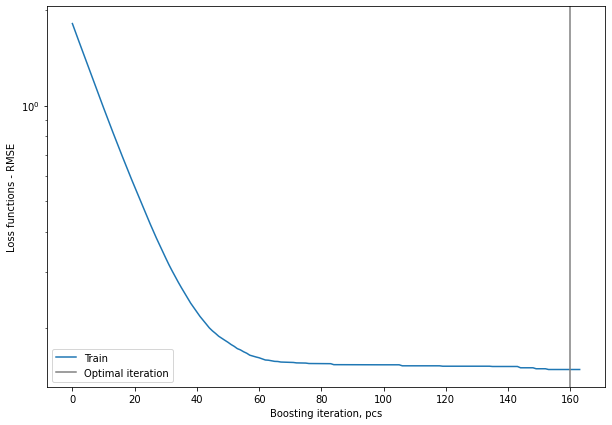

In [34]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [35]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [36]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: 0.0
Relative bias(%):  0.00
RMSE: 0.1
Relative RMSE(%):  0.071
MSE: 0.0
R square: 98.1%


In [38]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 0.104
a1: 0.950
R^2: 0.982
Uncertainty
a0: 0.104+/-0.030
a1: 0.950+/-0.013


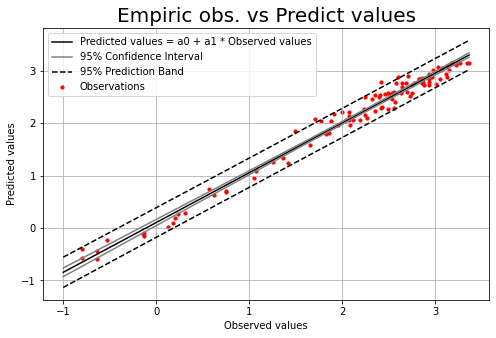

In [40]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(-1, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

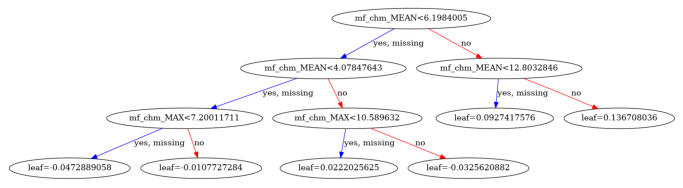

In [43]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

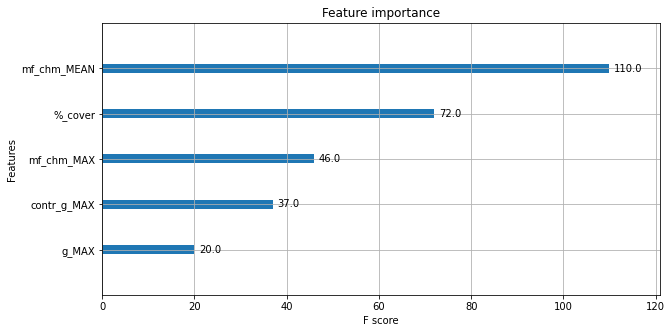

In [45]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

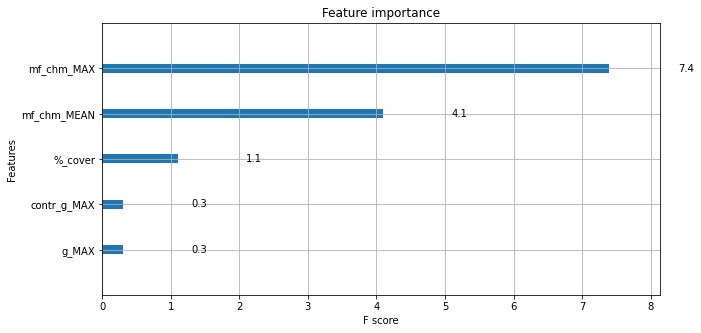

In [46]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

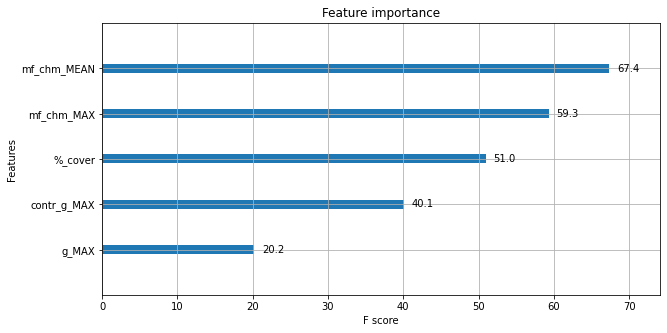

In [47]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [48]:
# Load SHAP`s library
import shap

In [49]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


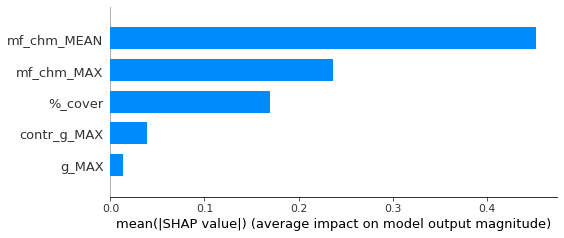

In [50]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

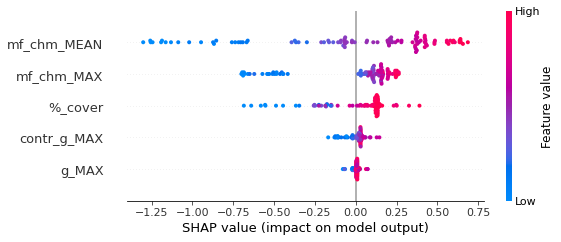

In [51]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

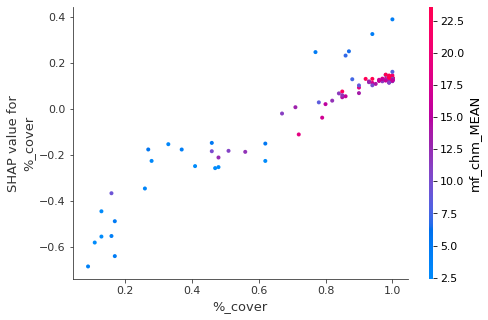

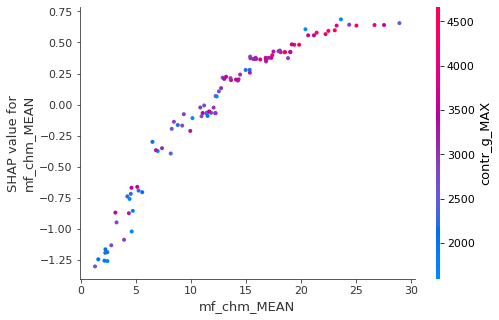

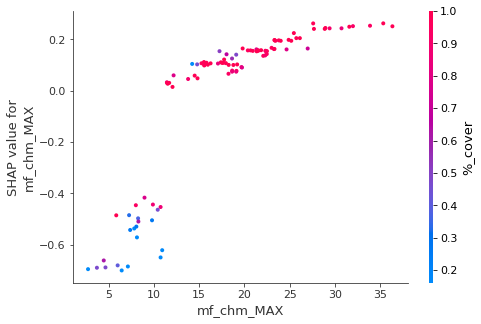

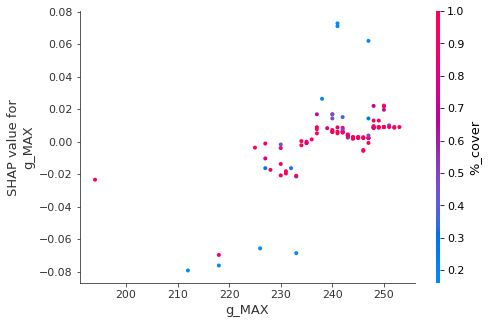

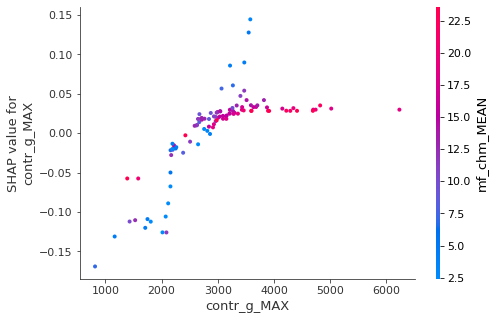

In [52]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [53]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_MAG_XGB_model_with_texture.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_ln_MAG_XGB_model_with_texture.txt")